# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

# Notes before starting 

#### Not all users receive the same offer, and that is the challenge to solve with this data set.
#### Should know which demographic groups respond best to which offer type.
#### Offer has an expiry date, should be redeemed before this date
#### Customers can redeem the offer even if they didn't view the offer, that means offer didn't affect their purachse decision
#### Some customer purchase without receiving an offer.

#### Machine learning model that predicts how much someone will spend based on demographics and offer type. 
#### A model that predicts whether or not someone will respond to an offer.
#### Develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).


# Import needed libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import json
%matplotlib inline

In [3]:
pd.options.display.max_columns = 500

In [8]:
# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

# 1- Exploring the data

### portfolio

In [457]:
portfolio

offer_reward  offer_difficulty  offer_duration     offer_type  \
0            10                10               7           bogo   
1            10                10               5           bogo   
2             0                 0               4  informational   
3             5                 5               7           bogo   
4             5                20              10       discount   
5             3                 7               7       discount   
6             2                10              10       discount   
7             0                 0               3  informational   
8             5                 5               5           bogo   
9             2                10               7       discount   

                           offer_id  channel_email  channel_mobile  \
0  ae264e3637204a6fb9bb56bc8210ddfd              1               1   
1  4d5c57ea9a6940dd891ad53e9dbe8da0              1               1   
2  3f207df678b143eea3cee63160fa8bed              1               1   
3  9b98b8c7a33c4b65b9aebfe6a799e6d9              1               1   
4  0b1e1539f2cc45b7b9fa7c272da2e1d7              1               0   
5  2298d6c36e964ae4a3e7e9706d1fb8c2              1               1   
6  fafdcd668e3743c1bb461111dcafc2a4              1               1   
7  5a8bc65990b245e5a138643cd4eb9837              1               1   
8  f19421c1d4aa40978ebb69ca19b0e20d              1               1   
9  2906b810c7d4411798c6938adc9daaa5              1               1   

   channel_social  channel_web  
0               1            0  
1               1            1  
2               0            1  
3               0            1  
4               0            1  
5               1            1  
6               1            1  
7               1            0  
8               1            1  
9               0            1

In [4]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [5]:
portfolio['channels'].apply(pd.Series)

0       1       2       3
0  email  mobile  social     NaN
1    web   email  mobile  social
2    web   email  mobile     NaN
3    web   email  mobile     NaN
4    web   email     NaN     NaN
5    web   email  mobile  social
6    web   email  mobile  social
7  email  mobile  social     NaN
8    web   email  mobile  social
9    web   email  mobile     NaN

In [6]:
dummy = pd.get_dummies(portfolio.channels.apply(pd.Series).stack()).sum(level=0)
portfolio = pd.concat([portfolio, dummy], axis=1)
portfolio = portfolio.drop(columns='channels')

C:\Users\minas\AppData\Local\Temp\ipykernel_17088\983269148.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dummy = pd.get_dummies(portfolio.channels.apply(pd.Series).stack()).sum(level=0)


In [7]:
portfolio

reward  difficulty  duration     offer_type  \
0      10          10         7           bogo   
1      10          10         5           bogo   
2       0           0         4  informational   
3       5           5         7           bogo   
4       5          20        10       discount   
5       3           7         7       discount   
6       2          10        10       discount   
7       0           0         3  informational   
8       5           5         5           bogo   
9       2          10         7       discount   

                                 id  email  mobile  social  web  
0  ae264e3637204a6fb9bb56bc8210ddfd      1       1       1    0  
1  4d5c57ea9a6940dd891ad53e9dbe8da0      1       1       1    1  
2  3f207df678b143eea3cee63160fa8bed      1       1       0    1  
3  9b98b8c7a33c4b65b9aebfe6a799e6d9      1       1       0    1  
4  0b1e1539f2cc45b7b9fa7c272da2e1d7      1       0       0    1  
5  2298d6c36e964ae4a3e7e9706d1fb8c2      1       1       1    1  
6  fafdcd668e3743c1bb461111dcafc2a4      1       1       1    1  
7  5a8bc65990b245e5a138643cd4eb9837      1       1       1    0  
8  f19421c1d4aa40978ebb69ca19b0e20d      1       1       1    1  
9  2906b810c7d4411798c6938adc9daaa5      1       1       0    1

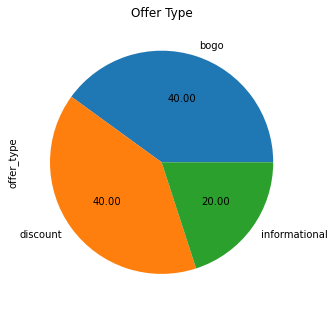

In [8]:
portfolio.offer_type.value_counts().plot(kind='pie', figsize=(5,10), autopct="%0.2f", title="Offer Type");


D:\Data_Science\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

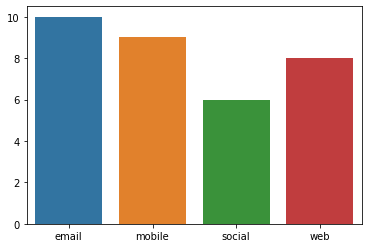

In [9]:
offers = [portfolio.email.sum(),portfolio.mobile.sum(),portfolio.social.sum(),portfolio.web.sum()]
offers_names = ['email','mobile','social','web']

sns.barplot(offers_names,offers)

        

There are 6 columns and 10 types of offers that we will be working with,no null values, no further processing needed for this file, 
all campaigns were sent via email


### profile

In [10]:
profile.head(),profile.info(),profile.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


(  gender  age                                id  became_member_on    income
 0   None  118  68be06ca386d4c31939f3a4f0e3dd783          20170212       NaN
 1      F   55  0610b486422d4921ae7d2bf64640c50b          20170715  112000.0
 2   None  118  38fe809add3b4fcf9315a9694bb96ff5          20180712       NaN
 3      F   75  78afa995795e4d85b5d9ceeca43f5fef          20170509  100000.0
 4   None  118  a03223e636434f42ac4c3df47e8bac43          20170804       NaN,
 None,
                 age  became_member_on         income
 count  17000.000000      1.700000e+04   14825.000000
 mean      62.531412      2.016703e+07   65404.991568
 std       26.738580      1.167750e+04   21598.299410
 min       18.000000      2.013073e+07   30000.000000
 25%       45.000000      2.016053e+07   49000.000000
 50%       58.000000      2.017080e+07   64000.000000
 75%       73.000000      2.017123e+07   80000.000000
 max      118.000000      2.018073e+07  120000.000000)

We have missing data, these data are for age 118, which repesents missing, also it's missing gender and income, but data will be cleaned later after the basic analysis

D:\Data_Science\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


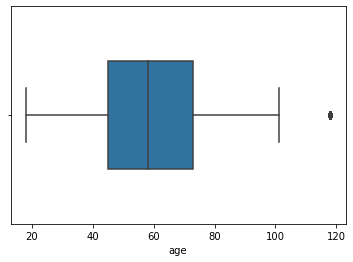

In [11]:
sns.boxplot(profile['age'], width=0.5);


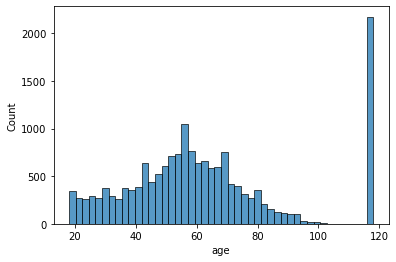

In [12]:
sns.histplot(profile['age']);

<AxesSubplot:ylabel='gender'>

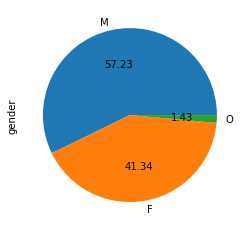

In [13]:
profile['gender'].value_counts().plot(kind='pie',autopct="%0.2f")


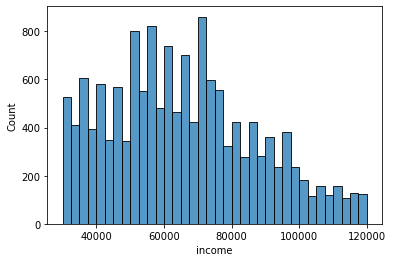

In [14]:
sns.histplot(profile['income']);

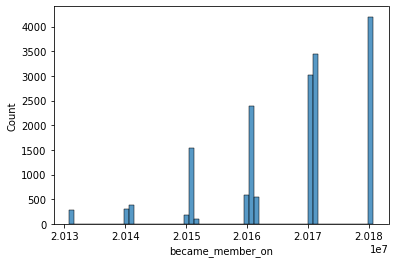

In [15]:
sns.histplot(profile['became_member_on']);

<AxesSubplot:title={'center':'customer age, gender'}, xlabel='age'>

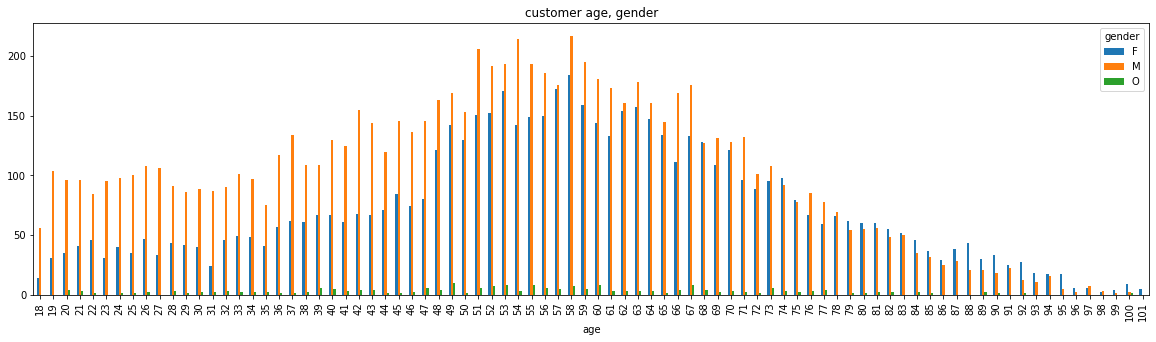

In [16]:
pd.crosstab(profile.age,profile.gender).plot(kind='bar',  figsize=(20,5), title='customer age, gender')

<AxesSubplot:title={'center':'customer age by gender'}, xlabel='income'>

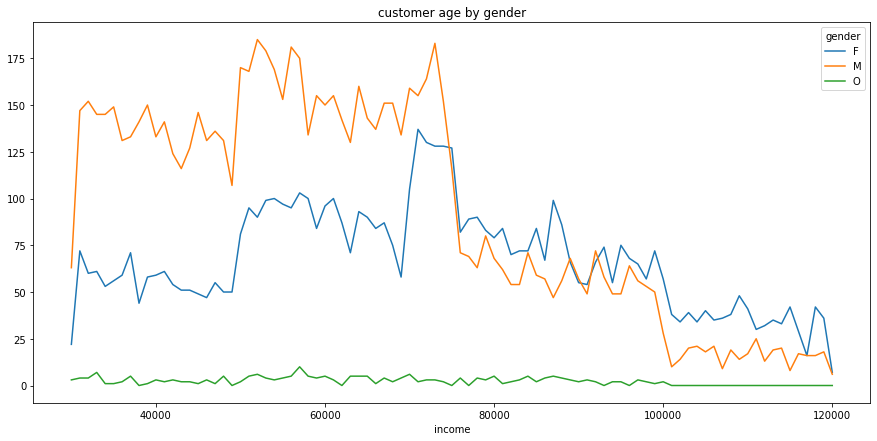

In [17]:
pd.crosstab(profile.income,profile.gender).plot(kind="line",  figsize = (15,7), title='customer age by gender')


some data need to be cleaned after getting the success ratio of the promotions

### transcript

In [18]:
transcript.head(),transcript.info(),transcript.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


(                             person           event  \
 0  78afa995795e4d85b5d9ceeca43f5fef  offer received   
 1  a03223e636434f42ac4c3df47e8bac43  offer received   
 2  e2127556f4f64592b11af22de27a7932  offer received   
 3  8ec6ce2a7e7949b1bf142def7d0e0586  offer received   
 4  68617ca6246f4fbc85e91a2a49552598  offer received   
 
                                               value  time  
 0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0  
 1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0  
 2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0  
 3  {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}     0  
 4  {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}     0  ,
 None,
                 time
 count  306534.000000
 mean      366.382940
 std       200.326314
 min         0.000000
 25%       186.000000
 50%       408.000000
 75%       528.000000
 max       714.000000)

In [19]:
transcript = pd.concat([transcript, transcript['value'].apply(pd.Series)], axis=1)
transcript['clean_id'] = np.where(transcript['offer id'].isnull() & transcript['offer_id'].notnull(), transcript['offer_id'],transcript['offer id'])
transcript.drop(['offer id', 'offer_id'], axis=1, inplace=True)
transcript.rename(columns={'clean_id': 'offer_id'}, inplace=True)
     

In [20]:
transcript.drop(['value'], inplace=True, axis = 1)

In [21]:
transcript.head()

person           event  time  amount  reward  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received     0     NaN     NaN   
1  a03223e636434f42ac4c3df47e8bac43  offer received     0     NaN     NaN   
2  e2127556f4f64592b11af22de27a7932  offer received     0     NaN     NaN   
3  8ec6ce2a7e7949b1bf142def7d0e0586  offer received     0     NaN     NaN   
4  68617ca6246f4fbc85e91a2a49552598  offer received     0     NaN     NaN   

                           offer_id  
0  9b98b8c7a33c4b65b9aebfe6a799e6d9  
1  0b1e1539f2cc45b7b9fa7c272da2e1d7  
2  2906b810c7d4411798c6938adc9daaa5  
3  fafdcd668e3743c1bb461111dcafc2a4  
4  4d5c57ea9a6940dd891ad53e9dbe8da0

# 2- Clean and merge the data

In [22]:
portfolio.rename(columns={'id':'offer_id'},inplace=True)

In [23]:
portfolio.rename(columns={'reward':'offer_reward', 'difficulty':'offer_difficulty', 'duration':'offer_duration', 
                         'email':'channel_email','mobile':'channel_mobile','social':'channel_social','web':'channel_web'},inplace=True)

In [41]:
portfolio

offer_reward  offer_difficulty  offer_duration     offer_type  \
0            10                10               7           bogo   
1            10                10               5           bogo   
2             0                 0               4  informational   
3             5                 5               7           bogo   
4             5                20              10       discount   
5             3                 7               7       discount   
6             2                10              10       discount   
7             0                 0               3  informational   
8             5                 5               5           bogo   
9             2                10               7       discount   

                           offer_id  channel_email  channel_mobile  \
0  ae264e3637204a6fb9bb56bc8210ddfd              1               1   
1  4d5c57ea9a6940dd891ad53e9dbe8da0              1               1   
2  3f207df678b143eea3cee63160fa8bed              1               1   
3  9b98b8c7a33c4b65b9aebfe6a799e6d9              1               1   
4  0b1e1539f2cc45b7b9fa7c272da2e1d7              1               0   
5  2298d6c36e964ae4a3e7e9706d1fb8c2              1               1   
6  fafdcd668e3743c1bb461111dcafc2a4              1               1   
7  5a8bc65990b245e5a138643cd4eb9837              1               1   
8  f19421c1d4aa40978ebb69ca19b0e20d              1               1   
9  2906b810c7d4411798c6938adc9daaa5              1               1   

   channel_social  channel_web  
0               1            0  
1               1            1  
2               0            1  
3               0            1  
4               0            1  
5               1            1  
6               1            1  
7               1            0  
8               1            1  
9               0            1

In [24]:
profile.rename(columns={'id':'customer_id'}, inplace=True)

In [25]:
transcript.rename(columns={'person':'customer_id'}, inplace=True)

In [26]:
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')
profile.rename(columns={'became_member_on':'member_year'}, inplace=True)

In [27]:
merged_df = pd.merge(portfolio,transcript,on='offer_id', how='right')

In [28]:
merged_df = pd.merge (merged_df,profile, on = 'customer_id', how = 'left')

### Now data is merged and ready for analysis

before we dig deeper into machine learning, we need to find how effective were the campaigns

In [29]:
merged_df.head()

offer_reward  offer_difficulty  offer_duration offer_type  \
0           5.0               5.0             7.0       bogo   
1           5.0              20.0            10.0   discount   
2           2.0              10.0             7.0   discount   
3           2.0              10.0            10.0   discount   
4          10.0              10.0             5.0       bogo   

                           offer_id  channel_email  channel_mobile  \
0  9b98b8c7a33c4b65b9aebfe6a799e6d9            1.0             1.0   
1  0b1e1539f2cc45b7b9fa7c272da2e1d7            1.0             0.0   
2  2906b810c7d4411798c6938adc9daaa5            1.0             1.0   
3  fafdcd668e3743c1bb461111dcafc2a4            1.0             1.0   
4  4d5c57ea9a6940dd891ad53e9dbe8da0            1.0             1.0   

   channel_social  channel_web                       customer_id  \
0             0.0          1.0  78afa995795e4d85b5d9ceeca43f5fef   
1             0.0          1.0  a03223e636434f42ac4c3df47e8bac43   
2             0.0          1.0  e2127556f4f64592b11af22de27a7932   
3             1.0          1.0  8ec6ce2a7e7949b1bf142def7d0e0586   
4             1.0          1.0  68617ca6246f4fbc85e91a2a49552598   

            event  time  amount  reward gender  age member_year    income  
0  offer received     0     NaN     NaN      F   75  2017-05-09  100000.0  
1  offer received     0     NaN     NaN   None  118  2017-08-04       NaN  
2  offer received     0     NaN     NaN      M   68  2018-04-26   70000.0  
3  offer received     0     NaN     NaN   None  118  2017-09-25       NaN  
4  offer received     0     NaN     NaN   None  118  2017-10-02       NaN

In [30]:
merged_df.rename(columns={'amount':'paid_amount','reward':'gained_amount'},inplace= True)

In [31]:
merged_df['member_year']=merged_df['member_year'].dt.year

In [32]:
off_unique = list(merged_df[merged_df['event']=='offer received']['customer_id'].unique())

In [33]:
merged_df = merged_df[merged_df['customer_id'].isin (off_unique)]

only 6 customers didn't recieve an offer bought anyway, it's better to drop them to get the right percentage

In [34]:
merged_df[merged_df['event']=='transaction']

offer_reward  offer_difficulty  offer_duration offer_type offer_id  \
12654            NaN               NaN             NaN        NaN      NaN   
12657            NaN               NaN             NaN        NaN      NaN   
12659            NaN               NaN             NaN        NaN      NaN   
12670            NaN               NaN             NaN        NaN      NaN   
12671            NaN               NaN             NaN        NaN      NaN   
...              ...               ...             ...        ...      ...   
306529           NaN               NaN             NaN        NaN      NaN   
306530           NaN               NaN             NaN        NaN      NaN   
306531           NaN               NaN             NaN        NaN      NaN   
306532           NaN               NaN             NaN        NaN      NaN   
306533           NaN               NaN             NaN        NaN      NaN   

        channel_email  channel_mobile  channel_social  channel_web  \
12654             NaN             NaN             NaN          NaN   
12657             NaN             NaN             NaN          NaN   
12659             NaN             NaN             NaN          NaN   
12670             NaN             NaN             NaN          NaN   
12671             NaN             NaN             NaN          NaN   
...               ...             ...             ...          ...   
306529            NaN             NaN             NaN          NaN   
306530            NaN             NaN             NaN          NaN   
306531            NaN             NaN             NaN          NaN   
306532            NaN             NaN             NaN          NaN   
306533            NaN             NaN             NaN          NaN   

                             customer_id        event  time  paid_amount  \
12654   02c083884c7d45b39cc68e1314fec56c  transaction     0         0.83   
12657   9fa9ae8f57894cc9a3b8a9bbe0fc1b2f  transaction     0        34.56   
12659   54890f68699049c2a04d415abc25e717  transaction     0        13.23   
12670   b2f1cd155b864803ad8334cdf13c4bd2  transaction     0        19.51   
12671   fe97aa22dd3e48c8b143116a8403dd52  transaction     0        18.97   
...                                  ...          ...   ...          ...   
306529  b3a1272bc9904337b331bf348c3e8c17  transaction   714         1.59   
306530  68213b08d99a4ae1b0dcb72aebd9aa35  transaction   714         9.53   
306531  a00058cf10334a308c68e7631c529907  transaction   714         3.61   
306532  76ddbd6576844afe811f1a3c0fbb5bec  transaction   714         3.53   
306533  c02b10e8752c4d8e9b73f918558531f7  transaction   714         4.05   

        gained_amount gender  age  member_year   income  
12654             NaN      F   20         2016  30000.0  
12657             NaN      M   42         2016  96000.0  
12659             NaN      M   36         2017  56000.0  
12670             NaN      F   55         2017  94000.0  
12671             NaN      F   39         2017  67000.0  
...               ...    ...  ...          ...      ...  
306529            NaN      M   66         2018  47000.0  
306530            NaN      M   52         2018  62000.0  
306531            NaN      F   63         2013  52000.0  
306532            NaN      M   57         2016  40000.0  
306533            NaN   None  118         2015      NaN  

[138933 rows x 18 columns]

In [35]:
merged_df.to_csv('merged_df.csv')

### Dataset saved,  now starting the analysis 

In [156]:
new_merged = pd.read_csv('merged_df.csv')

In [157]:
new_merged.shape

(306514, 19)

In [159]:
new_merged.drop(columns ='Unnamed: 0',inplace=True)

In [160]:
new_merged.head()

offer_reward  offer_difficulty  offer_duration offer_type  \
0           5.0               5.0             7.0       bogo   
1           5.0              20.0            10.0   discount   
2           2.0              10.0             7.0   discount   
3           2.0              10.0            10.0   discount   
4          10.0              10.0             5.0       bogo   

                           offer_id  channel_email  channel_mobile  \
0  9b98b8c7a33c4b65b9aebfe6a799e6d9            1.0             1.0   
1  0b1e1539f2cc45b7b9fa7c272da2e1d7            1.0             0.0   
2  2906b810c7d4411798c6938adc9daaa5            1.0             1.0   
3  fafdcd668e3743c1bb461111dcafc2a4            1.0             1.0   
4  4d5c57ea9a6940dd891ad53e9dbe8da0            1.0             1.0   

   channel_social  channel_web                       customer_id  \
0             0.0          1.0  78afa995795e4d85b5d9ceeca43f5fef   
1             0.0          1.0  a03223e636434f42ac4c3df47e8bac43   
2             0.0          1.0  e2127556f4f64592b11af22de27a7932   
3             1.0          1.0  8ec6ce2a7e7949b1bf142def7d0e0586   
4             1.0          1.0  68617ca6246f4fbc85e91a2a49552598   

            event  time  paid_amount  gained_amount gender  age  member_year  \
0  offer received     0          NaN            NaN      F   75         2017   
1  offer received     0          NaN            NaN    NaN  118         2017   
2  offer received     0          NaN            NaN      M   68         2018   
3  offer received     0          NaN            NaN    NaN  118         2017   
4  offer received     0          NaN            NaN    NaN  118         2017   

     income  
0  100000.0  
1       NaN  
2   70000.0  
3       NaN  
4       NaN

In [161]:
new_merged[new_merged.duplicated()]['event'].value_counts()

offer completed    397
Name: event, dtype: int64

In [162]:
new_merged[new_merged.duplicated(keep=False)].head()

offer_reward  offer_difficulty  offer_duration offer_type  \
66120           2.0              10.0             7.0   discount   
66121           2.0              10.0             7.0   discount   
66780          10.0              10.0             7.0       bogo   
66781          10.0              10.0             7.0       bogo   
67611           5.0               5.0             7.0       bogo   

                               offer_id  channel_email  channel_mobile  \
66120  2906b810c7d4411798c6938adc9daaa5            1.0             1.0   
66121  2906b810c7d4411798c6938adc9daaa5            1.0             1.0   
66780  ae264e3637204a6fb9bb56bc8210ddfd            1.0             1.0   
66781  ae264e3637204a6fb9bb56bc8210ddfd            1.0             1.0   
67611  9b98b8c7a33c4b65b9aebfe6a799e6d9            1.0             1.0   

       channel_social  channel_web                       customer_id  \
66120             0.0          1.0  3dde94fa581145cb9f206624f1a94d5a   
66121             0.0          1.0  3dde94fa581145cb9f206624f1a94d5a   
66780             1.0          0.0  e9fb6ed2cecb4980ba98c86abc9c91e3   
66781             1.0          0.0  e9fb6ed2cecb4980ba98c86abc9c91e3   
67611             0.0          1.0  a7dc060f6fc94ca7bf71fbb188187dca   

                 event  time  paid_amount  gained_amount gender  age  \
66120  offer completed   168          NaN            2.0      F   51   
66121  offer completed   168          NaN            2.0      F   51   
66780  offer completed   168          NaN           10.0      M   78   
66781  offer completed   168          NaN           10.0      M   78   
67611  offer completed   168          NaN            5.0      O   60   

       member_year   income  
66120         2017  56000.0  
66121         2017  56000.0  
66780         2015  55000.0  
66781         2015  55000.0  
67611         2017  69000.0

There are 397 that are exactly the same, all completed offers, while they received offer only one time, the transaction related to it, does not qualify to 2 offers, percentage of duplicate lines are so small, so it will be dropped


In [163]:
new_merged.drop_duplicates(inplace= True)
new_merged.shape

(306117, 18)

In [185]:
intervals = [
    (new_merged['time'] <= 167),
    (new_merged['time'] > 167) & (new_merged['time'] <= 335),
    (new_merged['time'] > 335) & (new_merged['time'] <= 407),
    (new_merged['time'] > 407) & (new_merged['time'] <= 503),
    (new_merged['time'] > 503) & (new_merged['time'] <= 575),
    (new_merged['time'] > 575)
    ]
values = ['camp1', 'camp2', 'camp3', 'camp4','camp5','camp6']

new_merged['offer interval']  =  np.select(intervals, values)

In [189]:
pd.pivot_table (new_merged, values=['time'], index=['customer_id','offer interval'], columns='event', aggfunc='count').max()

      event          
time  offer completed     4.0
      offer received      1.0
      offer viewed        1.0
      transaction        14.0
dtype: float64

No customer recieved more than 1 offer every offer interval

In [324]:
unique_customers= new_merged.customer_id.unique()

In [422]:
merged_1 = new_merged.copy()

In [436]:
def remove_dup_offers (df, unique_customers):
    x = 0
    for customer_id in unique_customers:
        x +=1
        #print (' X = ', x)
        customer = df.loc[(df['customer_id']== customer_id)]
        print('This customer shape is ',customer.shape)
        x+=1
        #customer_same_time = customer.duplicated(subset=['time'], keep=False)
        current_customer = customer[customer.duplicated(subset=['time'], keep=False)]
        #print("Duplicated customer shape is " , current_customer.shape)
        for i in range(current_customer.shape[0]):
            if i+1 == current_customer.shape[0]:
                break
            else:
                if current_customer.iloc[i+1]['time'] == current_customer.iloc[i]['time']:
         #           print('checking transactions in the same time')
                    if(current_customer.iloc[i+1]['event'] == 'offer completed') & (current_customer.iloc[i]['event'] == 'transaction'):
         #               print('check is done, now changing the values')
                        df.loc[df.index == current_customer.iloc[i+1:i+2,].index[0], 'paid_amount']=  current_customer.iloc[i]['paid_amount']
         #               print('check is done, now dropping')
                        df.drop(current_customer.index[i],inplace = True)
         #               print('Transaction row is dropped')
        if x % 100 == 0:
            print (f"{x/unique_customers.shape[0]:.0%}")


#            print(customer[customer_rem].index)
#            x.iloc[1:2,].index,
#            x.loc[x.iloc[1:2,].index]


In [437]:
remove_dup_offers (merged_1, unique_customers)

This customer shape is  (16, 19)
This customer shape is  (11, 19)
This customer shape is  (11, 19)
This customer shape is  (10, 19)
This customer shape is  (11, 19)
This customer shape is  (17, 19)
This customer shape is  (15, 19)
This customer shape is  (9, 19)
This customer shape is  (16, 19)
This customer shape is  (19, 19)
This customer shape is  (15, 19)
This customer shape is  (18, 19)
This customer shape is  (16, 19)
This customer shape is  (20, 19)
This customer shape is  (15, 19)
This customer shape is  (13, 19)
This customer shape is  (17, 19)
This customer shape is  (25, 19)
This customer shape is  (24, 19)
This customer shape is  (19, 19)
This customer shape is  (12, 19)
This customer shape is  (24, 19)
This customer shape is  (26, 19)
This customer shape is  (12, 19)
This customer shape is  (27, 19)
This customer shape is  (15, 19)
This customer shape is  (17, 19)
This customer shape is  (13, 19)
This customer shape is  (18, 19)
This customer shape is  (25, 19)
This custom

This customer shape is  (15, 19)
This customer shape is  (20, 19)
This customer shape is  (16, 19)
This customer shape is  (16, 19)
This customer shape is  (30, 19)
This customer shape is  (21, 19)
This customer shape is  (27, 19)
This customer shape is  (16, 19)
This customer shape is  (7, 19)
This customer shape is  (31, 19)
This customer shape is  (15, 19)
This customer shape is  (19, 19)
This customer shape is  (15, 19)
This customer shape is  (12, 19)
This customer shape is  (14, 19)
This customer shape is  (14, 19)
This customer shape is  (18, 19)
This customer shape is  (30, 19)
This customer shape is  (12, 19)
This customer shape is  (16, 19)
This customer shape is  (17, 19)
This customer shape is  (8, 19)
This customer shape is  (25, 19)
This customer shape is  (25, 19)
This customer shape is  (12, 19)
This customer shape is  (18, 19)
This customer shape is  (16, 19)
This customer shape is  (30, 19)
This customer shape is  (23, 19)
This customer shape is  (14, 19)
This custome

This customer shape is  (22, 19)
This customer shape is  (22, 19)
This customer shape is  (31, 19)
This customer shape is  (17, 19)
This customer shape is  (10, 19)
This customer shape is  (19, 19)
This customer shape is  (25, 19)
This customer shape is  (25, 19)
This customer shape is  (28, 19)
This customer shape is  (17, 19)
This customer shape is  (31, 19)
This customer shape is  (20, 19)
This customer shape is  (13, 19)
This customer shape is  (17, 19)
This customer shape is  (15, 19)
This customer shape is  (21, 19)
This customer shape is  (12, 19)
This customer shape is  (22, 19)
This customer shape is  (8, 19)
This customer shape is  (19, 19)
This customer shape is  (21, 19)
This customer shape is  (11, 19)
This customer shape is  (18, 19)
This customer shape is  (10, 19)
This customer shape is  (11, 19)
This customer shape is  (22, 19)
This customer shape is  (22, 19)
This customer shape is  (23, 19)
This customer shape is  (14, 19)
This customer shape is  (20, 19)
This custom

9%
This customer shape is  (12, 19)
This customer shape is  (22, 19)
This customer shape is  (18, 19)
This customer shape is  (26, 19)
This customer shape is  (9, 19)
This customer shape is  (34, 19)
This customer shape is  (14, 19)
This customer shape is  (18, 19)
This customer shape is  (23, 19)
This customer shape is  (12, 19)
This customer shape is  (14, 19)
This customer shape is  (23, 19)
This customer shape is  (18, 19)
This customer shape is  (24, 19)
This customer shape is  (27, 19)
This customer shape is  (24, 19)
This customer shape is  (23, 19)
This customer shape is  (5, 19)
This customer shape is  (16, 19)
This customer shape is  (13, 19)
This customer shape is  (14, 19)
This customer shape is  (16, 19)
This customer shape is  (7, 19)
This customer shape is  (14, 19)
This customer shape is  (15, 19)
This customer shape is  (11, 19)
This customer shape is  (16, 19)
This customer shape is  (10, 19)
This customer shape is  (29, 19)
This customer shape is  (6, 19)
This custom

12%
This customer shape is  (26, 19)
This customer shape is  (20, 19)
This customer shape is  (21, 19)
This customer shape is  (19, 19)
This customer shape is  (25, 19)
This customer shape is  (18, 19)
This customer shape is  (11, 19)
This customer shape is  (35, 19)
This customer shape is  (24, 19)
This customer shape is  (17, 19)
This customer shape is  (20, 19)
This customer shape is  (14, 19)
This customer shape is  (8, 19)
This customer shape is  (16, 19)
This customer shape is  (16, 19)
This customer shape is  (18, 19)
This customer shape is  (22, 19)
This customer shape is  (11, 19)
This customer shape is  (15, 19)
This customer shape is  (18, 19)
This customer shape is  (12, 19)
This customer shape is  (31, 19)
This customer shape is  (22, 19)
This customer shape is  (18, 19)
This customer shape is  (12, 19)
This customer shape is  (16, 19)
This customer shape is  (9, 19)
This customer shape is  (25, 19)
This customer shape is  (33, 19)
This customer shape is  (12, 19)
This cus

This customer shape is  (21, 19)
15%
This customer shape is  (23, 19)
This customer shape is  (17, 19)
This customer shape is  (27, 19)
This customer shape is  (17, 19)
This customer shape is  (13, 19)
This customer shape is  (25, 19)
This customer shape is  (21, 19)
This customer shape is  (14, 19)
This customer shape is  (16, 19)
This customer shape is  (23, 19)
This customer shape is  (10, 19)
This customer shape is  (28, 19)
This customer shape is  (10, 19)
This customer shape is  (23, 19)
This customer shape is  (22, 19)
This customer shape is  (17, 19)
This customer shape is  (8, 19)
This customer shape is  (11, 19)
This customer shape is  (17, 19)
This customer shape is  (11, 19)
This customer shape is  (21, 19)
This customer shape is  (18, 19)
This customer shape is  (30, 19)
This customer shape is  (20, 19)
This customer shape is  (19, 19)
This customer shape is  (17, 19)
This customer shape is  (16, 19)
This customer shape is  (15, 19)
This customer shape is  (16, 19)
This cu

18%
This customer shape is  (22, 19)
This customer shape is  (31, 19)
This customer shape is  (16, 19)
This customer shape is  (22, 19)
This customer shape is  (9, 19)
This customer shape is  (18, 19)
This customer shape is  (18, 19)
This customer shape is  (16, 19)
This customer shape is  (27, 19)
This customer shape is  (10, 19)
This customer shape is  (20, 19)
This customer shape is  (34, 19)
This customer shape is  (17, 19)
This customer shape is  (36, 19)
This customer shape is  (17, 19)
This customer shape is  (19, 19)
This customer shape is  (16, 19)
This customer shape is  (24, 19)
This customer shape is  (20, 19)
This customer shape is  (19, 19)
This customer shape is  (20, 19)
This customer shape is  (17, 19)
This customer shape is  (16, 19)
This customer shape is  (14, 19)
This customer shape is  (27, 19)
This customer shape is  (17, 19)
This customer shape is  (13, 19)
This customer shape is  (16, 19)
This customer shape is  (23, 19)
This customer shape is  (25, 19)
This cu

This customer shape is  (14, 19)
21%
This customer shape is  (11, 19)
This customer shape is  (27, 19)
This customer shape is  (21, 19)
This customer shape is  (21, 19)
This customer shape is  (17, 19)
This customer shape is  (31, 19)
This customer shape is  (23, 19)
This customer shape is  (9, 19)
This customer shape is  (26, 19)
This customer shape is  (20, 19)
This customer shape is  (8, 19)
This customer shape is  (27, 19)
This customer shape is  (16, 19)
This customer shape is  (21, 19)
This customer shape is  (10, 19)
This customer shape is  (15, 19)
This customer shape is  (17, 19)
This customer shape is  (19, 19)
This customer shape is  (8, 19)
This customer shape is  (21, 19)
This customer shape is  (20, 19)
This customer shape is  (25, 19)
This customer shape is  (15, 19)
This customer shape is  (33, 19)
This customer shape is  (19, 19)
This customer shape is  (23, 19)
This customer shape is  (12, 19)
This customer shape is  (10, 19)
This customer shape is  (25, 19)
This cust

This customer shape is  (26, 19)
This customer shape is  (27, 19)
24%
This customer shape is  (19, 19)
This customer shape is  (16, 19)
This customer shape is  (15, 19)
This customer shape is  (26, 19)
This customer shape is  (6, 19)
This customer shape is  (19, 19)
This customer shape is  (25, 19)
This customer shape is  (13, 19)
This customer shape is  (12, 19)
This customer shape is  (15, 19)
This customer shape is  (11, 19)
This customer shape is  (17, 19)
This customer shape is  (25, 19)
This customer shape is  (13, 19)
This customer shape is  (10, 19)
This customer shape is  (20, 19)
This customer shape is  (14, 19)
This customer shape is  (11, 19)
This customer shape is  (17, 19)
This customer shape is  (17, 19)
This customer shape is  (18, 19)
This customer shape is  (21, 19)
This customer shape is  (28, 19)
This customer shape is  (21, 19)
This customer shape is  (16, 19)
This customer shape is  (19, 19)
This customer shape is  (22, 19)
This customer shape is  (32, 19)
This cu

This customer shape is  (20, 19)
This customer shape is  (9, 19)
This customer shape is  (22, 19)
26%
This customer shape is  (26, 19)
This customer shape is  (14, 19)
This customer shape is  (19, 19)
This customer shape is  (22, 19)
This customer shape is  (17, 19)
This customer shape is  (12, 19)
This customer shape is  (19, 19)
This customer shape is  (31, 19)
This customer shape is  (11, 19)
This customer shape is  (21, 19)
This customer shape is  (19, 19)
This customer shape is  (11, 19)
This customer shape is  (20, 19)
This customer shape is  (18, 19)
This customer shape is  (21, 19)
This customer shape is  (25, 19)
This customer shape is  (19, 19)
This customer shape is  (13, 19)
This customer shape is  (33, 19)
This customer shape is  (14, 19)
This customer shape is  (15, 19)
This customer shape is  (15, 19)
This customer shape is  (28, 19)
This customer shape is  (21, 19)
This customer shape is  (24, 19)
This customer shape is  (24, 19)
This customer shape is  (51, 19)
This cu

This customer shape is  (8, 19)
This customer shape is  (12, 19)
This customer shape is  (11, 19)
29%
This customer shape is  (10, 19)
This customer shape is  (11, 19)
This customer shape is  (7, 19)
This customer shape is  (11, 19)
This customer shape is  (10, 19)
This customer shape is  (15, 19)
This customer shape is  (9, 19)
This customer shape is  (18, 19)
This customer shape is  (10, 19)
This customer shape is  (21, 19)
This customer shape is  (30, 19)
This customer shape is  (12, 19)
This customer shape is  (12, 19)
This customer shape is  (33, 19)
This customer shape is  (10, 19)
This customer shape is  (18, 19)
This customer shape is  (24, 19)
This customer shape is  (13, 19)
This customer shape is  (10, 19)
This customer shape is  (10, 19)
This customer shape is  (22, 19)
This customer shape is  (16, 19)
This customer shape is  (25, 19)
This customer shape is  (9, 19)
This customer shape is  (17, 19)
This customer shape is  (13, 19)
This customer shape is  (20, 19)
This custo

This customer shape is  (15, 19)
32%
This customer shape is  (28, 19)
This customer shape is  (15, 19)
This customer shape is  (14, 19)
This customer shape is  (13, 19)
This customer shape is  (18, 19)
This customer shape is  (13, 19)
This customer shape is  (17, 19)
This customer shape is  (27, 19)
This customer shape is  (21, 19)
This customer shape is  (11, 19)
This customer shape is  (16, 19)
This customer shape is  (19, 19)
This customer shape is  (16, 19)
This customer shape is  (9, 19)
This customer shape is  (13, 19)
This customer shape is  (13, 19)
This customer shape is  (16, 19)
This customer shape is  (12, 19)
This customer shape is  (10, 19)
This customer shape is  (15, 19)
This customer shape is  (10, 19)
This customer shape is  (12, 19)
This customer shape is  (22, 19)
This customer shape is  (15, 19)
This customer shape is  (20, 19)
This customer shape is  (18, 19)
This customer shape is  (26, 19)
This customer shape is  (22, 19)
This customer shape is  (16, 19)
This cu

This customer shape is  (9, 19)
35%
This customer shape is  (22, 19)
This customer shape is  (28, 19)
This customer shape is  (15, 19)
This customer shape is  (22, 19)
This customer shape is  (6, 19)
This customer shape is  (15, 19)
This customer shape is  (25, 19)
This customer shape is  (22, 19)
This customer shape is  (18, 19)
This customer shape is  (19, 19)
This customer shape is  (24, 19)
This customer shape is  (14, 19)
This customer shape is  (23, 19)
This customer shape is  (13, 19)
This customer shape is  (14, 19)
This customer shape is  (33, 19)
This customer shape is  (30, 19)
This customer shape is  (17, 19)
This customer shape is  (15, 19)
This customer shape is  (12, 19)
This customer shape is  (6, 19)
This customer shape is  (22, 19)
This customer shape is  (21, 19)
This customer shape is  (20, 19)
This customer shape is  (12, 19)
This customer shape is  (15, 19)
This customer shape is  (24, 19)
This customer shape is  (16, 19)
This customer shape is  (6, 19)
This custo

This customer shape is  (21, 19)
38%
This customer shape is  (27, 19)
This customer shape is  (17, 19)
This customer shape is  (23, 19)
This customer shape is  (13, 19)
This customer shape is  (23, 19)
This customer shape is  (15, 19)
This customer shape is  (11, 19)
This customer shape is  (26, 19)
This customer shape is  (14, 19)
This customer shape is  (16, 19)
This customer shape is  (23, 19)
This customer shape is  (14, 19)
This customer shape is  (10, 19)
This customer shape is  (11, 19)
This customer shape is  (11, 19)
This customer shape is  (17, 19)
This customer shape is  (23, 19)
This customer shape is  (10, 19)
This customer shape is  (11, 19)
This customer shape is  (26, 19)
This customer shape is  (23, 19)
This customer shape is  (15, 19)
This customer shape is  (25, 19)
This customer shape is  (17, 19)
This customer shape is  (16, 19)
This customer shape is  (15, 19)
This customer shape is  (21, 19)
This customer shape is  (25, 19)
This customer shape is  (19, 19)
This c

This customer shape is  (24, 19)
This customer shape is  (11, 19)
41%
This customer shape is  (15, 19)
This customer shape is  (17, 19)
This customer shape is  (14, 19)
This customer shape is  (9, 19)
This customer shape is  (20, 19)
This customer shape is  (16, 19)
This customer shape is  (27, 19)
This customer shape is  (29, 19)
This customer shape is  (16, 19)
This customer shape is  (13, 19)
This customer shape is  (13, 19)
This customer shape is  (19, 19)
This customer shape is  (14, 19)
This customer shape is  (17, 19)
This customer shape is  (30, 19)
This customer shape is  (31, 19)
This customer shape is  (29, 19)
This customer shape is  (27, 19)
This customer shape is  (12, 19)
This customer shape is  (11, 19)
This customer shape is  (12, 19)
This customer shape is  (17, 19)
This customer shape is  (29, 19)
This customer shape is  (13, 19)
This customer shape is  (21, 19)
This customer shape is  (26, 19)
This customer shape is  (11, 19)
This customer shape is  (19, 19)
This cu

This customer shape is  (21, 19)
This customer shape is  (24, 19)
44%
This customer shape is  (18, 19)
This customer shape is  (25, 19)
This customer shape is  (22, 19)
This customer shape is  (22, 19)
This customer shape is  (27, 19)
This customer shape is  (8, 19)
This customer shape is  (24, 19)
This customer shape is  (23, 19)
This customer shape is  (16, 19)
This customer shape is  (9, 19)
This customer shape is  (25, 19)
This customer shape is  (23, 19)
This customer shape is  (29, 19)
This customer shape is  (13, 19)
This customer shape is  (21, 19)
This customer shape is  (13, 19)
This customer shape is  (7, 19)
This customer shape is  (20, 19)
This customer shape is  (19, 19)
This customer shape is  (14, 19)
This customer shape is  (22, 19)
This customer shape is  (17, 19)
This customer shape is  (13, 19)
This customer shape is  (12, 19)
This customer shape is  (25, 19)
This customer shape is  (15, 19)
This customer shape is  (29, 19)
This customer shape is  (18, 19)
This cust

This customer shape is  (26, 19)
This customer shape is  (16, 19)
This customer shape is  (31, 19)
This customer shape is  (13, 19)
47%
This customer shape is  (24, 19)
This customer shape is  (25, 19)
This customer shape is  (10, 19)
This customer shape is  (7, 19)
This customer shape is  (14, 19)
This customer shape is  (19, 19)
This customer shape is  (11, 19)
This customer shape is  (17, 19)
This customer shape is  (24, 19)
This customer shape is  (10, 19)
This customer shape is  (32, 19)
This customer shape is  (25, 19)
This customer shape is  (30, 19)
This customer shape is  (23, 19)
This customer shape is  (23, 19)
This customer shape is  (22, 19)
This customer shape is  (14, 19)
This customer shape is  (28, 19)
This customer shape is  (30, 19)
This customer shape is  (16, 19)
This customer shape is  (29, 19)
This customer shape is  (15, 19)
This customer shape is  (18, 19)
This customer shape is  (17, 19)
This customer shape is  (21, 19)
This customer shape is  (22, 19)
This cu

This customer shape is  (7, 19)
This customer shape is  (12, 19)
This customer shape is  (17, 19)
This customer shape is  (23, 19)
This customer shape is  (13, 19)
50%
This customer shape is  (21, 19)
This customer shape is  (18, 19)
This customer shape is  (17, 19)
This customer shape is  (26, 19)
This customer shape is  (27, 19)
This customer shape is  (29, 19)
This customer shape is  (29, 19)
This customer shape is  (29, 19)
This customer shape is  (19, 19)
This customer shape is  (23, 19)
This customer shape is  (34, 19)
This customer shape is  (20, 19)
This customer shape is  (13, 19)
This customer shape is  (17, 19)
This customer shape is  (34, 19)
This customer shape is  (22, 19)
This customer shape is  (32, 19)
This customer shape is  (40, 19)
This customer shape is  (16, 19)
This customer shape is  (12, 19)
This customer shape is  (18, 19)
This customer shape is  (14, 19)
This customer shape is  (13, 19)
This customer shape is  (14, 19)
This customer shape is  (11, 19)
This cu

This customer shape is  (14, 19)
This customer shape is  (31, 19)
This customer shape is  (11, 19)
This customer shape is  (14, 19)
This customer shape is  (9, 19)
This customer shape is  (13, 19)
53%
This customer shape is  (12, 19)
This customer shape is  (20, 19)
This customer shape is  (10, 19)
This customer shape is  (18, 19)
This customer shape is  (18, 19)
This customer shape is  (12, 19)
This customer shape is  (11, 19)
This customer shape is  (20, 19)
This customer shape is  (9, 19)
This customer shape is  (16, 19)
This customer shape is  (16, 19)
This customer shape is  (21, 19)
This customer shape is  (27, 19)
This customer shape is  (19, 19)
This customer shape is  (14, 19)
This customer shape is  (16, 19)
This customer shape is  (13, 19)
This customer shape is  (37, 19)
This customer shape is  (11, 19)
This customer shape is  (21, 19)
This customer shape is  (16, 19)
This customer shape is  (10, 19)
This customer shape is  (11, 19)
This customer shape is  (11, 19)
This cus

This customer shape is  (30, 19)
This customer shape is  (18, 19)
This customer shape is  (11, 19)
This customer shape is  (21, 19)
This customer shape is  (26, 19)
56%
This customer shape is  (19, 19)
This customer shape is  (15, 19)
This customer shape is  (21, 19)
This customer shape is  (14, 19)
This customer shape is  (18, 19)
This customer shape is  (12, 19)
This customer shape is  (35, 19)
This customer shape is  (10, 19)
This customer shape is  (25, 19)
This customer shape is  (17, 19)
This customer shape is  (21, 19)
This customer shape is  (11, 19)
This customer shape is  (17, 19)
This customer shape is  (15, 19)
This customer shape is  (18, 19)
This customer shape is  (21, 19)
This customer shape is  (13, 19)
This customer shape is  (13, 19)
This customer shape is  (9, 19)
This customer shape is  (14, 19)
This customer shape is  (37, 19)
This customer shape is  (15, 19)
This customer shape is  (15, 19)
This customer shape is  (13, 19)
This customer shape is  (13, 19)
This cu

This customer shape is  (10, 19)
This customer shape is  (36, 19)
This customer shape is  (21, 19)
This customer shape is  (29, 19)
59%
This customer shape is  (14, 19)
This customer shape is  (8, 19)
This customer shape is  (22, 19)
This customer shape is  (27, 19)
This customer shape is  (11, 19)
This customer shape is  (17, 19)
This customer shape is  (26, 19)
This customer shape is  (12, 19)
This customer shape is  (21, 19)
This customer shape is  (14, 19)
This customer shape is  (19, 19)
This customer shape is  (23, 19)
This customer shape is  (12, 19)
This customer shape is  (19, 19)
This customer shape is  (16, 19)
This customer shape is  (18, 19)
This customer shape is  (18, 19)
This customer shape is  (11, 19)
This customer shape is  (31, 19)
This customer shape is  (26, 19)
This customer shape is  (16, 19)
This customer shape is  (24, 19)
This customer shape is  (8, 19)
This customer shape is  (21, 19)
This customer shape is  (26, 19)
This customer shape is  (20, 19)
This cus

This customer shape is  (18, 19)
This customer shape is  (35, 19)
This customer shape is  (22, 19)
62%
This customer shape is  (35, 19)
This customer shape is  (26, 19)
This customer shape is  (11, 19)
This customer shape is  (29, 19)
This customer shape is  (15, 19)
This customer shape is  (17, 19)
This customer shape is  (8, 19)
This customer shape is  (11, 19)
This customer shape is  (16, 19)
This customer shape is  (20, 19)
This customer shape is  (15, 19)
This customer shape is  (25, 19)
This customer shape is  (16, 19)
This customer shape is  (15, 19)
This customer shape is  (30, 19)
This customer shape is  (15, 19)
This customer shape is  (12, 19)
This customer shape is  (15, 19)
This customer shape is  (24, 19)
This customer shape is  (26, 19)
This customer shape is  (10, 19)
This customer shape is  (20, 19)
This customer shape is  (13, 19)
This customer shape is  (12, 19)
This customer shape is  (10, 19)
This customer shape is  (18, 19)
This customer shape is  (9, 19)
This cus

This customer shape is  (13, 19)
This customer shape is  (37, 19)
This customer shape is  (19, 19)
This customer shape is  (10, 19)
65%
This customer shape is  (16, 19)
This customer shape is  (24, 19)
This customer shape is  (17, 19)
This customer shape is  (19, 19)
This customer shape is  (21, 19)
This customer shape is  (29, 19)
This customer shape is  (19, 19)
This customer shape is  (24, 19)
This customer shape is  (11, 19)
This customer shape is  (30, 19)
This customer shape is  (15, 19)
This customer shape is  (32, 19)
This customer shape is  (14, 19)
This customer shape is  (11, 19)
This customer shape is  (27, 19)
This customer shape is  (29, 19)
This customer shape is  (14, 19)
This customer shape is  (18, 19)
This customer shape is  (13, 19)
This customer shape is  (17, 19)
This customer shape is  (17, 19)
This customer shape is  (10, 19)
This customer shape is  (18, 19)
This customer shape is  (16, 19)
This customer shape is  (5, 19)
This customer shape is  (16, 19)
This cu

This customer shape is  (12, 19)
This customer shape is  (35, 19)
This customer shape is  (17, 19)
68%
This customer shape is  (13, 19)
This customer shape is  (25, 19)
This customer shape is  (13, 19)
This customer shape is  (10, 19)
This customer shape is  (35, 19)
This customer shape is  (25, 19)
This customer shape is  (21, 19)
This customer shape is  (14, 19)
This customer shape is  (15, 19)
This customer shape is  (23, 19)
This customer shape is  (20, 19)
This customer shape is  (27, 19)
This customer shape is  (10, 19)
This customer shape is  (17, 19)
This customer shape is  (10, 19)
This customer shape is  (19, 19)
This customer shape is  (16, 19)
This customer shape is  (20, 19)
This customer shape is  (10, 19)
This customer shape is  (30, 19)
This customer shape is  (15, 19)
This customer shape is  (18, 19)
This customer shape is  (13, 19)
This customer shape is  (30, 19)
This customer shape is  (16, 19)
This customer shape is  (7, 19)
This customer shape is  (33, 19)
This cu

This customer shape is  (23, 19)
This customer shape is  (28, 19)
71%
This customer shape is  (19, 19)
This customer shape is  (16, 19)
This customer shape is  (14, 19)
This customer shape is  (15, 19)
This customer shape is  (15, 19)
This customer shape is  (23, 19)
This customer shape is  (11, 19)
This customer shape is  (22, 19)
This customer shape is  (35, 19)
This customer shape is  (12, 19)
This customer shape is  (27, 19)
This customer shape is  (30, 19)
This customer shape is  (23, 19)
This customer shape is  (18, 19)
This customer shape is  (28, 19)
This customer shape is  (18, 19)
This customer shape is  (14, 19)
This customer shape is  (23, 19)
This customer shape is  (14, 19)
This customer shape is  (14, 19)
This customer shape is  (21, 19)
This customer shape is  (27, 19)
This customer shape is  (17, 19)
This customer shape is  (23, 19)
This customer shape is  (25, 19)
This customer shape is  (32, 19)
This customer shape is  (24, 19)
This customer shape is  (9, 19)
This cu

This customer shape is  (25, 19)
This customer shape is  (15, 19)
This customer shape is  (24, 19)
This customer shape is  (11, 19)
74%
This customer shape is  (13, 19)
This customer shape is  (29, 19)
This customer shape is  (16, 19)
This customer shape is  (15, 19)
This customer shape is  (23, 19)
This customer shape is  (20, 19)
This customer shape is  (15, 19)
This customer shape is  (6, 19)
This customer shape is  (16, 19)
This customer shape is  (25, 19)
This customer shape is  (24, 19)
This customer shape is  (8, 19)
This customer shape is  (20, 19)
This customer shape is  (29, 19)
This customer shape is  (15, 19)
This customer shape is  (19, 19)
This customer shape is  (11, 19)
This customer shape is  (25, 19)
This customer shape is  (29, 19)
This customer shape is  (23, 19)
This customer shape is  (27, 19)
This customer shape is  (21, 19)
This customer shape is  (31, 19)
This customer shape is  (13, 19)
This customer shape is  (16, 19)
This customer shape is  (17, 19)
This cus

This customer shape is  (11, 19)
This customer shape is  (16, 19)
This customer shape is  (7, 19)
This customer shape is  (8, 19)
76%
This customer shape is  (21, 19)
This customer shape is  (21, 19)
This customer shape is  (22, 19)
This customer shape is  (17, 19)
This customer shape is  (21, 19)
This customer shape is  (24, 19)
This customer shape is  (17, 19)
This customer shape is  (15, 19)
This customer shape is  (12, 19)
This customer shape is  (23, 19)
This customer shape is  (12, 19)
This customer shape is  (19, 19)
This customer shape is  (24, 19)
This customer shape is  (18, 19)
This customer shape is  (40, 19)
This customer shape is  (13, 19)
This customer shape is  (31, 19)
This customer shape is  (26, 19)
This customer shape is  (22, 19)
This customer shape is  (29, 19)
This customer shape is  (14, 19)
This customer shape is  (22, 19)
This customer shape is  (17, 19)
This customer shape is  (9, 19)
This customer shape is  (12, 19)
This customer shape is  (18, 19)
This cust

This customer shape is  (21, 19)
This customer shape is  (18, 19)
This customer shape is  (11, 19)
79%
This customer shape is  (11, 19)
This customer shape is  (19, 19)
This customer shape is  (12, 19)
This customer shape is  (18, 19)
This customer shape is  (12, 19)
This customer shape is  (27, 19)
This customer shape is  (9, 19)
This customer shape is  (7, 19)
This customer shape is  (19, 19)
This customer shape is  (20, 19)
This customer shape is  (18, 19)
This customer shape is  (10, 19)
This customer shape is  (10, 19)
This customer shape is  (32, 19)
This customer shape is  (14, 19)
This customer shape is  (20, 19)
This customer shape is  (10, 19)
This customer shape is  (21, 19)
This customer shape is  (19, 19)
This customer shape is  (13, 19)
This customer shape is  (28, 19)
This customer shape is  (25, 19)
This customer shape is  (27, 19)
This customer shape is  (17, 19)
This customer shape is  (16, 19)
This customer shape is  (14, 19)
This customer shape is  (25, 19)
This cus

This customer shape is  (19, 19)
This customer shape is  (24, 19)
This customer shape is  (11, 19)
82%
This customer shape is  (16, 19)
This customer shape is  (23, 19)
This customer shape is  (16, 19)
This customer shape is  (25, 19)
This customer shape is  (8, 19)
This customer shape is  (18, 19)
This customer shape is  (29, 19)
This customer shape is  (24, 19)
This customer shape is  (30, 19)
This customer shape is  (15, 19)
This customer shape is  (23, 19)
This customer shape is  (21, 19)
This customer shape is  (22, 19)
This customer shape is  (10, 19)
This customer shape is  (12, 19)
This customer shape is  (23, 19)
This customer shape is  (33, 19)
This customer shape is  (11, 19)
This customer shape is  (12, 19)
This customer shape is  (26, 19)
This customer shape is  (11, 19)
This customer shape is  (26, 19)
This customer shape is  (18, 19)
This customer shape is  (15, 19)
This customer shape is  (16, 19)
This customer shape is  (16, 19)
This customer shape is  (22, 19)
This cu

This customer shape is  (26, 19)
85%
This customer shape is  (29, 19)
This customer shape is  (13, 19)
This customer shape is  (23, 19)
This customer shape is  (21, 19)
This customer shape is  (20, 19)
This customer shape is  (20, 19)
This customer shape is  (12, 19)
This customer shape is  (39, 19)
This customer shape is  (11, 19)
This customer shape is  (12, 19)
This customer shape is  (20, 19)
This customer shape is  (12, 19)
This customer shape is  (27, 19)
This customer shape is  (16, 19)
This customer shape is  (15, 19)
This customer shape is  (25, 19)
This customer shape is  (28, 19)
This customer shape is  (27, 19)
This customer shape is  (10, 19)
This customer shape is  (15, 19)
This customer shape is  (20, 19)
This customer shape is  (12, 19)
This customer shape is  (4, 19)
This customer shape is  (26, 19)
This customer shape is  (28, 19)
This customer shape is  (20, 19)
This customer shape is  (10, 19)
This customer shape is  (8, 19)
This customer shape is  (16, 19)
This cus

This customer shape is  (16, 19)
This customer shape is  (8, 19)
88%
This customer shape is  (14, 19)
This customer shape is  (14, 19)
This customer shape is  (33, 19)
This customer shape is  (19, 19)
This customer shape is  (17, 19)
This customer shape is  (10, 19)
This customer shape is  (19, 19)
This customer shape is  (22, 19)
This customer shape is  (23, 19)
This customer shape is  (33, 19)
This customer shape is  (22, 19)
This customer shape is  (39, 19)
This customer shape is  (20, 19)
This customer shape is  (32, 19)
This customer shape is  (27, 19)
This customer shape is  (24, 19)
This customer shape is  (10, 19)
This customer shape is  (28, 19)
This customer shape is  (25, 19)
This customer shape is  (13, 19)
This customer shape is  (27, 19)
This customer shape is  (12, 19)
This customer shape is  (12, 19)
This customer shape is  (10, 19)
This customer shape is  (13, 19)
This customer shape is  (15, 19)
This customer shape is  (12, 19)
This customer shape is  (12, 19)
This cu

This customer shape is  (14, 19)
This customer shape is  (21, 19)
This customer shape is  (22, 19)
This customer shape is  (23, 19)
91%
This customer shape is  (18, 19)
This customer shape is  (32, 19)
This customer shape is  (26, 19)
This customer shape is  (26, 19)
This customer shape is  (21, 19)
This customer shape is  (32, 19)
This customer shape is  (23, 19)
This customer shape is  (19, 19)
This customer shape is  (8, 19)
This customer shape is  (10, 19)
This customer shape is  (15, 19)
This customer shape is  (14, 19)
This customer shape is  (16, 19)
This customer shape is  (25, 19)
This customer shape is  (16, 19)
This customer shape is  (22, 19)
This customer shape is  (21, 19)
This customer shape is  (11, 19)
This customer shape is  (25, 19)
This customer shape is  (31, 19)
This customer shape is  (28, 19)
This customer shape is  (12, 19)
This customer shape is  (16, 19)
This customer shape is  (21, 19)
This customer shape is  (25, 19)
This customer shape is  (16, 19)
This cu

This customer shape is  (10, 19)
This customer shape is  (14, 19)
94%
This customer shape is  (25, 19)
This customer shape is  (27, 19)
This customer shape is  (18, 19)
This customer shape is  (17, 19)
This customer shape is  (9, 19)
This customer shape is  (18, 19)
This customer shape is  (14, 19)
This customer shape is  (8, 19)
This customer shape is  (18, 19)
This customer shape is  (12, 19)
This customer shape is  (13, 19)
This customer shape is  (21, 19)
This customer shape is  (22, 19)
This customer shape is  (17, 19)
This customer shape is  (24, 19)
This customer shape is  (10, 19)
This customer shape is  (15, 19)
This customer shape is  (19, 19)
This customer shape is  (26, 19)
This customer shape is  (16, 19)
This customer shape is  (24, 19)
This customer shape is  (8, 19)
This customer shape is  (26, 19)
This customer shape is  (10, 19)
This customer shape is  (19, 19)
This customer shape is  (24, 19)
This customer shape is  (15, 19)
This customer shape is  (11, 19)
This cust

This customer shape is  (19, 19)
This customer shape is  (32, 19)
This customer shape is  (19, 19)
97%
This customer shape is  (14, 19)
This customer shape is  (21, 19)
This customer shape is  (14, 19)
This customer shape is  (17, 19)
This customer shape is  (20, 19)
This customer shape is  (28, 19)
This customer shape is  (24, 19)
This customer shape is  (14, 19)
This customer shape is  (20, 19)
This customer shape is  (26, 19)
This customer shape is  (27, 19)
This customer shape is  (20, 19)
This customer shape is  (23, 19)
This customer shape is  (33, 19)
This customer shape is  (14, 19)
This customer shape is  (33, 19)
This customer shape is  (25, 19)
This customer shape is  (12, 19)
This customer shape is  (15, 19)
This customer shape is  (17, 19)
This customer shape is  (18, 19)
This customer shape is  (16, 19)
This customer shape is  (14, 19)
This customer shape is  (21, 19)
This customer shape is  (30, 19)
This customer shape is  (24, 19)
This customer shape is  (17, 19)
This c

This customer shape is  (14, 19)
This customer shape is  (12, 19)
This customer shape is  (25, 19)
100%
This customer shape is  (23, 19)
This customer shape is  (12, 19)
This customer shape is  (27, 19)
This customer shape is  (18, 19)
This customer shape is  (18, 19)
This customer shape is  (10, 19)
This customer shape is  (23, 19)
This customer shape is  (12, 19)
This customer shape is  (25, 19)
This customer shape is  (20, 19)
This customer shape is  (19, 19)
This customer shape is  (14, 19)
This customer shape is  (17, 19)
This customer shape is  (17, 19)
This customer shape is  (18, 19)
This customer shape is  (11, 19)
This customer shape is  (11, 19)
This customer shape is  (28, 19)
This customer shape is  (23, 19)
This customer shape is  (28, 19)
This customer shape is  (17, 19)
This customer shape is  (17, 19)
This customer shape is  (25, 19)
This customer shape is  (8, 19)
This customer shape is  (16, 19)
This customer shape is  (24, 19)
This customer shape is  (13, 19)
This c

This customer shape is  (6, 19)
This customer shape is  (15, 19)
This customer shape is  (18, 19)
This customer shape is  (13, 19)
103%
This customer shape is  (27, 19)
This customer shape is  (17, 19)
This customer shape is  (15, 19)
This customer shape is  (25, 19)
This customer shape is  (9, 19)
This customer shape is  (18, 19)
This customer shape is  (22, 19)
This customer shape is  (21, 19)
This customer shape is  (7, 19)
This customer shape is  (21, 19)
This customer shape is  (19, 19)
This customer shape is  (21, 19)
This customer shape is  (15, 19)
This customer shape is  (19, 19)
This customer shape is  (10, 19)
This customer shape is  (26, 19)
This customer shape is  (25, 19)
This customer shape is  (26, 19)
This customer shape is  (30, 19)
This customer shape is  (26, 19)
This customer shape is  (29, 19)
This customer shape is  (12, 19)
This customer shape is  (18, 19)
This customer shape is  (32, 19)
This customer shape is  (19, 19)
This customer shape is  (18, 19)
This cus

This customer shape is  (23, 19)
This customer shape is  (7, 19)
This customer shape is  (17, 19)
This customer shape is  (13, 19)
106%
This customer shape is  (8, 19)
This customer shape is  (19, 19)
This customer shape is  (15, 19)
This customer shape is  (19, 19)
This customer shape is  (17, 19)
This customer shape is  (13, 19)
This customer shape is  (19, 19)
This customer shape is  (26, 19)
This customer shape is  (8, 19)
This customer shape is  (18, 19)
This customer shape is  (26, 19)
This customer shape is  (16, 19)
This customer shape is  (18, 19)
This customer shape is  (30, 19)
This customer shape is  (19, 19)
This customer shape is  (13, 19)
This customer shape is  (15, 19)
This customer shape is  (41, 19)
This customer shape is  (16, 19)
This customer shape is  (12, 19)
This customer shape is  (15, 19)
This customer shape is  (28, 19)
This customer shape is  (35, 19)
This customer shape is  (21, 19)
This customer shape is  (21, 19)
This customer shape is  (5, 19)
This cust

This customer shape is  (16, 19)
This customer shape is  (26, 19)
This customer shape is  (24, 19)
This customer shape is  (29, 19)
109%
This customer shape is  (26, 19)
This customer shape is  (25, 19)
This customer shape is  (9, 19)
This customer shape is  (17, 19)
This customer shape is  (17, 19)
This customer shape is  (16, 19)
This customer shape is  (16, 19)
This customer shape is  (16, 19)
This customer shape is  (25, 19)
This customer shape is  (8, 19)
This customer shape is  (12, 19)
This customer shape is  (14, 19)
This customer shape is  (15, 19)
This customer shape is  (18, 19)
This customer shape is  (11, 19)
This customer shape is  (22, 19)
This customer shape is  (22, 19)
This customer shape is  (11, 19)
This customer shape is  (13, 19)
This customer shape is  (11, 19)
This customer shape is  (12, 19)
This customer shape is  (19, 19)
This customer shape is  (13, 19)
This customer shape is  (23, 19)
This customer shape is  (19, 19)
This customer shape is  (13, 19)
This cu

This customer shape is  (30, 19)
This customer shape is  (24, 19)
This customer shape is  (13, 19)
This customer shape is  (14, 19)
This customer shape is  (26, 19)
112%
This customer shape is  (14, 19)
This customer shape is  (11, 19)
This customer shape is  (43, 19)
This customer shape is  (20, 19)
This customer shape is  (25, 19)
This customer shape is  (23, 19)
This customer shape is  (18, 19)
This customer shape is  (20, 19)
This customer shape is  (14, 19)
This customer shape is  (24, 19)
This customer shape is  (27, 19)
This customer shape is  (11, 19)
This customer shape is  (13, 19)
This customer shape is  (26, 19)
This customer shape is  (15, 19)
This customer shape is  (25, 19)
This customer shape is  (10, 19)
This customer shape is  (20, 19)
This customer shape is  (9, 19)
This customer shape is  (11, 19)
This customer shape is  (12, 19)
This customer shape is  (19, 19)
This customer shape is  (24, 19)
This customer shape is  (6, 19)
This customer shape is  (18, 19)
This cu

This customer shape is  (17, 19)
This customer shape is  (22, 19)
This customer shape is  (14, 19)
This customer shape is  (20, 19)
This customer shape is  (14, 19)
115%
This customer shape is  (38, 19)
This customer shape is  (27, 19)
This customer shape is  (15, 19)
This customer shape is  (21, 19)
This customer shape is  (15, 19)
This customer shape is  (13, 19)
This customer shape is  (12, 19)
This customer shape is  (21, 19)
This customer shape is  (27, 19)
This customer shape is  (19, 19)
This customer shape is  (27, 19)
This customer shape is  (8, 19)
This customer shape is  (12, 19)
This customer shape is  (15, 19)
This customer shape is  (33, 19)
This customer shape is  (14, 19)
This customer shape is  (13, 19)
This customer shape is  (12, 19)
This customer shape is  (23, 19)
This customer shape is  (18, 19)
This customer shape is  (22, 19)
This customer shape is  (19, 19)
This customer shape is  (11, 19)
This customer shape is  (13, 19)
This customer shape is  (19, 19)
This c

This customer shape is  (31, 19)
This customer shape is  (18, 19)
This customer shape is  (30, 19)
This customer shape is  (22, 19)
This customer shape is  (11, 19)
118%
This customer shape is  (12, 19)
This customer shape is  (10, 19)
This customer shape is  (28, 19)
This customer shape is  (21, 19)
This customer shape is  (13, 19)
This customer shape is  (9, 19)
This customer shape is  (20, 19)
This customer shape is  (21, 19)
This customer shape is  (12, 19)
This customer shape is  (19, 19)
This customer shape is  (16, 19)
This customer shape is  (27, 19)
This customer shape is  (28, 19)
This customer shape is  (18, 19)
This customer shape is  (8, 19)
This customer shape is  (34, 19)
This customer shape is  (17, 19)
This customer shape is  (15, 19)
This customer shape is  (14, 19)
This customer shape is  (21, 19)
This customer shape is  (24, 19)
This customer shape is  (19, 19)
This customer shape is  (12, 19)
This customer shape is  (25, 19)
This customer shape is  (16, 19)
This cu

This customer shape is  (26, 19)
This customer shape is  (23, 19)
This customer shape is  (27, 19)
This customer shape is  (28, 19)
This customer shape is  (20, 19)
This customer shape is  (24, 19)
This customer shape is  (25, 19)
121%
This customer shape is  (25, 19)
This customer shape is  (25, 19)
This customer shape is  (19, 19)
This customer shape is  (15, 19)
This customer shape is  (25, 19)
This customer shape is  (30, 19)
This customer shape is  (33, 19)
This customer shape is  (14, 19)
This customer shape is  (21, 19)
This customer shape is  (17, 19)
This customer shape is  (9, 19)
This customer shape is  (14, 19)
This customer shape is  (19, 19)
This customer shape is  (14, 19)
This customer shape is  (24, 19)
This customer shape is  (12, 19)
This customer shape is  (10, 19)
This customer shape is  (29, 19)
This customer shape is  (32, 19)
This customer shape is  (17, 19)
This customer shape is  (18, 19)
This customer shape is  (20, 19)
This customer shape is  (25, 19)
This c

This customer shape is  (19, 19)
This customer shape is  (20, 19)
This customer shape is  (11, 19)
This customer shape is  (18, 19)
This customer shape is  (12, 19)
This customer shape is  (18, 19)
This customer shape is  (20, 19)
124%
This customer shape is  (32, 19)
This customer shape is  (27, 19)
This customer shape is  (12, 19)
This customer shape is  (11, 19)
This customer shape is  (25, 19)
This customer shape is  (28, 19)
This customer shape is  (11, 19)
This customer shape is  (14, 19)
This customer shape is  (8, 19)
This customer shape is  (27, 19)
This customer shape is  (13, 19)
This customer shape is  (16, 19)
This customer shape is  (19, 19)
This customer shape is  (15, 19)
This customer shape is  (31, 19)
This customer shape is  (10, 19)
This customer shape is  (16, 19)
This customer shape is  (20, 19)
This customer shape is  (20, 19)
This customer shape is  (13, 19)
This customer shape is  (22, 19)
This customer shape is  (17, 19)
This customer shape is  (20, 19)
This c

This customer shape is  (13, 19)
This customer shape is  (18, 19)
This customer shape is  (25, 19)
This customer shape is  (29, 19)
This customer shape is  (30, 19)
This customer shape is  (21, 19)
This customer shape is  (26, 19)
This customer shape is  (10, 19)
127%
This customer shape is  (33, 19)
This customer shape is  (18, 19)
This customer shape is  (26, 19)
This customer shape is  (24, 19)
This customer shape is  (23, 19)
This customer shape is  (14, 19)
This customer shape is  (19, 19)
This customer shape is  (17, 19)
This customer shape is  (27, 19)
This customer shape is  (16, 19)
This customer shape is  (19, 19)
This customer shape is  (16, 19)
This customer shape is  (23, 19)
This customer shape is  (21, 19)
This customer shape is  (31, 19)
This customer shape is  (18, 19)
This customer shape is  (27, 19)
This customer shape is  (15, 19)
This customer shape is  (25, 19)
This customer shape is  (17, 19)
This customer shape is  (21, 19)
This customer shape is  (10, 19)
This 

This customer shape is  (17, 19)
This customer shape is  (9, 19)
This customer shape is  (17, 19)
This customer shape is  (12, 19)
This customer shape is  (21, 19)
This customer shape is  (20, 19)
This customer shape is  (15, 19)
This customer shape is  (21, 19)
This customer shape is  (13, 19)
This customer shape is  (27, 19)
129%
This customer shape is  (16, 19)
This customer shape is  (14, 19)
This customer shape is  (26, 19)
This customer shape is  (19, 19)
This customer shape is  (22, 19)
This customer shape is  (11, 19)
This customer shape is  (11, 19)
This customer shape is  (19, 19)
This customer shape is  (30, 19)
This customer shape is  (17, 19)
This customer shape is  (15, 19)
This customer shape is  (30, 19)
This customer shape is  (23, 19)
This customer shape is  (10, 19)
This customer shape is  (37, 19)
This customer shape is  (28, 19)
This customer shape is  (12, 19)
This customer shape is  (19, 19)
This customer shape is  (9, 19)
This customer shape is  (25, 19)
This cu

This customer shape is  (7, 19)
This customer shape is  (14, 19)
This customer shape is  (18, 19)
This customer shape is  (12, 19)
This customer shape is  (21, 19)
This customer shape is  (19, 19)
This customer shape is  (13, 19)
This customer shape is  (23, 19)
This customer shape is  (22, 19)
This customer shape is  (29, 19)
This customer shape is  (25, 19)
132%
This customer shape is  (19, 19)
This customer shape is  (7, 19)
This customer shape is  (19, 19)
This customer shape is  (15, 19)
This customer shape is  (18, 19)
This customer shape is  (23, 19)
This customer shape is  (10, 19)
This customer shape is  (32, 19)
This customer shape is  (15, 19)
This customer shape is  (9, 19)
This customer shape is  (33, 19)
This customer shape is  (24, 19)
This customer shape is  (22, 19)
This customer shape is  (21, 19)
This customer shape is  (16, 19)
This customer shape is  (14, 19)
This customer shape is  (14, 19)
This customer shape is  (14, 19)
This customer shape is  (15, 19)
This cus

This customer shape is  (16, 19)
This customer shape is  (24, 19)
This customer shape is  (17, 19)
This customer shape is  (16, 19)
This customer shape is  (13, 19)
This customer shape is  (36, 19)
This customer shape is  (9, 19)
This customer shape is  (19, 19)
135%
This customer shape is  (20, 19)
This customer shape is  (23, 19)
This customer shape is  (27, 19)
This customer shape is  (16, 19)
This customer shape is  (27, 19)
This customer shape is  (21, 19)
This customer shape is  (18, 19)
This customer shape is  (15, 19)
This customer shape is  (13, 19)
This customer shape is  (21, 19)
This customer shape is  (21, 19)
This customer shape is  (25, 19)
This customer shape is  (28, 19)
This customer shape is  (11, 19)
This customer shape is  (14, 19)
This customer shape is  (10, 19)
This customer shape is  (26, 19)
This customer shape is  (24, 19)
This customer shape is  (26, 19)
This customer shape is  (24, 19)
This customer shape is  (15, 19)
This customer shape is  (31, 19)
This c

This customer shape is  (19, 19)
This customer shape is  (10, 19)
This customer shape is  (24, 19)
This customer shape is  (7, 19)
This customer shape is  (14, 19)
This customer shape is  (20, 19)
This customer shape is  (22, 19)
This customer shape is  (24, 19)
138%
This customer shape is  (27, 19)
This customer shape is  (27, 19)
This customer shape is  (17, 19)
This customer shape is  (16, 19)
This customer shape is  (13, 19)
This customer shape is  (12, 19)
This customer shape is  (13, 19)
This customer shape is  (11, 19)
This customer shape is  (27, 19)
This customer shape is  (21, 19)
This customer shape is  (19, 19)
This customer shape is  (17, 19)
This customer shape is  (36, 19)
This customer shape is  (27, 19)
This customer shape is  (16, 19)
This customer shape is  (15, 19)
This customer shape is  (26, 19)
This customer shape is  (23, 19)
This customer shape is  (11, 19)
This customer shape is  (21, 19)
This customer shape is  (20, 19)
This customer shape is  (10, 19)
This c

This customer shape is  (34, 19)
This customer shape is  (13, 19)
This customer shape is  (21, 19)
This customer shape is  (16, 19)
This customer shape is  (17, 19)
This customer shape is  (14, 19)
This customer shape is  (11, 19)
This customer shape is  (12, 19)
This customer shape is  (15, 19)
This customer shape is  (10, 19)
141%
This customer shape is  (18, 19)
This customer shape is  (20, 19)
This customer shape is  (8, 19)
This customer shape is  (26, 19)
This customer shape is  (17, 19)
This customer shape is  (20, 19)
This customer shape is  (13, 19)
This customer shape is  (22, 19)
This customer shape is  (24, 19)
This customer shape is  (29, 19)
This customer shape is  (29, 19)
This customer shape is  (20, 19)
This customer shape is  (25, 19)
This customer shape is  (15, 19)
This customer shape is  (17, 19)
This customer shape is  (15, 19)
This customer shape is  (13, 19)
This customer shape is  (21, 19)
This customer shape is  (14, 19)
This customer shape is  (30, 19)
This c

This customer shape is  (34, 19)
This customer shape is  (8, 19)
This customer shape is  (20, 19)
This customer shape is  (32, 19)
This customer shape is  (13, 19)
This customer shape is  (29, 19)
This customer shape is  (14, 19)
This customer shape is  (20, 19)
This customer shape is  (19, 19)
This customer shape is  (16, 19)
This customer shape is  (22, 19)
This customer shape is  (19, 19)
144%
This customer shape is  (10, 19)
This customer shape is  (15, 19)
This customer shape is  (15, 19)
This customer shape is  (11, 19)
This customer shape is  (15, 19)
This customer shape is  (17, 19)
This customer shape is  (12, 19)
This customer shape is  (26, 19)
This customer shape is  (22, 19)
This customer shape is  (21, 19)
This customer shape is  (32, 19)
This customer shape is  (11, 19)
This customer shape is  (25, 19)
This customer shape is  (19, 19)
This customer shape is  (15, 19)
This customer shape is  (35, 19)
This customer shape is  (19, 19)
This customer shape is  (17, 19)
This c

This customer shape is  (17, 19)
This customer shape is  (18, 19)
This customer shape is  (14, 19)
This customer shape is  (20, 19)
This customer shape is  (14, 19)
This customer shape is  (8, 19)
This customer shape is  (12, 19)
This customer shape is  (37, 19)
This customer shape is  (27, 19)
This customer shape is  (13, 19)
This customer shape is  (28, 19)
This customer shape is  (27, 19)
147%
This customer shape is  (14, 19)
This customer shape is  (14, 19)
This customer shape is  (26, 19)
This customer shape is  (28, 19)
This customer shape is  (31, 19)
This customer shape is  (15, 19)
This customer shape is  (18, 19)
This customer shape is  (19, 19)
This customer shape is  (22, 19)
This customer shape is  (18, 19)
This customer shape is  (15, 19)
This customer shape is  (13, 19)
This customer shape is  (25, 19)
This customer shape is  (24, 19)
This customer shape is  (31, 19)
This customer shape is  (9, 19)
This customer shape is  (22, 19)
This customer shape is  (17, 19)
This cu

This customer shape is  (22, 19)
This customer shape is  (14, 19)
This customer shape is  (22, 19)
This customer shape is  (18, 19)
This customer shape is  (9, 19)
This customer shape is  (22, 19)
This customer shape is  (19, 19)
This customer shape is  (32, 19)
This customer shape is  (21, 19)
This customer shape is  (14, 19)
This customer shape is  (12, 19)
150%
This customer shape is  (30, 19)
This customer shape is  (20, 19)
This customer shape is  (13, 19)
This customer shape is  (27, 19)
This customer shape is  (10, 19)
This customer shape is  (22, 19)
This customer shape is  (28, 19)
This customer shape is  (15, 19)
This customer shape is  (28, 19)
This customer shape is  (11, 19)
This customer shape is  (16, 19)
This customer shape is  (22, 19)
This customer shape is  (20, 19)
This customer shape is  (29, 19)
This customer shape is  (15, 19)
This customer shape is  (16, 19)
This customer shape is  (7, 19)
This customer shape is  (17, 19)
This customer shape is  (23, 19)
This cu

This customer shape is  (6, 19)
This customer shape is  (19, 19)
This customer shape is  (12, 19)
This customer shape is  (14, 19)
This customer shape is  (14, 19)
This customer shape is  (25, 19)
This customer shape is  (19, 19)
This customer shape is  (15, 19)
This customer shape is  (18, 19)
This customer shape is  (25, 19)
This customer shape is  (27, 19)
153%
This customer shape is  (15, 19)
This customer shape is  (16, 19)
This customer shape is  (15, 19)
This customer shape is  (18, 19)
This customer shape is  (10, 19)
This customer shape is  (14, 19)
This customer shape is  (20, 19)
This customer shape is  (25, 19)
This customer shape is  (11, 19)
This customer shape is  (19, 19)
This customer shape is  (21, 19)
This customer shape is  (10, 19)
This customer shape is  (12, 19)
This customer shape is  (20, 19)
This customer shape is  (13, 19)
This customer shape is  (21, 19)
This customer shape is  (23, 19)
This customer shape is  (9, 19)
This customer shape is  (20, 19)
This cu

This customer shape is  (28, 19)
This customer shape is  (17, 19)
This customer shape is  (28, 19)
This customer shape is  (13, 19)
This customer shape is  (21, 19)
This customer shape is  (14, 19)
This customer shape is  (18, 19)
This customer shape is  (22, 19)
This customer shape is  (18, 19)
This customer shape is  (22, 19)
This customer shape is  (16, 19)
This customer shape is  (14, 19)
156%
This customer shape is  (17, 19)
This customer shape is  (26, 19)
This customer shape is  (28, 19)
This customer shape is  (12, 19)
This customer shape is  (25, 19)
This customer shape is  (11, 19)
This customer shape is  (26, 19)
This customer shape is  (17, 19)
This customer shape is  (25, 19)
This customer shape is  (36, 19)
This customer shape is  (11, 19)
This customer shape is  (30, 19)
This customer shape is  (8, 19)
This customer shape is  (27, 19)
This customer shape is  (8, 19)
This customer shape is  (28, 19)
This customer shape is  (14, 19)
This customer shape is  (13, 19)
This cu

This customer shape is  (16, 19)
This customer shape is  (17, 19)
This customer shape is  (21, 19)
This customer shape is  (14, 19)
This customer shape is  (13, 19)
This customer shape is  (24, 19)
This customer shape is  (11, 19)
This customer shape is  (15, 19)
This customer shape is  (11, 19)
This customer shape is  (18, 19)
This customer shape is  (30, 19)
This customer shape is  (30, 19)
This customer shape is  (8, 19)
This customer shape is  (10, 19)
159%
This customer shape is  (20, 19)
This customer shape is  (15, 19)
This customer shape is  (22, 19)
This customer shape is  (12, 19)
This customer shape is  (20, 19)
This customer shape is  (15, 19)
This customer shape is  (9, 19)
This customer shape is  (25, 19)
This customer shape is  (12, 19)
This customer shape is  (17, 19)
This customer shape is  (12, 19)
This customer shape is  (14, 19)
This customer shape is  (15, 19)
This customer shape is  (18, 19)
This customer shape is  (12, 19)
This customer shape is  (16, 19)
This cu

This customer shape is  (13, 19)
This customer shape is  (14, 19)
This customer shape is  (21, 19)
This customer shape is  (18, 19)
This customer shape is  (16, 19)
This customer shape is  (18, 19)
This customer shape is  (13, 19)
This customer shape is  (13, 19)
This customer shape is  (15, 19)
This customer shape is  (12, 19)
This customer shape is  (33, 19)
This customer shape is  (8, 19)
This customer shape is  (9, 19)
This customer shape is  (25, 19)
162%
This customer shape is  (14, 19)
This customer shape is  (19, 19)
This customer shape is  (19, 19)
This customer shape is  (18, 19)
This customer shape is  (17, 19)
This customer shape is  (23, 19)
This customer shape is  (9, 19)
This customer shape is  (14, 19)
This customer shape is  (36, 19)
This customer shape is  (11, 19)
This customer shape is  (12, 19)
This customer shape is  (19, 19)
This customer shape is  (15, 19)
This customer shape is  (33, 19)
This customer shape is  (16, 19)
This customer shape is  (16, 19)
This cus

This customer shape is  (10, 19)
This customer shape is  (11, 19)
This customer shape is  (23, 19)
This customer shape is  (14, 19)
This customer shape is  (25, 19)
This customer shape is  (15, 19)
This customer shape is  (23, 19)
This customer shape is  (16, 19)
This customer shape is  (13, 19)
This customer shape is  (20, 19)
This customer shape is  (10, 19)
165%
This customer shape is  (14, 19)
This customer shape is  (18, 19)
This customer shape is  (12, 19)
This customer shape is  (8, 19)
This customer shape is  (11, 19)
This customer shape is  (14, 19)
This customer shape is  (19, 19)
This customer shape is  (22, 19)
This customer shape is  (9, 19)
This customer shape is  (9, 19)
This customer shape is  (20, 19)
This customer shape is  (14, 19)
This customer shape is  (27, 19)
This customer shape is  (14, 19)
This customer shape is  (16, 19)
This customer shape is  (14, 19)
This customer shape is  (21, 19)
This customer shape is  (26, 19)
This customer shape is  (18, 19)
This cus

This customer shape is  (13, 19)
This customer shape is  (15, 19)
This customer shape is  (15, 19)
This customer shape is  (6, 19)
This customer shape is  (9, 19)
This customer shape is  (21, 19)
This customer shape is  (23, 19)
This customer shape is  (25, 19)
This customer shape is  (19, 19)
168%
This customer shape is  (16, 19)
This customer shape is  (22, 19)
This customer shape is  (12, 19)
This customer shape is  (23, 19)
This customer shape is  (25, 19)
This customer shape is  (33, 19)
This customer shape is  (12, 19)
This customer shape is  (28, 19)
This customer shape is  (16, 19)
This customer shape is  (19, 19)
This customer shape is  (25, 19)
This customer shape is  (21, 19)
This customer shape is  (12, 19)
This customer shape is  (20, 19)
This customer shape is  (18, 19)
This customer shape is  (7, 19)
This customer shape is  (29, 19)
This customer shape is  (17, 19)
This customer shape is  (18, 19)
This customer shape is  (15, 19)
This customer shape is  (19, 19)
This cus

This customer shape is  (9, 19)
This customer shape is  (14, 19)
This customer shape is  (12, 19)
This customer shape is  (18, 19)
This customer shape is  (20, 19)
This customer shape is  (20, 19)
This customer shape is  (15, 19)
This customer shape is  (15, 19)
This customer shape is  (14, 19)
171%
This customer shape is  (10, 19)
This customer shape is  (12, 19)
This customer shape is  (18, 19)
This customer shape is  (22, 19)
This customer shape is  (13, 19)
This customer shape is  (19, 19)
This customer shape is  (15, 19)
This customer shape is  (10, 19)
This customer shape is  (18, 19)
This customer shape is  (23, 19)
This customer shape is  (12, 19)
This customer shape is  (17, 19)
This customer shape is  (8, 19)
This customer shape is  (12, 19)
This customer shape is  (11, 19)
This customer shape is  (12, 19)
This customer shape is  (11, 19)
This customer shape is  (18, 19)
This customer shape is  (15, 19)
This customer shape is  (10, 19)
This customer shape is  (11, 19)
This cu

This customer shape is  (12, 19)
This customer shape is  (6, 19)
This customer shape is  (17, 19)
This customer shape is  (17, 19)
This customer shape is  (17, 19)
This customer shape is  (16, 19)
This customer shape is  (14, 19)
This customer shape is  (10, 19)
174%
This customer shape is  (10, 19)
This customer shape is  (23, 19)
This customer shape is  (12, 19)
This customer shape is  (15, 19)
This customer shape is  (11, 19)
This customer shape is  (10, 19)
This customer shape is  (12, 19)
This customer shape is  (11, 19)
This customer shape is  (17, 19)
This customer shape is  (19, 19)
This customer shape is  (12, 19)
This customer shape is  (7, 19)
This customer shape is  (28, 19)
This customer shape is  (14, 19)
This customer shape is  (10, 19)
This customer shape is  (9, 19)
This customer shape is  (18, 19)
This customer shape is  (15, 19)
This customer shape is  (17, 19)
This customer shape is  (14, 19)
This customer shape is  (15, 19)
This customer shape is  (17, 19)
This cus

This customer shape is  (18, 19)
This customer shape is  (5, 19)
This customer shape is  (27, 19)
This customer shape is  (12, 19)
This customer shape is  (8, 19)
This customer shape is  (11, 19)
This customer shape is  (15, 19)
This customer shape is  (12, 19)
177%
This customer shape is  (9, 19)
This customer shape is  (12, 19)
This customer shape is  (23, 19)
This customer shape is  (8, 19)
This customer shape is  (12, 19)
This customer shape is  (16, 19)
This customer shape is  (23, 19)
This customer shape is  (25, 19)
This customer shape is  (6, 19)
This customer shape is  (13, 19)
This customer shape is  (10, 19)
This customer shape is  (20, 19)
This customer shape is  (12, 19)
This customer shape is  (28, 19)
This customer shape is  (10, 19)
This customer shape is  (11, 19)
This customer shape is  (19, 19)
This customer shape is  (24, 19)
This customer shape is  (15, 19)
This customer shape is  (6, 19)
This customer shape is  (11, 19)
This customer shape is  (24, 19)
This custom

This customer shape is  (21, 19)
This customer shape is  (16, 19)
This customer shape is  (9, 19)
This customer shape is  (9, 19)
This customer shape is  (13, 19)
This customer shape is  (12, 19)
This customer shape is  (11, 19)
This customer shape is  (12, 19)
This customer shape is  (20, 19)
179%
This customer shape is  (14, 19)
This customer shape is  (12, 19)
This customer shape is  (9, 19)
This customer shape is  (26, 19)
This customer shape is  (14, 19)
This customer shape is  (15, 19)
This customer shape is  (6, 19)
This customer shape is  (27, 19)
This customer shape is  (22, 19)
This customer shape is  (9, 19)
This customer shape is  (9, 19)
This customer shape is  (17, 19)
This customer shape is  (15, 19)
This customer shape is  (13, 19)
This customer shape is  (14, 19)
This customer shape is  (21, 19)
This customer shape is  (26, 19)
This customer shape is  (29, 19)
This customer shape is  (20, 19)
This customer shape is  (7, 19)
This customer shape is  (15, 19)
This custome

This customer shape is  (14, 19)
This customer shape is  (15, 19)
This customer shape is  (14, 19)
This customer shape is  (22, 19)
This customer shape is  (14, 19)
This customer shape is  (14, 19)
This customer shape is  (15, 19)
182%
This customer shape is  (9, 19)
This customer shape is  (17, 19)
This customer shape is  (11, 19)
This customer shape is  (13, 19)
This customer shape is  (11, 19)
This customer shape is  (13, 19)
This customer shape is  (34, 19)
This customer shape is  (14, 19)
This customer shape is  (11, 19)
This customer shape is  (13, 19)
This customer shape is  (24, 19)
This customer shape is  (12, 19)
This customer shape is  (10, 19)
This customer shape is  (13, 19)
This customer shape is  (10, 19)
This customer shape is  (11, 19)
This customer shape is  (23, 19)
This customer shape is  (21, 19)
This customer shape is  (7, 19)
This customer shape is  (13, 19)
This customer shape is  (16, 19)
This customer shape is  (11, 19)
This customer shape is  (16, 19)
This cu

This customer shape is  (15, 19)
This customer shape is  (18, 19)
This customer shape is  (21, 19)
This customer shape is  (11, 19)
This customer shape is  (20, 19)
This customer shape is  (13, 19)
185%
This customer shape is  (11, 19)
This customer shape is  (11, 19)
This customer shape is  (15, 19)
This customer shape is  (15, 19)
This customer shape is  (10, 19)
This customer shape is  (11, 19)
This customer shape is  (7, 19)
This customer shape is  (12, 19)
This customer shape is  (23, 19)
This customer shape is  (27, 19)
This customer shape is  (12, 19)
This customer shape is  (11, 19)
This customer shape is  (8, 19)
This customer shape is  (7, 19)
This customer shape is  (16, 19)
This customer shape is  (18, 19)
This customer shape is  (15, 19)
This customer shape is  (8, 19)
This customer shape is  (14, 19)
This customer shape is  (12, 19)
This customer shape is  (26, 19)
This customer shape is  (18, 19)
This customer shape is  (20, 19)
This customer shape is  (17, 19)
This cust

This customer shape is  (21, 19)
This customer shape is  (23, 19)
This customer shape is  (12, 19)
This customer shape is  (19, 19)
This customer shape is  (5, 19)
188%
This customer shape is  (9, 19)
This customer shape is  (10, 19)
This customer shape is  (14, 19)
This customer shape is  (13, 19)
This customer shape is  (17, 19)
This customer shape is  (11, 19)
This customer shape is  (12, 19)
This customer shape is  (5, 19)
This customer shape is  (10, 19)
This customer shape is  (23, 19)
This customer shape is  (12, 19)
This customer shape is  (10, 19)
This customer shape is  (21, 19)
This customer shape is  (4, 19)
This customer shape is  (12, 19)
This customer shape is  (13, 19)
This customer shape is  (9, 19)
This customer shape is  (15, 19)
This customer shape is  (18, 19)
This customer shape is  (13, 19)
This customer shape is  (3, 19)
This customer shape is  (9, 19)
This customer shape is  (16, 19)
This customer shape is  (16, 19)
This customer shape is  (19, 19)
This custome

This customer shape is  (25, 19)
This customer shape is  (12, 19)
This customer shape is  (6, 19)
191%
This customer shape is  (8, 19)
This customer shape is  (8, 19)
This customer shape is  (14, 19)
This customer shape is  (19, 19)
This customer shape is  (35, 19)
This customer shape is  (13, 19)
This customer shape is  (26, 19)
This customer shape is  (12, 19)
This customer shape is  (25, 19)
This customer shape is  (12, 19)
This customer shape is  (26, 19)
This customer shape is  (9, 19)
This customer shape is  (9, 19)
This customer shape is  (5, 19)
This customer shape is  (30, 19)
This customer shape is  (14, 19)
This customer shape is  (22, 19)
This customer shape is  (26, 19)
This customer shape is  (16, 19)
This customer shape is  (13, 19)
This customer shape is  (10, 19)
This customer shape is  (16, 19)
This customer shape is  (4, 19)
This customer shape is  (14, 19)
This customer shape is  (8, 19)
This customer shape is  (6, 19)
This customer shape is  (15, 19)
This customer 

This customer shape is  (22, 19)
This customer shape is  (16, 19)
This customer shape is  (20, 19)
This customer shape is  (13, 19)
194%
This customer shape is  (21, 19)
This customer shape is  (13, 19)
This customer shape is  (7, 19)
This customer shape is  (10, 19)
This customer shape is  (16, 19)
This customer shape is  (21, 19)
This customer shape is  (18, 19)
This customer shape is  (12, 19)
This customer shape is  (15, 19)
This customer shape is  (17, 19)
This customer shape is  (12, 19)
This customer shape is  (18, 19)
This customer shape is  (18, 19)
This customer shape is  (15, 19)
This customer shape is  (17, 19)
This customer shape is  (20, 19)
This customer shape is  (15, 19)
This customer shape is  (12, 19)
This customer shape is  (11, 19)
This customer shape is  (10, 19)
This customer shape is  (15, 19)
This customer shape is  (13, 19)
This customer shape is  (24, 19)
This customer shape is  (10, 19)
This customer shape is  (10, 19)
This customer shape is  (19, 19)
This c

This customer shape is  (6, 19)
This customer shape is  (18, 19)
197%
This customer shape is  (11, 19)
This customer shape is  (12, 19)
This customer shape is  (7, 19)
This customer shape is  (13, 19)
This customer shape is  (15, 19)
This customer shape is  (8, 19)
This customer shape is  (12, 19)
This customer shape is  (14, 19)
This customer shape is  (12, 19)
This customer shape is  (14, 19)
This customer shape is  (20, 19)
This customer shape is  (13, 19)
This customer shape is  (12, 19)
This customer shape is  (12, 19)
This customer shape is  (7, 19)
This customer shape is  (11, 19)
This customer shape is  (12, 19)
This customer shape is  (11, 19)
This customer shape is  (10, 19)
This customer shape is  (14, 19)
This customer shape is  (20, 19)
This customer shape is  (2, 19)
This customer shape is  (6, 19)
This customer shape is  (4, 19)
This customer shape is  (10, 19)
This customer shape is  (7, 19)
This customer shape is  (9, 19)
This customer shape is  (11, 19)
This customer 

In [439]:
merged_1.to_csv('merged_1.csv')

In [447]:
merged_1.loc[(merged_1['event']=='offer completed') ]['paid_amount'].value_counts()

7.36      24
13.54     24
15.86     24
15.85     24
10.70     24
          ..
91.16      1
44.31      1
36.08      1
384.44     1
1.19       1
Name: paid_amount, Length: 4356, dtype: int64

Now as all offers related to  transactions is merged with offer completed, only remaining transactions is either not related, or related to informational, we need to check that more

In [527]:
merged_2 = merged_1.copy()

In [528]:
merged_2['viewed_status'] = "NA"

In [529]:
def merge_received_viewd_1 (df, unique_customers):
    x = 0
    for customer_id in unique_customers:
        x +=1
        print (' X = ', x)
        current_customer = df.loc[(df['customer_id']== customer_id)]
        #print('This customer shape is ',current_customer.shape)
        #customer_same_time = customer.duplicated(subset=['time'], keep=False)
        for i in range(current_customer.shape[0]):
            if i+1 == current_customer.shape[0]:
                break
            else:
                if (current_customer.iloc[i]['event'] == 'offer received') &  (current_customer.iloc[i+1]['event'] == 'offer viewed'):
                    if current_customer.iloc[i]['offer_duration']*24 +current_customer.iloc[i]['time']  >=current_customer.iloc[i+1]['time']:
                        #print ('good')
                        #print (current_customer.iloc[i]['offer_duration']*24 +current_customer.iloc[i]['time']  ,current_customer.iloc[i+1]['time'])
                        df.loc[df.index == current_customer.iloc[i:i+1,].index[0], 'viewed_after']=  'offer_viewed'
                        #print('check is done, now dropping')
                        df.drop(current_customer.index[i+1],inplace = True)
                        print('Row is dropped, offer is viewed')

                    else:
                        #print (current_customer.iloc[i]['offer_duration']*24 +current_customer.iloc[i]['time']  ,current_customer.iloc[i+1]['time'])
                        #print("Mistiming---------------------------------------------")
                        df.drop(current_customer.index[i+1],inplace = True)
                        print("Row is dropped, offer is not viewed")
        if x % 100 == 0:
            print (f"{x/unique_customers.shape[0]:.0%}")



In [530]:
merge_received_viewd_1 (merged_2, unique_customers)

 X =  1
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9
Row is dropped, offer is viewed
Row is dropped, offer is viewed


Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  74
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  75
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  76
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  77
Row is dropped, offer is viewed
 X =  78
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  79
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  80
Row is dropped, offer is viewed
 X =  81
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  82
Row is dropped, offer is viewed
Row is dropped, offer i

Row is dropped, offer is viewed
Row is dropped, offer is not viewed
 X =  148
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  149
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  150
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  151
Row is dropped, offer is not viewed
Row is dropped, offer is viewed
 X =  152
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  153
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  154
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  155
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  156
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  157
Row is dropped, offer is vie

Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  228
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  229
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  230
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  231
Row is dropped, offer is viewed
 X =  232
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  233
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  234
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  235
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is

Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  304
 X =  305
Row is dropped, offer is not viewed
Row is dropped, offer is viewed
 X =  306
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  307
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  308
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  309
Row is dropped, offer is not viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  310
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  311
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  312
Row is

Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  381
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  382
Row is dropped, offer is viewed
 X =  383
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  384
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  385
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  386
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  387
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  388
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  389
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  390
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  391
Row is dropped, offer is v

Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  457
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  458
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  459
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  460
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  461
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  462
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  463
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  464
Row is dropped, offer is viewed
Row is dropped, offer is

Row is dropped, offer is viewed
 X =  534
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  535
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  536
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  537
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  538
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  539
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  540
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  541
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  542
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped

Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  610
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  611
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  612
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  613
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  614
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  615
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  616
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  617
Row is dropped, offer is

Row is dropped, offer is viewed
 X =  687
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  688
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  689
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  690
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  691
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  692
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  693
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  694
Row is dropped, offer is viewed
 X =  695
Row is dropped

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  764
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  765
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  766
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  767
 X =  768
Row is dropped, offer is viewed
 X =  769
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  770
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  771
Row is dropped, offer is viewed
 X =  772
 X =  773
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  774
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  775
Row is dropped, 

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  848
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  849
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  850
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  851
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  852
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  853
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  854
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  855
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  928
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  929
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  930
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  931
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  932
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  933
Row is dropped, offer is viewed
 X =  934
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  935
Row is dropped, offer is viewed
 X =  936
Row is dropped, offer is viewed
Row is dropped

Row is dropped, offer is viewed
 X =  1009
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1010
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1011
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1012
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1013
Row is dropped, offer is viewed
 X =  1014
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1015
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1016
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1017
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1018
Row is dropped, offer is v

 X =  1086
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1087
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1088
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1089
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1090
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1091
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1092
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1093
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1094
Row is dropped, offer is not viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1095
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1096
Row is drop

Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1164
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1165
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1166
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1167
Row is dropped, offer is viewed
 X =  1168
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1169
Row is dropped, offer is viewed
Row is dropped, offer is not viewed
 X =  1170
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1171
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1172
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
R

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1238
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1239
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1240
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1241
Row is dropped, offer is viewed
 X =  1242
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1243
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1244
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1245
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1246
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1247
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is v

Row is dropped, offer is viewed
 X =  1316
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1317
Row is dropped, offer is viewed
 X =  1318
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1319
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1320
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1321
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1322
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1323
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1324
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1325
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1326
Row is dropped,

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1395
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1396
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is not viewed
 X =  1397
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1398
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1399
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1400
Row is dropped, offer is viewed
Row is dropped, offer is viewed
8%
 X =  1401
 X =  1402
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1403
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1404
Row is dropped, offer is viewed
Row is dropped, off

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1474
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1475
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1476
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1477
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1478
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1479
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1480
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1481
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1482
Row is dropped, offer is viewed
 X =  1483
Row is dropped, offer is viewed
Row is dropped, offer is v

Row is dropped, offer is viewed
 X =  1551
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1552
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1553
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1554
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1555
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1556
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1557
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1558
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1559
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row i

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1625
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1626
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1627
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1628
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1629
Row is dropped, offer is viewed
 X =  1630
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1631
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1632
Row is dropped, offer is viewed
Row is dropped, 

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1702
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1703
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1704
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1705
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1706
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1707
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1708
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is vi

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1775
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1776
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1777
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1778
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1779
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1780
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1781
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1782
Row is dropped, offer is viewed
 X =  1783
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1784
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is v

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1856
 X =  1857
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1858
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1859
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1860
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1861
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1862
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1863
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1864
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X = 

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1936
Row is dropped, offer is viewed
 X =  1937
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1938
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1939
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1940
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1941
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1942
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1943
Row is dropped, offer is viewed
 X =  1944
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1945
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  1946
Row is dropped, offer is viewed
Row is dropped,

Row is dropped, offer is viewed
 X =  2011
Row is dropped, offer is not viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2012
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2013
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2014
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2015
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2016
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2017
Row is dropped, offer i

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2086
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2087
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2088
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2089
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2090
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2091
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2092
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2093
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2094
Row i

Row is dropped, offer is viewed
 X =  2165
Row is dropped, offer is viewed
 X =  2166
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2167
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2168
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2169
Row is dropped, offer is viewed
 X =  2170
Row is dropped, offer is viewed
 X =  2171
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2172
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2173
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2174
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2175
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2176
Row 

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2240
Row is dropped, offer is viewed
 X =  2241
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2242
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2243
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2244
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2245
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2246
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2247
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2248
Row is dropped, offer is viewed
 X = 

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2317
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2318
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2319
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2320
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2321
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2322
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2323
Row is dropped, offer is viewed
Row is dropped, offer is vi

Row is dropped, offer is viewed
 X =  2394
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2395
Row is dropped, offer is viewed
 X =  2396
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2397
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2398
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2399
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2400
Row is dropped, offer is viewed
Row is dropped, offer is viewed
14%
 X =  2401
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2402
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2403
Row is dropped, offer 

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2472
 X =  2473
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2474
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2475
Row is dropped, offer is viewed
 X =  2476
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2477
Row is dropped, offer is viewed
 X =  2478
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2479
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2480
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2481
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2482
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped,

Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2554
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2555
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2556
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2557
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2558
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2559
Row is dropped, offer is viewed
 X =  2560
 X =  2561
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2562
 X =  2563
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is not viewed
 X =  2564
Row is dropped, offer is viewed
Row is drop

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2637
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2638
Row is dropped, offer is viewed
 X =  2639
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2640
Row is dropped, offer is not viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2641
 X =  2642
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2643
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2644
Row is dropped, offer is viewed
 X =  2645
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2646
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2647
Row is dropped, offer is viewed
Row is drop

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2708
Row is dropped, offer is viewed
 X =  2709
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2710
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2711
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2712
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2713
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2714
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2715
Row is dropped, 

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2787
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2788
Row is dropped, offer is viewed
 X =  2789
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2790
Row is dropped, offer is viewed
 X =  2791
Row is dropped, offer is viewed
 X =  2792
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2793
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2794
Row is dropped, offer is viewed
 X =  2795
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2796
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2797
Row is dropped, offer is viewed
Row is dropped,

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2866
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2867
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2868
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2869
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2870
Row is dropped, offer is not viewed
 X =  2871
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2872
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2873
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2874
Row is dropped, offer is viewed
Row is dropped, offer is viewed
R

Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2939
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2940
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2941
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2942
Row is dropped, offer is viewed
 X =  2943
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2944
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2945
Row is dropped, offer is viewed
 X =  2946
Row is dropped, offer is viewed
 X =  2947
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2948
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  2949
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped,

Row is dropped, offer is viewed
 X =  3018
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3019
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3020
Row is dropped, offer is viewed
 X =  3021
Row is dropped, offer is viewed
 X =  3022
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3023
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3024
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3025
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3026
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3027
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is v

Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3091
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3092
Row is dropped, offer is not viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3093
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3094
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3095
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3096
Row is dropped, offer is viewed
 X =  3097
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3098
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3099
R

Row is dropped, offer is viewed
 X =  3171
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3172
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3173
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3174
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3175
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3176
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3177
Row is dropped, offer is viewed
 X =  3178
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3179
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3180
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is v

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3252
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3253
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3254
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3255
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3256
Row is dropped, offer is viewed
 X =  3257
Row is dropped, offer is viewed
 X =  3258
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3259
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, 

Row is dropped, offer is viewed
 X =  3328
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3329
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3330
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3331
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3332
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3333
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3334
Row is dropped, offer is viewed
 X =  3335
Row is dropped, offer is viewed
 X =  3336
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3337
Row is dropped, offer is v

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3411
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3412
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3413
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3414
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3415
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3416
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3417
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3418
Row is dropped, offer is viewed
Row is dropped, 

Row is dropped, offer is viewed
 X =  3478
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3479
Row is dropped, offer is viewed
 X =  3480
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3481
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3482
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3483
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3484
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3485
Row is dropped, offer is not viewed
Row is dropped, offer is viewed
 X =  3486
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 

Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3553
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3554
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3555
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is not viewed
Row is dropped, offer is viewed
 X =  3556
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3557
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3558
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3559
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer i

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3629
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3630
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3631
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3632
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3633
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3634
 X =  3635
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3636
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3637
Row i

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3706
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3707
Row is dropped, offer is viewed
 X =  3708
Row is dropped, offer is viewed
Row is dropped, offer is not viewed
 X =  3709
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3710
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3711
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3712
Row is dropped, offer is viewed
 X =  3713
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3714
 X =  3715
Row is dropped, offer is not viewed
Row is dropped, offer is viewed
 X =  3716
Row is dropped, offer is viewed
Row is 

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3785
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3786
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3787
Row is dropped, offer is viewed
 X =  3788
Row is dropped, offer is viewed
 X =  3789
Row is dropped, offer is viewed
 X =  3790
Row is dropped, offer is not viewed
 X =  3791
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3792
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3793
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3794
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3795
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3796


Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3864
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3865
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3866
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3867
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3868
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3869
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3870
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3871
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, 

 X =  3942
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3943
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3944
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3945
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3946
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3947
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3948
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3949
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  3950
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X = 

Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4017
 X =  4018
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4019
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4020
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4021
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4022
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4023
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4024
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4025
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4026
Row is dropped, offer is v

Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4100
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
24%
 X =  4101
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4102
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4103
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4104
Row is dropped, offer is viewed
 X =  4105
Row is dropped, offer is viewed
 X =  4106
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4107
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4108
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4109
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4110
Row is dropped, offer is viewed
Row is drop

Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4183
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4184
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4185
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4186
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4187
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4188
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4189
 X =  4190
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4191
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4192
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4193
Row is dropped,

Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4259
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4260
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4261
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4262
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4263
Row is dropped, offer is not viewed
Row is dropped, offer is viewed
 X =  4264
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4265
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4266
Row is dropp

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4336
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4337
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4338
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4339
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4340
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4341
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4342
Row is dropped, offer is viewed
 X =  4343
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, 

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4413
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4414
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4415
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4416
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4417
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4418
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4419
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4420
Row is dropped, offer is viewed
 X =  4421
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row i

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4490
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4491
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4492
Row is dropped, offer is viewed
 X =  4493
Row is dropped, offer is viewed
 X =  4494
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4495
Row is dropped, offer is viewed
 X =  4496
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4497
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4498
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4499
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4500
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
26%
 X =  4501
Row is dropped, offer is viewed


Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4571
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4572
Row is dropped, offer is viewed
 X =  4573
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4574
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4575
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4576
Row is dropped, offer is viewed
 X =  4577
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4578
Row is dropped, offer is viewed
 X =  4579
Row is dropped, offer is viewed
 X =  4580
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4581
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4582
Row 

Row is dropped, offer is not viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4645
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4646
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4647
Row is dropped, offer is not viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4648
 X =  4649
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4650
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4651
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4652
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4653
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is view

Row is dropped, offer is viewed
 X =  4723
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4724
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4725
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4726
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4727
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4728
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4729
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4730
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4731
Row i

Row is dropped, offer is viewed
 X =  4797
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4798
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4799
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4800
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
28%
 X =  4801
Row is dropped, offer is viewed
 X =  4802
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4803
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4804
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4805
Row is dropped, offer is viewed
Row is dropped, offer is viewed
R

Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4876
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4877
Row is dropped, offer is viewed
 X =  4878
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4879
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4880
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4881
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4882
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4883
Row is dropped, offer is viewed
 X =  4884
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X = 

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4954
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4955
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4956
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4957
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4958
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4959
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4960
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4961
Row is dropped, offer is viewed
 X =  4962
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  4963
Row is dropped, offer is viewed
 X =  4964
Row is dropped,

Row is dropped, offer is viewed
 X =  5037
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5038
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5039
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5040
Row is dropped, offer is viewed
 X =  5041
Row is dropped, offer is viewed
 X =  5042
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5043
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5044
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5045
Row is dropped, offer is viewed
 X =  5046
Row is dropped, offer is viewed
Row is dropped, offer is v

 X =  5116
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5117
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5118
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5119
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5120
Row is dropped, offer is viewed
 X =  5121
Row is dropped, offer is viewed
Row is dropped, offer is not viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5122
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5123
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5124
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5125
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer 

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5195
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5196
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5197
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5198
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5199
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5200
Row is dropped, offer is viewed
31%
 X =  5201
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5202
Row is dropped, offer is viewed
 X =  5203
Row is dropped, offer is not viewed
 X =  5204
Row is dropped, offer is viewed
Row is dropped, of

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5280
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5281
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5282
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5283
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5284
Row is dropped, offer is not viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5285
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5286
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5287
Row is dropped, offer is viewed
Row is dropp

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5355
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5356
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5357
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5358
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5359
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5360
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5361
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is vi

Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5430
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5431
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5432
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5433
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5434
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5435
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5436
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5437
Row is dropped, offer is viewed
Row is dropped, 

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5509
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5510
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5511
Row is dropped, offer is viewed
 X =  5512
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5513
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5514
Row is dropped, offer is viewed
Row is dropped, offer is not viewed
Row is dropped, offer is viewed
 X =  5515
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5516
Row is dropped, offer is viewed
Row is dropp

Row is dropped, offer is viewed
 X =  5589
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5590
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5591
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5592
Row is dropped, offer is viewed
 X =  5593
Row is dropped, offer is viewed
 X =  5594
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5595
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5596
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5597
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5598
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5599
Row is dropped,

Row is dropped, offer is viewed
 X =  5674
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5675
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5676
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5677
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5678
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5679
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5680
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is vi

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5750
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5751
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5752
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5753
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5754
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5755
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5756
Row is dropped, offer is viewed
Row is dropped, offer is vi

Row is dropped, offer is viewed
 X =  5827
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5828
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5829
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5830
 X =  5831
Row is dropped, offer is viewed
 X =  5832
Row is dropped, offer is viewed
 X =  5833
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5834
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5835
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5836
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5837
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5838
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row 

Row is dropped, offer is viewed
 X =  5902
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5903
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5904
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5905
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5906
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5907
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5908
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5909
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5910
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5911
Row is dropped, offer is v

Row is dropped, offer is viewed
 X =  5975
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5976
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5977
Row is dropped, offer is viewed
 X =  5978
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5979
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5980
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5981
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is not viewed
 X =  5982
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  5983
Row is dropped, offer is viewed
Row is dropped, offer is viewed
R

Row is dropped, offer is viewed
 X =  6056
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6057
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6058
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6059
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6060
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6061
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6062
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6063
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, 

Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6139
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6140
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6141
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6142
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6143
Row is dropped, offer is not viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6144
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6145
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6146
Row is dropp

Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6213
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6214
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6215
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6216
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6217
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6218
Row is dropped, offer is viewed
 X =  6219
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6220
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6221
Row is dropped, offer is viewed
Row i

Row is dropped, offer is viewed
 X =  6291
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6292
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6293
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6294
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6295
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6296
Row is dropped, offer is viewed
 X =  6297
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6298
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6299
Row is dropped, offer is viewed
 X =  6300
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
37%
 X =  6301
Row is drop

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6367
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6368
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6369
 X =  6370
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6371
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6372
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6373
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6374
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6375
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X = 

Row is dropped, offer is viewed
 X =  6442
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6443
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6444
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6445
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6446
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6447
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6448
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6449
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6450
Row is dropped, offer is viewed
Row i

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6519
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6520
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6521
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6522
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6523
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6524
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6525
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6526
Row is dropped, offer is viewed
Row is dropped, 

Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6593
 X =  6594
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6595
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6596
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6597
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6598
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6599
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6600
Row is dropped, 

Row is dropped, offer is viewed
 X =  6673
Row is dropped, offer is not viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6674
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6675
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6676
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6677
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6678
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6679
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6680
Row is dropped, offer is viewed
 X =  6681
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 

 X =  6751
Row is dropped, offer is viewed
 X =  6752
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6753
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6754
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6755
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6756
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6757
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6758
Row is dropped, offer is viewed
 X =  6759
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6760
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6761
Row is dropped, offer is viewed
Row is dropped,

Row is dropped, offer is viewed
 X =  6830
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6831
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6832
Row is dropped, offer is viewed
Row is dropped, offer is not viewed
Row is dropped, offer is viewed
 X =  6833
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6834
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6835
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6836
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6837
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6838
Row is dropped, offer is viewed
R

Row is dropped, offer is viewed
 X =  6907
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6908
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6909
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6910
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6911
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6912
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6913
Row is dropped, offer is viewed
 X =  6914
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6915
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X = 

Row is dropped, offer is viewed
 X =  6983
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6984
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6985
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6986
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6987
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6988
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6989
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6990
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  6991
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row i

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7056
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7057
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7058
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7059
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7060
Row is dropped, offer is viewed
 X =  7061
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7062
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7063
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7064
Row is dropped, offer is viewed
Row i

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7134
Row is dropped, offer is viewed
 X =  7135
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7136
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7137
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7138
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7139
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7140
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7141
Row is dropped, offer is viewed
Row is dropped, 

Row is dropped, offer is viewed
 X =  7210
Row is dropped, offer is not viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7211
Row is dropped, offer is viewed
 X =  7212
Row is dropped, offer is not viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7213
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7214
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7215
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7216
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7217
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7218
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is view

Row is dropped, offer is viewed
 X =  7292
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7293
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7294
Row is dropped, offer is viewed
 X =  7295
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7296
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7297
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7298
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7299
Row is dropped, offer is viewed
 X =  7300
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
43%
 X =  7301
Row is dropped, offer 

Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7375
Row is dropped, offer is viewed
 X =  7376
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7377
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7378
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7379
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7380
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7381
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7382
Row is dropped, offer is viewed
 X =  7383
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7384
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is v

Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7457
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7458
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7459
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7460
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7461
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7462
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7463
Row is dropped, offer is viewed
 X =  7464
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7465
Row is dropped, offer is viewed
 X =  7466
Row is dropped, offer is v

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7534
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7535
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7536
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7537
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7538
Row is dropped, offer is viewed
 X =  7539
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7540
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7541
Row is dropped, offer is viewed
 X =  7542
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7543
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is v

Row is dropped, offer is viewed
 X =  7617
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7618
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7619
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7620
Row is dropped, offer is viewed
 X =  7621
Row is dropped, offer is viewed
 X =  7622
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7623
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7624
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7625
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row i

Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7696
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7697
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7698
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7699
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7700
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
45%
 X =  7701
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7702
Row is dropped, offer is viewed
 X =  7703
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropp

Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7779
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7780
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7781
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7782
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7783
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7784
Row is dropped, offer is viewed
 X =  7785
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7786
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7787
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X = 

Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7855
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is not viewed
 X =  7856
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7857
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7858
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7859
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7860
Row is dropped, offer is viewed
 X =  7861
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7862
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7863
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7864
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7865
Row is drop

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7933
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7934
Row is dropped, offer is viewed
 X =  7935
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is not viewed
 X =  7936
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7937
Row is dropped, offer is viewed
 X =  7938
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7939
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7940
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  7941
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 

Row is dropped, offer is viewed
 X =  8015
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8016
Row is dropped, offer is viewed
Row is dropped, offer is not viewed
 X =  8017
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8018
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8019
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8020
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8021
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8022
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8023
R

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8093
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8094
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8095
Row is dropped, offer is not viewed
 X =  8096
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8097
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8098
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8099
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8100
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
48%
 X =  8101
Row is dropped, offer is viewed
 X =  8102
Row is dropped, of

Row is dropped, offer is viewed
 X =  8174
Row is dropped, offer is viewed
 X =  8175
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8176
Row is dropped, offer is viewed
 X =  8177
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8178
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8179
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8180
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8181
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8182
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8183
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is v

Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8250
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8251
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8252
Row is dropped, offer is viewed
 X =  8253
Row is dropped, offer is viewed
 X =  8254
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8255
Row is dropped, offer is viewed
 X =  8256
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8257
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8258
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8259
Row is dropped, offer is v

Row is dropped, offer is viewed
 X =  8329
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8330
Row is dropped, offer is viewed
 X =  8331
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8332
Row is dropped, offer is viewed
 X =  8333
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8334
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8335
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8336
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8337
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X = 

Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8414
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8415
Row is dropped, offer is viewed
 X =  8416
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8417
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8418
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8419
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8420
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8421
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8422
Row is dropped, offer is viewed
 X =  8423
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8424
Row is dropped, offer is viewed
Row is dropped,

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8491
Row is dropped, offer is viewed
 X =  8492
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8493
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8494
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8495
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8496
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8497
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8498
Row is dropped, offer is viewed
 X =  8499
Row i

Row is dropped, offer is viewed
 X =  8567
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8568
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8569
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8570
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8571
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8572
Row is dropped, offer is viewed
 X =  8573
Row is dropped, offer is viewed
 X =  8574
Row is dropped, offer is viewed
 X =  8575
Row is dropped, offer is viewed
 X =  8576
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8577
Row is dropped, offer is viewed
 X =  8578
Row is dropped, offer is viewed
Row 

Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8646
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8647
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8648
Row is dropped, offer is viewed
 X =  8649
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8650
Row is dropped, offer is not viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8651
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8652
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8653
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8654
Row is dropped, offer is viewed
Row is dropped, offer is viewed
R

Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8723
Row is dropped, offer is viewed
 X =  8724
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8725
Row is dropped, offer is not viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8726
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8727
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8728
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8729
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8730
Row is dropped, offer is viewed
Row is dropp

Row is dropped, offer is viewed
 X =  8800
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
52%
 X =  8801
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8802
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8803
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8804
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8805
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8806
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8807
Row is dropped, offer is viewed
 X =  8808
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8809
Row is dropped, offer 

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8877
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8878
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8879
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8880
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8881
Row is dropped, offer is viewed
 X =  8882
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8883
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8884
 X =  8885
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8886
Row is dropped, offer is v

Row is dropped, offer is viewed
 X =  8956
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8957
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8958
Row is dropped, offer is viewed
 X =  8959
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8960
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8961
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8962
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  8963
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, 

Row is dropped, offer is viewed
 X =  9029
Row is dropped, offer is viewed
 X =  9030
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9031
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9032
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9033
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9034
Row is dropped, offer is viewed
 X =  9035
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9036
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9037
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9038
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9039
Row is dropped, offer is viewed
Row is dropped,

Row is dropped, offer is viewed
 X =  9104
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9105
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9106
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9107
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9108
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9109
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9110
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is vi

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9179
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9180
Row is dropped, offer is viewed
 X =  9181
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9182
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9183
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9184
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9185
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9186
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9187
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row i

Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9256
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9257
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9258
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9259
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9260
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9261
Row is dropped, offer is viewed
 X =  9262
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9263
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9264
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row i

Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9335
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9336
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9337
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9338
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9339
Row is dropped, offer is viewed
 X =  9340
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9341
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9342
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, 

Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9418
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is not viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9419
Row is dropped, offer is viewed
 X =  9420
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9421
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9422
Row is dropped, offer is viewed
Row is dropped, offer is not viewed
 X =  9423
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9424
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9425
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9426
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9427
 X =  9428
Row is 

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9497
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9498
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9499
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9500
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
56%
 X =  9501
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9502
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9503
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9504
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropp

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9576
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9577
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9578
Row is dropped, offer is not viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9579
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9580
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9581
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9653
Row is dropped, offer is viewed
 X =  9654
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9655
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9656
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9657
 X =  9658
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9659
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9660
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9661
Row i

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9728
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9729
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9730
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9731
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9732
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9733
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9734
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9735
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9736
Row i

Row is dropped, offer is viewed
 X =  9805
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9806
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9807
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9808
Row is dropped, offer is viewed
 X =  9809
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9810
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9811
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9812
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9813
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9814
Row is dropped, offer is v

Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9881
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9882
Row is dropped, offer is viewed
 X =  9883
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9884
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9885
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9886
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9887
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9888
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9889
Row i

Row is dropped, offer is viewed
 X =  9964
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9965
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9966
Row is dropped, offer is viewed
 X =  9967
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9968
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9969
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9970
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  9971
Row is dropped, 

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10037
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10038
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10039
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10040
Row is dropped, offer is viewed
 X =  10041
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10042
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10043
Row is dropped, offer is not viewed
Row is dropped, offer is viewed
 X =  10044
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10045
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10046
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropp

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10112
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10113
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10114
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10115
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10116
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10117
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10118
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10119
Row is dropped, offer is viewed
Row is d

Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10193
 X =  10194
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10195
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10196
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10197
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10198
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10199
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10200
Row is dropped, offer is viewed
Row is dropped, offer is viewed
60%
 X =  10201
Row is dropped, offer is viewed
 X =  10202
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10203
Row is dropped, offer is viewed


Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10272
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10273
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10274
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10275
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10276
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10277
Row is dropped, offer is viewed
 X =  10278
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10279
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10280
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10281
Row is dropped, offer is viewed
 X =  10282
Row is dropped, offer is viewed
Row 

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10355
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10356
Row is dropped, offer is viewed
 X =  10357
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10358
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10359
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10360
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10361
Row is dropped, offer is viewed
 X =  10362
 X =  10363
Row is dropped, offer is not viewed
Row is dropped, offer is viewed
 X =  10364
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10365
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed


Row is dropped, offer is viewed
 X =  10434
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10435
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10436
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10437
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10438
Row is dropped, offer is viewed
 X =  10439
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10440
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10441
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10442
Row is dropped, offer is viewed
Row is dropped, offer is vie

Row is dropped, offer is viewed
 X =  10512
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10513
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10514
Row is dropped, offer is viewed
 X =  10515
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10516
Row is dropped, offer is not viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10517
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10518
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10519
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10520
Row is dropped, offer is viewed
 X =  10521
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropp

Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10587
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10588
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10589
Row is dropped, offer is not viewed
Row is dropped, offer is viewed
 X =  10590
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10591
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10592
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10593
Row is dropped, offer is viewed
 X =  10594
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10595
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10596
Row is dropp

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10661
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10662
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10663
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10664
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10665
Row is dropped, offer is viewed
 X =  10666
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10667
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10668
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10738
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10739
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10740
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10741
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10742
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10743
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10744
Row is dropped, offer is viewed
 X =  10745
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is d

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10815
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10816
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10817
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10818
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10819
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10820
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10821
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offe

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10892
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10893
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10894
Row is dropped, offer is viewed
 X =  10895
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10896
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10897
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10898
Row is dropped, offer is viewed
 X =  10899
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10900
Row is dropped, offer is viewed
Row is dropped, offer is vie

Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10965
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10966
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10967
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10968
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10969
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10970
Row is dropped, offer is viewed
 X =  10971
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10972
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10973
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  10974
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, 

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11041
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11042
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11043
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11044
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11045
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11046
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11047
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11048
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11049
Row is dropped, offer is viewed
Row is dropped, offer is vie

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11113
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11114
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11115
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11116
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11117
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11118
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11119
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11120
Row is dropped, offer is not viewed
Row is dropped, offer is viewed
 X =  11121
Row is dropped, offer is viewed
 X =  11122
Row is dropp

Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11190
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11191
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11192
Row is dropped, offer is viewed
 X =  11193
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11194
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11195
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11196
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11197
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11265
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11266
Row is dropped, offer is viewed
Row is dropped, offer is not viewed
 X =  11267
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11268
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11269
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11270
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11271
Row is dropped, offer is viewed
 X =  11272
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11273
 X =  11274
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11275
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11276
Row is dropped, offe

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11347
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11348
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11349
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11350
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11351
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11352
Row is dropped, offer is viewed
 X =  11353
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11354
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11355
Row is dropped, offer is viewed
Row is dropped, offer is vie

Row is dropped, offer is viewed
 X =  11425
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11426
Row is dropped, offer is viewed
 X =  11427
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11428
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11429
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11430
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11431
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11432
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11433
Row is dropped, offer is viewed
Row is dropped, offer is vie

Row is dropped, offer is viewed
 X =  11503
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11504
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11505
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11506
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11507
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11508
 X =  11509
 X =  11510
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11511
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is vie

Row is dropped, offer is viewed
 X =  11578
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11579
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11580
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11581
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11582
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11583
Row is dropped, offer is viewed
 X =  11584
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11585
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11586
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11587
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, 

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11660
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11661
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11662
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11663
Row is dropped, offer is viewed
 X =  11664
Row is dropped, offer is viewed
 X =  11665
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11666
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11667
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11668
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is vie

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11736
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11737
Row is dropped, offer is viewed
 X =  11738
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11739
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11740
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11741
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11742
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11743
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is not viewed
 X =  11820
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11821
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11822
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11823
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11824
Row is dropped, offer is viewed
 X =  11825
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11826
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is not viewed
Row is dropped, offer is viewed
 X =  11827


Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11891
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11892
Row is dropped, offer is viewed
 X =  11893
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11894
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11895
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11896
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11897
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11898
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11899
Row is dropped, offer is vie

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11968
Row is dropped, offer is viewed
 X =  11969
Row is dropped, offer is viewed
 X =  11970
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11971
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11972
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11973
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11974
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11975
Row is dropped, offer is viewed
 X =  11976
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  11977
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, 

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12050
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12051
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12052
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12053
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12054
Row is dropped, offer is not viewed
Row is dropped, offer is viewed
 X =  12055
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12056
Row is dropped, offer is viewed
 X =  12057
Row 

Row is dropped, offer is viewed
 X =  12125
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12126
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12127
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12128
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12129
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12130
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12131
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12132
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12133
Row is dropped, offer is vie

Row is dropped, offer is viewed
72%
 X =  12201
Row is dropped, offer is viewed
Row is dropped, offer is not viewed
Row is dropped, offer is viewed
 X =  12202
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12203
Row is dropped, offer is viewed
 X =  12204
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12205
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12206
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12207
Row is dropped, offer is viewed
 X =  12208
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12209
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12210
Row is dropped, offer is not viewed
Row is dropped, offer is viewed
 X =

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12279
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12280
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12281
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12282
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12283
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12284
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12285
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12286
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is d

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12355
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12356
Row is dropped, offer is viewed
 X =  12357
Row is dropped, offer is viewed
Row is dropped, offer is not viewed
 X =  12358
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12359
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12360
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12361
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12362
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12363
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12364
Row is dropp

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12435
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12436
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12437
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12438
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12439
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12440
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12441
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offe

Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12507
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12508
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12509
Row is dropped, offer is viewed
 X =  12510
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12511
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12512
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12513
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12514
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12515
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12516
Row is dropped, offer is viewed
Row is dropped, 

Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12588
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12589
Row is dropped, offer is viewed
 X =  12590
Row is dropped, offer is not viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12591
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12592
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12593
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12594
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12595
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12666
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12667
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12668
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12669
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12670
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12671
Row is dropped, offer is viewed
 X =  12672
Row is dropped, offer is viewed
 X =  12673
 X =  12674
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12675
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12676
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12677
Row is dropped, offer is

Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12762
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12763
Row is dropped, offer is viewed
 X =  12764
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12765
 X =  12766
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12767
Row is dropped, offer is viewed
 X =  12768
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12769
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12770
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12771
Row is dropped, offer is viewed
 X =  12772
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12773
Row is dropped, offer is viewed
Row is dropped, offer is

Row is dropped, offer is viewed
 X =  12866
Row is dropped, offer is viewed
 X =  12867
Row is dropped, offer is viewed
 X =  12868
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12869
Row is dropped, offer is viewed
 X =  12870
Row is dropped, offer is viewed
 X =  12871
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12872
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12873
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12874
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12875
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12876
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12877
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12878
Row is dropped, offer is viewed
Row is dropp

Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12964
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12965
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12966
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12967
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12968
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12969
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12970
Row is dropped, offer is viewed
 X =  12971
Row is dropped, offer is viewed
 X =  12972
 X =  12973
Row is dropped, offer is viewed
 X =  12974
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  12975
Row is dropped, offer is

 X =  13064
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13065
Row is dropped, offer is viewed
 X =  13066
Row is dropped, offer is not viewed
 X =  13067
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13068
Row is dropped, offer is viewed
 X =  13069
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13070
Row is dropped, offer is viewed
 X =  13071
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13072
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13073
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13074
Row is dropped, offer is viewed
 X =  13075
Row is dropped, offer is viewed
 X =  13076
 X =  13

Row is dropped, offer is viewed
 X =  13163
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13164
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13165
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13166
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13167
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13168
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13169
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13170
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13171
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13172
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, 

Row is dropped, offer is viewed
 X =  13255
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13256
Row is dropped, offer is viewed
 X =  13257
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13258
 X =  13259
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13260
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13261
Row is dropped, offer is viewed
 X =  13262
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13263
Row is dropped, offer is viewed
 X =  13264
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13265
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13266
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13267
Row is dropped, offer is viewed
 X =  13268


Row is dropped, offer is viewed
 X =  13358
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13359
Row is dropped, offer is viewed
 X =  13360
 X =  13361
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13362
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13363
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13364
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13365
Row is dropped, offer is viewed
 X =  13366
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13367
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13368
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row 

Row is dropped, offer is viewed
 X =  13454
Row is dropped, offer is viewed
 X =  13455
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13456
Row is dropped, offer is viewed
 X =  13457
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13458
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13459
Row is dropped, offer is viewed
 X =  13460
Row is dropped, offer is viewed
 X =  13461
Row is dropped, offer is viewed
 X =  13462
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13463
Row is dropped, offer is viewed
 X =  13464
Row is dropped, offer is viewed
 X =  13465
Row is dropped, offer is viewed
 X =  13466
Row is dropped, offer is viewed
 X =  13467
Row is dropped, offer is viewed
 X =  13468
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13469
Row is dropped, offer is viewed
Row is d

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13560
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13561
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13562
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13563
Row is dropped, offer is viewed
 X =  13564
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13565
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13566
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13567
Row is dropped, offer is viewed
 X =  13568
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13569
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13570
Row 

Row is dropped, offer is viewed
 X =  13652
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13653
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13654
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13655
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13656
 X =  13657
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13658
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13659
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13660
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13661
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13662
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row 

Row is dropped, offer is viewed
 X =  13752
Row is dropped, offer is viewed
 X =  13753
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13754
Row is dropped, offer is viewed
 X =  13755
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13756
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13757
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13758
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13759
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13760
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13761
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13762
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row 

Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13843
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13844
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13845
Row is dropped, offer is viewed
 X =  13846
Row is dropped, offer is viewed
 X =  13847
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13848
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13849
Row is dropped, offer is viewed
 X =  13850
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13851
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is not viewed
 X =  13852
Row is dropped, offer is viewed
 X =  13853
Row is dropped, offer is viewed


Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13939
Row is dropped, offer is viewed
 X =  13940
Row is dropped, offer is viewed
 X =  13941
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13942
Row is dropped, offer is viewed
 X =  13943
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13944
Row is dropped, offer is viewed
Row is dropped, offer is not viewed
 X =  13945
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13946
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13947
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13948
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13949
Row is dropped, offer is viewed
 X =  13950
 X =  13951
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  13

Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14043
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14044
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14045
Row is dropped, offer is viewed
 X =  14046
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14047
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14048
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14049
Row is dropped, offer is viewed
 X =  14050
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14051
Row is dropped, offer is viewed
 X =  14052
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14053
 X =  14054
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is

 X =  14140
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14141
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14142
Row is dropped, offer is viewed
 X =  14143
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14144
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14145
Row is dropped, offer is viewed
 X =  14146
Row is dropped, offer is viewed
 X =  14147
Row is dropped, offer is viewed
 X =  14148
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14149
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14150
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14151
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is

Row is dropped, offer is viewed
 X =  14233
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14234
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14235
Row is dropped, offer is viewed
 X =  14236
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14237
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14238
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14239
Row is dropped, offer is viewed
 X =  14240
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14241
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14242
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14243
Row is dropped, offer is viewed
 X =  14244
Row is dropped, offer is

Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14332
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14333
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14334
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14335
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14336
 X =  14337
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14338
Row is dropped, offer is viewed
 X =  14339
Row is dropped, offer is viewed
 X =  14340
Row is dropped, offer is viewed
 X =  14341
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14342
Row is dropped, offer is viewed
 X =  14343
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14344
 X =  14345
Row is dropped, offer is not vie

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14435
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14436
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14437
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14438
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14439
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14440
Row is dropped, offer is viewed
 X =  14441
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14442
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14443
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14444
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14445
Row 

Row is dropped, offer is viewed
 X =  14538
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14539
Row is dropped, offer is viewed
 X =  14540
Row is dropped, offer is viewed
 X =  14541
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14542
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14543
Row is dropped, offer is viewed
 X =  14544
Row is dropped, offer is viewed
 X =  14545
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14546
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14547
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14548
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14549
Row is dropped, offer is viewed
 X =  14550
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropp

Row is dropped, offer is not viewed
Row is dropped, offer is viewed
 X =  14632
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14633
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14634
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14635
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14636
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14637
Row is dropped, offer is viewed
 X =  14638
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14639
Row is dropped, offer is viewed
 X =  14640
Row is dropped, offer is viewed
 X =  14641
 X =  14642
Row is dropped, offer is viewed
 X =  14643
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14644
Row is dropped, offer is viewed
Row is d

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14726
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14727
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14728
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14729
Row is dropped, offer is viewed
 X =  14730
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14731
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14732
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14733
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14734
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is vie

Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14824
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14825
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14826
Row is dropped, offer is viewed
 X =  14827
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14828
Row is dropped, offer is not viewed
 X =  14829
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14830
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14831
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14832
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14833
Row is dropp

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14923
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14924
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14925
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14926
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14927
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14928
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14929
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14930
 X =  14931
Row is dropped, offer is viewed
 X =  14932
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  14933
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row 

Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15011
Row is dropped, offer is viewed
 X =  15012
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15013
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15014
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15015
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15016
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15017
 X =  15018
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15019
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15020
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15021
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15022
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15023
Row is dropp

Row is dropped, offer is viewed
 X =  15097
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15098
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15099
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15100
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
89%
 X =  15101
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15102
Row is dropped, offer is viewed
 X =  15103
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15104
Row is dropped, offer is not viewed
Row is dropped, offer is viewed


Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15182
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15183
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15184
Row is dropped, offer is viewed
 X =  15185
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15186
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15187
Row is dropped, offer is viewed
 X =  15188
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15189
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15190
Row is dropped, offer is viewed
 X =  15191
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, 

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15270
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15271
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15272
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15273
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15274
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15275
Row is dropped, offer is viewed
 X =  15276
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15277
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15278
Row is dropped, offer is viewed
 X =  15279
Row is dropped, offer is viewed
 X =  15280
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15281
Row is dropped, offer is

Row is dropped, offer is viewed
 X =  15359
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15360
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15361
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15362
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15363
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15364
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15365
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15366
Row is dropped, offer is viewed
 X =  15367
Row is dropped, offer is viewed
Row is dropped, offer is vie

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15446
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15447
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15448
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15449
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15450
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15451
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15452
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15453
Row is d

 X =  15522
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15523
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15524
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15525
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15526
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15527
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15528
Row is dropped, offer is viewed
 X =  15529
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15530
Row is dropped, offer is viewed
 X =  15531
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15532
Row is dropped, offer is viewed
 X =

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15611
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15612
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15613
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15614
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15615
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15616
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15617
 X =  15618
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15619
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15620
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15621
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15622
Row is dropped, offer is

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15707
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15708
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15709
Row is dropped, offer is viewed
 X =  15710
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15711
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15712
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15713
 X =  15714
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15715
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15716
Row is dropped, 

Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15790
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15791
Row is dropped, offer is viewed
 X =  15792
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15793
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15794
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15795
Row is dropped, offer is viewed
 X =  15796
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15797
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15798
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15799
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, 

Row is dropped, offer is viewed
 X =  15878
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15879
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15880
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15881
Row is dropped, offer is viewed
Row is dropped, offer is not viewed
Row is dropped, offer is viewed
 X =  15882
Row is dropped, offer is viewed
 X =  15883
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15884
Row is dropped, offer is viewed
 X =  15885
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15886
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15887
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15888
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed


 X =  15971
Row is dropped, offer is viewed
 X =  15972
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15973
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15974
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15975
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15976
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15977
Row is dropped, offer is viewed
 X =  15978
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  15979
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is vie

Row is dropped, offer is viewed
 X =  16056
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16057
Row is dropped, offer is viewed
 X =  16058
Row is dropped, offer is viewed
Row is dropped, offer is not viewed
 X =  16059
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16060
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16061
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16062
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16063
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16064
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16065
Row is dropped, offer is viewed
 X =  16066
Row is dropped, offer is viewed
 X =  16067
Row is dropped, offe

Row is dropped, offer is viewed
 X =  16139
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16140
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16141
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16142
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16143
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16144
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16145
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16146
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16147
Row is dropped, offer is viewed
 X =  16148
Row is dropped, offer is viewed
 X =  16149
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =

Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16229
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16230
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16231
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16232
 X =  16233
Row is dropped, offer is viewed
 X =  16234
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16235
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16236
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16237
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16238
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16239
Row is dropped, offer is viewed
Row 

Row is dropped, offer is viewed
 X =  16317
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16318
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16319
 X =  16320
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16321
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16322
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16323
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16324
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is not viewed
 X =  16325
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16400
97%
 X =  16401
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16402
Row is dropped, offer is viewed
 X =  16403
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16404
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16405
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16406
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16407
 X =  16408
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16409
Row is dropped, offer is viewed
 X =  16410
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16411
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offe

Row is dropped, offer is viewed
 X =  16490
Row is dropped, offer is viewed
 X =  16491
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16492
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16493
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16494
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16495
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16496
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16497
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16600
Row is dropped, offer is viewed
98%
 X =  16601
Row is dropped, offer is viewed
 X =  16602
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16603
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16604
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16605
Row is dropped, offer is viewed
 X =  16606
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16607
Row is dropped, offer is viewed
 X =  16608
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16609
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16610
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16611
Row is dropped, offer is viewed
Row is dropped, offe

Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16715
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16716
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16717
Row is dropped, offer is viewed
 X =  16718
Row is dropped, offer is viewed
 X =  16719
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16720
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16721
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16722
Row is dropped, offer is viewed
 X =  16723
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16724
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, 

Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16829
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16830
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16831
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16832
Row is dropped, offer is viewed
 X =  16833
 X =  16834
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16835
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16836
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16837
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16838
Row is dropped, offer is viewed
 X =  16839
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16840
Row is dropped, offer is

Row is dropped, offer is viewed
 X =  16945
Row is dropped, offer is viewed
 X =  16946
Row is dropped, offer is viewed
 X =  16947
 X =  16948
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16949
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16950
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16951
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16952
Row is dropped, offer is viewed
 X =  16953
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16954
Row is dropped, offer is viewed
 X =  16955
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16956
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16957
Row is dropped, offer is viewed
 X =  16958
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16959
Row is dropped, offer is viewed
 X =  16960
Row is dropped, offer is viewed
Row is dropped, offer is viewed
 X =  16

In [540]:
merged_2 = merged_2.drop(columns='viewed_status')

In [551]:
merged_2[merged_2['event']=='offer viewed'].shape

(9862, 20)

Some offers were viewed before  completion

In [615]:
def merge_received_viewd_3 (df, unique_customers):
    x = 0
    for customer_id in unique_customers:
        x +=1
        #print (' X = ', x)
        current_customer = df.loc[(df['customer_id']== customer_id)]
        #print('This customer shape is ',current_customer.shape)
        #customer_same_time = customer.duplicated(subset=['time'], keep=False)
        for i in range(current_customer.shape[0]):
            if i+1 == current_customer.shape[0]:
                break
            else:
                if (current_customer.iloc[i]['event'] == 'offer viewed') &  (current_customer.iloc[i+1]['event'] == 'offer completed') & (current_customer.iloc[i]['offer_id'] == current_customer.iloc[i+1]['offer_id']):
                    if current_customer.iloc[i]['offer_duration']*24 +current_customer.iloc[i]['time']  >=current_customer.iloc[i+1]['time']:
                        #print ('good')
                        #print (current_customer.iloc[i]['offer_duration']*24 +current_customer.iloc[i]['time']  ,current_customer.iloc[i+1]['time'])
                        df.loc[df.index == current_customer.iloc[i+1:i+2,].index[0], 'viewed_after']=  'viewed_before_transaction'
                        #print('check is done, now dropping')
                        df.drop(current_customer.index[i],inplace = True)
                        print('Row is dropped, offer is viewed before transaction')
        if x % 100 == 0:
            print (f"{x/unique_customers.shape[0]:.0%}")



In [552]:
merged_3 = merged_2.copy()

In [557]:
merge_received_viewd_3 (merged_3, unique_customers)

Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
1%
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
1%
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
2%
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
2%
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
3%
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
Row is dropped, 

24%
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
25%
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
25%
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
26%
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
Row is dropped,

Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
48%
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
48%
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
49%
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
49%
Row is dropped, offer is viewed before transaction
Row is dropped,

Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
73%
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
74%
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
74%
Row is dropped, offer is viewed before transaction
75%
Row is dropped, offer is viewed before transaction
75%
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
Row is dropped, offer is viewed before transaction
Row is drop

some offers viewed after completion, it doesn't affect the result, so it will be dropped


need to check the informational offers first, as it doesn't include offer completion

In [602]:
filter = (merged_3['offer_type'] != 'bogo') & (merged_3['offer_type'] != 'discount')

In [605]:
merged_3[filter]

offer_reward  offer_difficulty  offer_duration     offer_type  \
7                0.0               0.0             4.0  informational   
13               0.0               0.0             4.0  informational   
31               0.0               0.0             3.0  informational   
44               0.0               0.0             3.0  informational   
53               0.0               0.0             3.0  informational   
...              ...               ...             ...            ...   
306509           NaN               NaN             NaN            NaN   
306510           NaN               NaN             NaN            NaN   
306511           NaN               NaN             NaN            NaN   
306512           NaN               NaN             NaN            NaN   
306513           NaN               NaN             NaN            NaN   

                                offer_id  channel_email  channel_mobile  \
7       3f207df678b143eea3cee63160fa8bed            1.0             1.0   
13      3f207df678b143eea3cee63160fa8bed            1.0             1.0   
31      5a8bc65990b245e5a138643cd4eb9837            1.0             1.0   
44      5a8bc65990b245e5a138643cd4eb9837            1.0             1.0   
53      5a8bc65990b245e5a138643cd4eb9837            1.0             1.0   
...                                  ...            ...             ...   
306509                               NaN            NaN             NaN   
306510                               NaN            NaN             NaN   
306511                               NaN            NaN             NaN   
306512                               NaN            NaN             NaN   
306513                               NaN            NaN             NaN   

        channel_social  channel_web                       customer_id  \
7                  0.0          1.0  2eeac8d8feae4a8cad5a6af0499a211d   
13                 0.0          1.0  c27e0d6ab72c455a8bb66d980963de60   
31                 1.0          0.0  be8a5d1981a2458d90b255ddc7e0d174   
44                 1.0          0.0  a5a6ef2b78a04ddc9f374dd7c7f60bff   
53                 1.0          0.0  6e04a90a0e074496b5f229eb1f553433   
...                ...          ...                               ...   
306509             NaN          NaN  b3a1272bc9904337b331bf348c3e8c17   
306510             NaN          NaN  68213b08d99a4ae1b0dcb72aebd9aa35   
306511             NaN          NaN  a00058cf10334a308c68e7631c529907   
306512             NaN          NaN  76ddbd6576844afe811f1a3c0fbb5bec   
306513             NaN          NaN  c02b10e8752c4d8e9b73f918558531f7   

                 event  time  paid_amount  gained_amount gender  age  \
7       offer received     0          NaN            NaN      M   58   
13      offer received     0          NaN            NaN      F   78   
31      offer received     0          NaN            NaN      M   39   
44      offer received     0          NaN            NaN      M   75   
53      offer received     0          NaN            NaN      M   27   
...                ...   ...          ...            ...    ...  ...   
306509     transaction   714         1.59            NaN      M   66   
306510     transaction   714         9.53            NaN      M   52   
306511     transaction   714         3.61            NaN      F   63   
306512     transaction   714         3.53            NaN      M   57   
306513     transaction   714         4.05            NaN    NaN  118   

        member_year   income offer interval  viewed_after  
7              2017  51000.0          camp1           NaN  
13             2017  71000.0          camp1  offer_viewed  
31             2014  51000.0          camp1  offer_viewed  
44             2015  52000.0          camp1  offer_viewed  
53             2018  35000.0          camp1  offer_viewed  
...             ...      ...            ...           ...  
306509         2018  47000.0          camp6           NaN  
306510  

In [608]:
merged_4 = merged_3.copy()

In [622]:
unique_customers_4 = merged_4.customer_id.unique()

In [624]:
merged_4['transaction_done'] = "NA"

In [626]:
def merge_received_viewd_4 (df, unique_customers):
    x = 0
    filter = (df['offer_type'] != 'bogo') & (df['offer_type'] != 'discount')
    for customer_id in unique_customers:
        x +=1
        #print (' X = ', x)
        customer = df.loc[(df['customer_id']== customer_id)]
        current_customer = customer[filter]
        #print('This customer shape is ',current_customer.shape)
        #customer_same_time = customer.duplicated(subset=['time'], keep=False)
        for i in range(current_customer.shape[0]):
            if i+1 == current_customer.shape[0]:
                break
            else:
                if (current_customer.iloc[i]['viewed_after'] == 'offer_viewed') & (current_customer.iloc[i]['event'] == 'offer received') & (current_customer.iloc[i+1]['event'] == 'transaction') & (current_customer.iloc[i]['offer_duration']*24 +current_customer.iloc[i]['time']  >=current_customer.iloc[i+1]['time']):
                    #print ('good')
                    #print (current_customer.iloc[i]['offer_duration']*24 +current_customer.iloc[i]['time']  ,current_customer.iloc[i+1]['time'])
                    df.loc[df.index == current_customer.iloc[i:i+1,].index[0], 'transaction_done']=  'transaction_done'
                    print('adjusted')
                    #print('check is done, now dropping')
                    #df.drop(current_customer.index[i],inplace = True)
                    #print('Row is dropped, offer is viewed before transaction')
        if x % 100 == 0:
            print (f"{x/unique_customers.shape[0]:.0%}")


In [627]:
merge_received_viewd_4(merged_4, unique_customers_4)

C:\Users\minas\AppData\Local\Temp\ipykernel_17088\3151759674.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  current_customer = customer[filter]


adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
1%
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
1%
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adju

adjusted
adjusted
adjusted
18%
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
18%
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
19%
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
19%
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adj

adjusted
adjusted
35%
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
36%
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
36%
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
37%
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adj

adjusted
adjusted
adjusted
adjusted
53%
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
54%
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
54%
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
55%
adjusted
adjusted
adjusted
adj

adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
70%
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
71%
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
71%
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
72%
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adj

adjusted
adjusted
adjusted
adjusted
adjusted
91%
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
92%
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
92%
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
93%
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
adjusted
94%
adjusted
adjusted
adjusted
adjusted

In [629]:
merged_4[merged_4['offer_type']=='informational']

offer_reward  offer_difficulty  offer_duration     offer_type  \
7                0.0               0.0             4.0  informational   
13               0.0               0.0             4.0  informational   
31               0.0               0.0             3.0  informational   
44               0.0               0.0             3.0  informational   
53               0.0               0.0             3.0  informational   
...              ...               ...             ...            ...   
305980           0.0               0.0             3.0  informational   
306294           0.0               0.0             4.0  informational   
306413           0.0               0.0             3.0  informational   
306463           0.0               0.0             3.0  informational   
306470           0.0               0.0             4.0  informational   

                                offer_id  channel_email  channel_mobile  \
7       3f207df678b143eea3cee63160fa8bed            1.0             1.0   
13      3f207df678b143eea3cee63160fa8bed            1.0             1.0   
31      5a8bc65990b245e5a138643cd4eb9837            1.0             1.0   
44      5a8bc65990b245e5a138643cd4eb9837            1.0             1.0   
53      5a8bc65990b245e5a138643cd4eb9837            1.0             1.0   
...                                  ...            ...             ...   
305980  5a8bc65990b245e5a138643cd4eb9837            1.0             1.0   
306294  3f207df678b143eea3cee63160fa8bed            1.0             1.0   
306413  5a8bc65990b245e5a138643cd4eb9837            1.0             1.0   
306463  5a8bc65990b245e5a138643cd4eb9837            1.0             1.0   
306470  3f207df678b143eea3cee63160fa8bed            1.0             1.0   

        channel_social  channel_web                       customer_id  ...  \
7                  0.0          1.0  2eeac8d8feae4a8cad5a6af0499a211d  ...   
13                 0.0          1.0  c27e0d6ab72c455a8bb66d980963de60  ...   
31                 1.0          0.0  be8a5d1981a2458d90b255ddc7e0d174  ...   
44                 1.0          0.0  a5a6ef2b78a04ddc9f374dd7c7f60bff  ...   
53                 1.0          0.0  6e04a90a0e074496b5f229eb1f553433  ...   
...                ...          ...                               ...  ...   
305980             1.0          0.0  642b6f1bf61040efb73e1859cf00e79e  ...   
306294             0.0          1.0  30bd5034559c4890a78f4f668dd03fb0  ...   
306413             1.0          0.0  ec1761735b034ae8874bc979f0cd5862  ...   
306463             1.0          0.0  84fb57a7fe8045a8bf6236738ee73a0f  ...   
306470             0.0          1.0  abc4359eb34e4e2ca2349da2ddf771b6  ...   

       time  paid_amount  gained_amount  gender age  member_year    income  \
7         0          NaN            NaN       M  58         2017   51000.0   
13        0          NaN            NaN       F  78         2017   71000.0   
31        0          NaN            NaN       M  39         2014   51000.0   
44        0          NaN            NaN       M  75         2015   52000.0   
53        0          NaN            NaN       M  27         2018   35000.0   
...     ...          ...            ...     ...  ..          ...       ...   
305980  714          NaN            NaN       F  43         2013   38000.0   
306294  714          NaN            NaN       M  79         2016  102000.0   
306413  714          NaN            NaN       F  56         2016  103000.0   
306463  714          NaN            NaN       F  64         2017  113000.0   
306470  714          NaN            NaN       M  51         2014   68000.0   

        offer interval  viewed_after  transaction_done  
7                camp1           NaN                NA  
13               camp1  offer_viewed  transaction_done  
31               camp1  offer_viewed  transaction_done  
44               camp1  offer_viewed  transaction_done  
53               camp1  offer_viewed  transaction_done  
...           

now all transactions are processed, need to review rest of offer viewed 

In [638]:
merged_5 = merged_4.copy()

In [645]:
def merge_received_viewd_5 (df, unique_customers):
    x = 0

    for customer_id in unique_customers:
        x +=1
        #print (' X = ', x)
        customer = df.loc[(df['customer_id']== customer_id)]
        current_customer = customer.loc[customer['event'] != 'transaction']
        #print('This customer shape is ',current_customer.shape)
        #customer_same_time = customer.duplicated(subset=['time'], keep=False)
        for i in range(current_customer.shape[0]):
            if i+1 == current_customer.shape[0]:
                break
            else:
                if (current_customer.iloc[i+1]['event'] == 'offer viewed') &  (current_customer.iloc[i]['event'] == 'offer completed') & (current_customer.iloc[i]['offer_id'] == current_customer.iloc[i+1]['offer_id']):
                    #print ('good')
                    #print (current_customer.iloc[i]['offer_duration']*24 +current_customer.iloc[i]['time']  ,current_customer.iloc[i+1]['time'])
                    #print('check is done, now dropping')
                    df.drop(current_customer.index[i+1],inplace = True)
                    print('Row is dropped')
        if x % 100 == 0:
            print (f"{x/unique_customers.shape[0]:.0%}")


In [647]:
#merge_received_viewd_5(merged_5,unique_customers)

1%
1%
2%
2%
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
3%
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
4%
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
4%
Row 

Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
14%
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
15%
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
15%
Row is dropped
Row is droppe

Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
26%
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
26%
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
27%
Row is dropped
Row is dropped
Row is droppe

Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
38%
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
39%
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
39%
Row is droppe

51%
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
51%
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
52%
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is droppe

Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
64%
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
65%
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Ro

Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
77%
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
78%
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
78%
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
79%
Row is dr

Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
91%
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
92%
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
92%
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is droppe

In [655]:
merged_6 = merged_5.copy()

In [656]:
def merge_received_viewd_6 (df, unique_customers):
    x = 0

    for customer_id in unique_customers:
        x +=1
        #print (' X = ', x)
        customer = df.loc[(df['customer_id']== customer_id)]
        current_customer = customer.loc[customer['event'] != 'transaction']
        #print('This customer shape is ',current_customer.shape)
        #customer_same_time = customer.duplicated(subset=['time'], keep=False)
        for i in range(current_customer.shape[0]):
            if i+1 == current_customer.shape[0]:
                break
            else:
                if (current_customer.iloc[i+1]['event'] == 'offer viewed') &  (current_customer.iloc[i]['event'] == 'offer received') & (current_customer.iloc[i]['offer_id'] == current_customer.iloc[i+1]['offer_id']):
                    df.loc[df.index == current_customer.iloc[i:i+1,].index[0], 'viewed_after']=  'offer_viewed'
                    #print (current_customer.iloc[i]['offer_duration']*24 +current_customer.iloc[i]['time']  ,current_customer.iloc[i+1]['time'])
                    #print('check is done, now dropping')
                    df.drop(current_customer.index[i+1],inplace = True)
                    print('Row is dropped')
        if x % 100 == 0:
            print (f"{x/unique_customers.shape[0]:.0%}")


In [657]:
merge_received_viewd_6(merged_6,unique_customers)

Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
1%
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
1%
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row 

Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
12%
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
12%
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
13%
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is droppe

Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
23%
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
24%
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
24%
Row is dropped
Row is droppe

Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
34%
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
35%
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Ro

Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
45%
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
46%
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Ro

Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
56%
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is

Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
67%
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
68%
Row is dropped
Row is dropped
Row is dropped
Ro

Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
78%
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
78%
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Ro

Row is dropped
91%
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
91%
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
92%
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is dropped
Row is droppe

In [672]:
unique_customers_6 = merged_6[merged_6['event']=='offer viewed']['customer_id'].unique()

In [691]:
unique_offers = portfolio['id']

In [692]:
merged_7 = merged_6.copy()

In [693]:
def merge_received_viewd_7 (df, unique_customers,unique_offers):
    x = 0

    for customer_id in unique_customers:
        x +=1
        print (' X = ', x)
        customer = df.loc[(df['customer_id']== customer_id)]
        #current_customer = customer.loc[customer['event'] != 'transaction']
        for offer_id in unique_offers:
            customer_id = customer.loc[(customer['offer_id']== offer_id)]
            print(offer_id)
            for i in range(customer_id.shape[0]):
                if i+1 == customer_id.shape[0]:
                    break
                else:
                    if (customer_id.iloc[i+1]['event'] == 'offer viewed') &  (customer_id.iloc[i]['event'] == 'offer received') & (customer_id.iloc[i]['offer_id'] == customer_id.iloc[i+1]['offer_id']):
                        df.loc[df.index == customer_id.iloc[i:i+1,].index[0], 'viewed_after']=  'offer_viewed'
                        #print (current_customer.iloc[i]['offer_duration']*24 +current_customer.iloc[i]['time']  ,current_customer.iloc[i+1]['time'])
                        #print('check is done, now dropping')
                        df.drop(customer_id.index[i+1],inplace = True)
                        print('Row is dropped')
            if x % 100 == 0:
                print (f"{x/unique_customers.shape[0]:.0%}")


In [694]:
merge_received_viewd_7 (merged_7, unique_customers_6,unique_offers)

 X =  1
ae264e3637204a6fb9bb56bc8210ddfd
4d5c57ea9a6940dd891ad53e9dbe8da0
3f207df678b143eea3cee63160fa8bed
9b98b8c7a33c4b65b9aebfe6a799e6d9
0b1e1539f2cc45b7b9fa7c272da2e1d7
2298d6c36e964ae4a3e7e9706d1fb8c2
fafdcd668e3743c1bb461111dcafc2a4
5a8bc65990b245e5a138643cd4eb9837
Row is dropped
f19421c1d4aa40978ebb69ca19b0e20d
2906b810c7d4411798c6938adc9daaa5
 X =  2
ae264e3637204a6fb9bb56bc8210ddfd
4d5c57ea9a6940dd891ad53e9dbe8da0
3f207df678b143eea3cee63160fa8bed
9b98b8c7a33c4b65b9aebfe6a799e6d9
0b1e1539f2cc45b7b9fa7c272da2e1d7
Row is dropped
2298d6c36e964ae4a3e7e9706d1fb8c2
fafdcd668e3743c1bb461111dcafc2a4
5a8bc65990b245e5a138643cd4eb9837
f19421c1d4aa40978ebb69ca19b0e20d
2906b810c7d4411798c6938adc9daaa5
 X =  3
ae264e3637204a6fb9bb56bc8210ddfd
4d5c57ea9a6940dd891ad53e9dbe8da0
3f207df678b143eea3cee63160fa8bed
Row is dropped
9b98b8c7a33c4b65b9aebfe6a799e6d9
0b1e1539f2cc45b7b9fa7c272da2e1d7
2298d6c36e964ae4a3e7e9706d1fb8c2
fafdcd668e3743c1bb461111dcafc2a4
5a8bc65990b245e5a138643cd4eb9837
f19421c

Row is dropped
9b98b8c7a33c4b65b9aebfe6a799e6d9
0b1e1539f2cc45b7b9fa7c272da2e1d7
2298d6c36e964ae4a3e7e9706d1fb8c2
fafdcd668e3743c1bb461111dcafc2a4
5a8bc65990b245e5a138643cd4eb9837
f19421c1d4aa40978ebb69ca19b0e20d
2906b810c7d4411798c6938adc9daaa5
 X =  27
ae264e3637204a6fb9bb56bc8210ddfd
4d5c57ea9a6940dd891ad53e9dbe8da0
3f207df678b143eea3cee63160fa8bed
Row is dropped
9b98b8c7a33c4b65b9aebfe6a799e6d9
0b1e1539f2cc45b7b9fa7c272da2e1d7
2298d6c36e964ae4a3e7e9706d1fb8c2
fafdcd668e3743c1bb461111dcafc2a4
5a8bc65990b245e5a138643cd4eb9837
f19421c1d4aa40978ebb69ca19b0e20d
2906b810c7d4411798c6938adc9daaa5
 X =  28
ae264e3637204a6fb9bb56bc8210ddfd
4d5c57ea9a6940dd891ad53e9dbe8da0
3f207df678b143eea3cee63160fa8bed
9b98b8c7a33c4b65b9aebfe6a799e6d9
0b1e1539f2cc45b7b9fa7c272da2e1d7
2298d6c36e964ae4a3e7e9706d1fb8c2
fafdcd668e3743c1bb461111dcafc2a4
5a8bc65990b245e5a138643cd4eb9837
Row is dropped
f19421c1d4aa40978ebb69ca19b0e20d
2906b810c7d4411798c6938adc9daaa5
 X =  29
ae264e3637204a6fb9bb56bc8210ddfd
4d5c

2298d6c36e964ae4a3e7e9706d1fb8c2
fafdcd668e3743c1bb461111dcafc2a4
5a8bc65990b245e5a138643cd4eb9837
f19421c1d4aa40978ebb69ca19b0e20d
2906b810c7d4411798c6938adc9daaa5
 X =  51
ae264e3637204a6fb9bb56bc8210ddfd
Row is dropped
4d5c57ea9a6940dd891ad53e9dbe8da0
3f207df678b143eea3cee63160fa8bed
9b98b8c7a33c4b65b9aebfe6a799e6d9
0b1e1539f2cc45b7b9fa7c272da2e1d7
2298d6c36e964ae4a3e7e9706d1fb8c2
fafdcd668e3743c1bb461111dcafc2a4
5a8bc65990b245e5a138643cd4eb9837
f19421c1d4aa40978ebb69ca19b0e20d
2906b810c7d4411798c6938adc9daaa5
 X =  52
ae264e3637204a6fb9bb56bc8210ddfd
Row is dropped
4d5c57ea9a6940dd891ad53e9dbe8da0
3f207df678b143eea3cee63160fa8bed
9b98b8c7a33c4b65b9aebfe6a799e6d9
0b1e1539f2cc45b7b9fa7c272da2e1d7
2298d6c36e964ae4a3e7e9706d1fb8c2
fafdcd668e3743c1bb461111dcafc2a4
5a8bc65990b245e5a138643cd4eb9837
f19421c1d4aa40978ebb69ca19b0e20d
2906b810c7d4411798c6938adc9daaa5
 X =  53
ae264e3637204a6fb9bb56bc8210ddfd
4d5c57ea9a6940dd891ad53e9dbe8da0
3f207df678b143eea3cee63160fa8bed
9b98b8c7a33c4b65b9a

ae264e3637204a6fb9bb56bc8210ddfd
4d5c57ea9a6940dd891ad53e9dbe8da0
3f207df678b143eea3cee63160fa8bed
9b98b8c7a33c4b65b9aebfe6a799e6d9
0b1e1539f2cc45b7b9fa7c272da2e1d7
2298d6c36e964ae4a3e7e9706d1fb8c2
fafdcd668e3743c1bb461111dcafc2a4
Row is dropped
5a8bc65990b245e5a138643cd4eb9837
f19421c1d4aa40978ebb69ca19b0e20d
2906b810c7d4411798c6938adc9daaa5
 X =  76
ae264e3637204a6fb9bb56bc8210ddfd
4d5c57ea9a6940dd891ad53e9dbe8da0
3f207df678b143eea3cee63160fa8bed
Row is dropped
9b98b8c7a33c4b65b9aebfe6a799e6d9
0b1e1539f2cc45b7b9fa7c272da2e1d7
2298d6c36e964ae4a3e7e9706d1fb8c2
fafdcd668e3743c1bb461111dcafc2a4
5a8bc65990b245e5a138643cd4eb9837
f19421c1d4aa40978ebb69ca19b0e20d
2906b810c7d4411798c6938adc9daaa5
 X =  77
ae264e3637204a6fb9bb56bc8210ddfd
4d5c57ea9a6940dd891ad53e9dbe8da0
3f207df678b143eea3cee63160fa8bed
9b98b8c7a33c4b65b9aebfe6a799e6d9
0b1e1539f2cc45b7b9fa7c272da2e1d7
2298d6c36e964ae4a3e7e9706d1fb8c2
fafdcd668e3743c1bb461111dcafc2a4
5a8bc65990b245e5a138643cd4eb9837
Row is dropped
f19421c1d4aa4

Row is dropped
9b98b8c7a33c4b65b9aebfe6a799e6d9
0b1e1539f2cc45b7b9fa7c272da2e1d7
2298d6c36e964ae4a3e7e9706d1fb8c2
fafdcd668e3743c1bb461111dcafc2a4
5a8bc65990b245e5a138643cd4eb9837
f19421c1d4aa40978ebb69ca19b0e20d
2906b810c7d4411798c6938adc9daaa5
 X =  100
ae264e3637204a6fb9bb56bc8210ddfd
26%
4d5c57ea9a6940dd891ad53e9dbe8da0
Row is dropped
26%
3f207df678b143eea3cee63160fa8bed
26%
9b98b8c7a33c4b65b9aebfe6a799e6d9
26%
0b1e1539f2cc45b7b9fa7c272da2e1d7
26%
2298d6c36e964ae4a3e7e9706d1fb8c2
26%
fafdcd668e3743c1bb461111dcafc2a4
26%
5a8bc65990b245e5a138643cd4eb9837
26%
f19421c1d4aa40978ebb69ca19b0e20d
26%
2906b810c7d4411798c6938adc9daaa5
26%
 X =  101
ae264e3637204a6fb9bb56bc8210ddfd
4d5c57ea9a6940dd891ad53e9dbe8da0
3f207df678b143eea3cee63160fa8bed
Row is dropped
9b98b8c7a33c4b65b9aebfe6a799e6d9
0b1e1539f2cc45b7b9fa7c272da2e1d7
2298d6c36e964ae4a3e7e9706d1fb8c2
fafdcd668e3743c1bb461111dcafc2a4
5a8bc65990b245e5a138643cd4eb9837
f19421c1d4aa40978ebb69ca19b0e20d
2906b810c7d4411798c6938adc9daaa5
 X =

Row is dropped
9b98b8c7a33c4b65b9aebfe6a799e6d9
0b1e1539f2cc45b7b9fa7c272da2e1d7
2298d6c36e964ae4a3e7e9706d1fb8c2
fafdcd668e3743c1bb461111dcafc2a4
5a8bc65990b245e5a138643cd4eb9837
f19421c1d4aa40978ebb69ca19b0e20d
2906b810c7d4411798c6938adc9daaa5
 X =  125
ae264e3637204a6fb9bb56bc8210ddfd
4d5c57ea9a6940dd891ad53e9dbe8da0
3f207df678b143eea3cee63160fa8bed
Row is dropped
9b98b8c7a33c4b65b9aebfe6a799e6d9
0b1e1539f2cc45b7b9fa7c272da2e1d7
2298d6c36e964ae4a3e7e9706d1fb8c2
fafdcd668e3743c1bb461111dcafc2a4
5a8bc65990b245e5a138643cd4eb9837
f19421c1d4aa40978ebb69ca19b0e20d
2906b810c7d4411798c6938adc9daaa5
 X =  126
ae264e3637204a6fb9bb56bc8210ddfd
Row is dropped
4d5c57ea9a6940dd891ad53e9dbe8da0
3f207df678b143eea3cee63160fa8bed
9b98b8c7a33c4b65b9aebfe6a799e6d9
0b1e1539f2cc45b7b9fa7c272da2e1d7
2298d6c36e964ae4a3e7e9706d1fb8c2
fafdcd668e3743c1bb461111dcafc2a4
5a8bc65990b245e5a138643cd4eb9837
f19421c1d4aa40978ebb69ca19b0e20d
2906b810c7d4411798c6938adc9daaa5
 X =  127
ae264e3637204a6fb9bb56bc8210ddfd
4

5a8bc65990b245e5a138643cd4eb9837
f19421c1d4aa40978ebb69ca19b0e20d
2906b810c7d4411798c6938adc9daaa5
 X =  151
ae264e3637204a6fb9bb56bc8210ddfd
4d5c57ea9a6940dd891ad53e9dbe8da0
3f207df678b143eea3cee63160fa8bed
Row is dropped
9b98b8c7a33c4b65b9aebfe6a799e6d9
0b1e1539f2cc45b7b9fa7c272da2e1d7
2298d6c36e964ae4a3e7e9706d1fb8c2
fafdcd668e3743c1bb461111dcafc2a4
5a8bc65990b245e5a138643cd4eb9837
f19421c1d4aa40978ebb69ca19b0e20d
2906b810c7d4411798c6938adc9daaa5
 X =  152
ae264e3637204a6fb9bb56bc8210ddfd
4d5c57ea9a6940dd891ad53e9dbe8da0
3f207df678b143eea3cee63160fa8bed
Row is dropped
9b98b8c7a33c4b65b9aebfe6a799e6d9
0b1e1539f2cc45b7b9fa7c272da2e1d7
2298d6c36e964ae4a3e7e9706d1fb8c2
fafdcd668e3743c1bb461111dcafc2a4
5a8bc65990b245e5a138643cd4eb9837
f19421c1d4aa40978ebb69ca19b0e20d
2906b810c7d4411798c6938adc9daaa5
 X =  153
ae264e3637204a6fb9bb56bc8210ddfd
4d5c57ea9a6940dd891ad53e9dbe8da0
3f207df678b143eea3cee63160fa8bed
9b98b8c7a33c4b65b9aebfe6a799e6d9
0b1e1539f2cc45b7b9fa7c272da2e1d7
2298d6c36e964ae4

Row is dropped
5a8bc65990b245e5a138643cd4eb9837
f19421c1d4aa40978ebb69ca19b0e20d
2906b810c7d4411798c6938adc9daaa5
 X =  176
ae264e3637204a6fb9bb56bc8210ddfd
Row is dropped
4d5c57ea9a6940dd891ad53e9dbe8da0
3f207df678b143eea3cee63160fa8bed
9b98b8c7a33c4b65b9aebfe6a799e6d9
0b1e1539f2cc45b7b9fa7c272da2e1d7
2298d6c36e964ae4a3e7e9706d1fb8c2
fafdcd668e3743c1bb461111dcafc2a4
5a8bc65990b245e5a138643cd4eb9837
f19421c1d4aa40978ebb69ca19b0e20d
2906b810c7d4411798c6938adc9daaa5
 X =  177
ae264e3637204a6fb9bb56bc8210ddfd
Row is dropped
4d5c57ea9a6940dd891ad53e9dbe8da0
3f207df678b143eea3cee63160fa8bed
9b98b8c7a33c4b65b9aebfe6a799e6d9
0b1e1539f2cc45b7b9fa7c272da2e1d7
2298d6c36e964ae4a3e7e9706d1fb8c2
fafdcd668e3743c1bb461111dcafc2a4
5a8bc65990b245e5a138643cd4eb9837
f19421c1d4aa40978ebb69ca19b0e20d
2906b810c7d4411798c6938adc9daaa5
 X =  178
ae264e3637204a6fb9bb56bc8210ddfd
4d5c57ea9a6940dd891ad53e9dbe8da0
3f207df678b143eea3cee63160fa8bed
9b98b8c7a33c4b65b9aebfe6a799e6d9
0b1e1539f2cc45b7b9fa7c272da2e1d7
2

Row is dropped
51%
 X =  201
ae264e3637204a6fb9bb56bc8210ddfd
4d5c57ea9a6940dd891ad53e9dbe8da0
3f207df678b143eea3cee63160fa8bed
9b98b8c7a33c4b65b9aebfe6a799e6d9
0b1e1539f2cc45b7b9fa7c272da2e1d7
2298d6c36e964ae4a3e7e9706d1fb8c2
fafdcd668e3743c1bb461111dcafc2a4
5a8bc65990b245e5a138643cd4eb9837
Row is dropped
f19421c1d4aa40978ebb69ca19b0e20d
2906b810c7d4411798c6938adc9daaa5
 X =  202
ae264e3637204a6fb9bb56bc8210ddfd
4d5c57ea9a6940dd891ad53e9dbe8da0
3f207df678b143eea3cee63160fa8bed
9b98b8c7a33c4b65b9aebfe6a799e6d9
0b1e1539f2cc45b7b9fa7c272da2e1d7
2298d6c36e964ae4a3e7e9706d1fb8c2
fafdcd668e3743c1bb461111dcafc2a4
5a8bc65990b245e5a138643cd4eb9837
Row is dropped
f19421c1d4aa40978ebb69ca19b0e20d
2906b810c7d4411798c6938adc9daaa5
 X =  203
ae264e3637204a6fb9bb56bc8210ddfd
4d5c57ea9a6940dd891ad53e9dbe8da0
3f207df678b143eea3cee63160fa8bed
9b98b8c7a33c4b65b9aebfe6a799e6d9
0b1e1539f2cc45b7b9fa7c272da2e1d7
2298d6c36e964ae4a3e7e9706d1fb8c2
fafdcd668e3743c1bb461111dcafc2a4
5a8bc65990b245e5a138643cd4eb98

ae264e3637204a6fb9bb56bc8210ddfd
4d5c57ea9a6940dd891ad53e9dbe8da0
3f207df678b143eea3cee63160fa8bed
Row is dropped
9b98b8c7a33c4b65b9aebfe6a799e6d9
0b1e1539f2cc45b7b9fa7c272da2e1d7
2298d6c36e964ae4a3e7e9706d1fb8c2
fafdcd668e3743c1bb461111dcafc2a4
5a8bc65990b245e5a138643cd4eb9837
f19421c1d4aa40978ebb69ca19b0e20d
2906b810c7d4411798c6938adc9daaa5
 X =  228
ae264e3637204a6fb9bb56bc8210ddfd
4d5c57ea9a6940dd891ad53e9dbe8da0
3f207df678b143eea3cee63160fa8bed
Row is dropped
9b98b8c7a33c4b65b9aebfe6a799e6d9
0b1e1539f2cc45b7b9fa7c272da2e1d7
2298d6c36e964ae4a3e7e9706d1fb8c2
fafdcd668e3743c1bb461111dcafc2a4
5a8bc65990b245e5a138643cd4eb9837
f19421c1d4aa40978ebb69ca19b0e20d
2906b810c7d4411798c6938adc9daaa5
 X =  229
ae264e3637204a6fb9bb56bc8210ddfd
4d5c57ea9a6940dd891ad53e9dbe8da0
3f207df678b143eea3cee63160fa8bed
9b98b8c7a33c4b65b9aebfe6a799e6d9
0b1e1539f2cc45b7b9fa7c272da2e1d7
2298d6c36e964ae4a3e7e9706d1fb8c2
fafdcd668e3743c1bb461111dcafc2a4
5a8bc65990b245e5a138643cd4eb9837
f19421c1d4aa40978ebb69ca19

Row is dropped
3f207df678b143eea3cee63160fa8bed
9b98b8c7a33c4b65b9aebfe6a799e6d9
0b1e1539f2cc45b7b9fa7c272da2e1d7
2298d6c36e964ae4a3e7e9706d1fb8c2
fafdcd668e3743c1bb461111dcafc2a4
5a8bc65990b245e5a138643cd4eb9837
f19421c1d4aa40978ebb69ca19b0e20d
2906b810c7d4411798c6938adc9daaa5
 X =  251
ae264e3637204a6fb9bb56bc8210ddfd
4d5c57ea9a6940dd891ad53e9dbe8da0
3f207df678b143eea3cee63160fa8bed
9b98b8c7a33c4b65b9aebfe6a799e6d9
0b1e1539f2cc45b7b9fa7c272da2e1d7
2298d6c36e964ae4a3e7e9706d1fb8c2
fafdcd668e3743c1bb461111dcafc2a4
5a8bc65990b245e5a138643cd4eb9837
Row is dropped
f19421c1d4aa40978ebb69ca19b0e20d
2906b810c7d4411798c6938adc9daaa5
 X =  252
ae264e3637204a6fb9bb56bc8210ddfd
4d5c57ea9a6940dd891ad53e9dbe8da0
3f207df678b143eea3cee63160fa8bed
9b98b8c7a33c4b65b9aebfe6a799e6d9
0b1e1539f2cc45b7b9fa7c272da2e1d7
Row is dropped
2298d6c36e964ae4a3e7e9706d1fb8c2
fafdcd668e3743c1bb461111dcafc2a4
5a8bc65990b245e5a138643cd4eb9837
f19421c1d4aa40978ebb69ca19b0e20d
2906b810c7d4411798c6938adc9daaa5
 X =  253
a

Row is dropped
f19421c1d4aa40978ebb69ca19b0e20d
2906b810c7d4411798c6938adc9daaa5
 X =  274
ae264e3637204a6fb9bb56bc8210ddfd
4d5c57ea9a6940dd891ad53e9dbe8da0
3f207df678b143eea3cee63160fa8bed
Row is dropped
9b98b8c7a33c4b65b9aebfe6a799e6d9
0b1e1539f2cc45b7b9fa7c272da2e1d7
2298d6c36e964ae4a3e7e9706d1fb8c2
fafdcd668e3743c1bb461111dcafc2a4
5a8bc65990b245e5a138643cd4eb9837
f19421c1d4aa40978ebb69ca19b0e20d
2906b810c7d4411798c6938adc9daaa5
 X =  275
ae264e3637204a6fb9bb56bc8210ddfd
4d5c57ea9a6940dd891ad53e9dbe8da0
3f207df678b143eea3cee63160fa8bed
Row is dropped
9b98b8c7a33c4b65b9aebfe6a799e6d9
0b1e1539f2cc45b7b9fa7c272da2e1d7
2298d6c36e964ae4a3e7e9706d1fb8c2
fafdcd668e3743c1bb461111dcafc2a4
5a8bc65990b245e5a138643cd4eb9837
f19421c1d4aa40978ebb69ca19b0e20d
2906b810c7d4411798c6938adc9daaa5
 X =  276
ae264e3637204a6fb9bb56bc8210ddfd
4d5c57ea9a6940dd891ad53e9dbe8da0
3f207df678b143eea3cee63160fa8bed
9b98b8c7a33c4b65b9aebfe6a799e6d9
Row is dropped
0b1e1539f2cc45b7b9fa7c272da2e1d7
2298d6c36e964ae4a3e

f19421c1d4aa40978ebb69ca19b0e20d
2906b810c7d4411798c6938adc9daaa5
 X =  299
ae264e3637204a6fb9bb56bc8210ddfd
4d5c57ea9a6940dd891ad53e9dbe8da0
3f207df678b143eea3cee63160fa8bed
Row is dropped
9b98b8c7a33c4b65b9aebfe6a799e6d9
0b1e1539f2cc45b7b9fa7c272da2e1d7
2298d6c36e964ae4a3e7e9706d1fb8c2
fafdcd668e3743c1bb461111dcafc2a4
5a8bc65990b245e5a138643cd4eb9837
f19421c1d4aa40978ebb69ca19b0e20d
2906b810c7d4411798c6938adc9daaa5
 X =  300
ae264e3637204a6fb9bb56bc8210ddfd
77%
4d5c57ea9a6940dd891ad53e9dbe8da0
77%
3f207df678b143eea3cee63160fa8bed
77%
9b98b8c7a33c4b65b9aebfe6a799e6d9
77%
0b1e1539f2cc45b7b9fa7c272da2e1d7
77%
2298d6c36e964ae4a3e7e9706d1fb8c2
77%
fafdcd668e3743c1bb461111dcafc2a4
77%
5a8bc65990b245e5a138643cd4eb9837
77%
f19421c1d4aa40978ebb69ca19b0e20d
77%
2906b810c7d4411798c6938adc9daaa5
77%
 X =  301
ae264e3637204a6fb9bb56bc8210ddfd
4d5c57ea9a6940dd891ad53e9dbe8da0
3f207df678b143eea3cee63160fa8bed
9b98b8c7a33c4b65b9aebfe6a799e6d9
0b1e1539f2cc45b7b9fa7c272da2e1d7
2298d6c36e964ae4a3e7e970

2298d6c36e964ae4a3e7e9706d1fb8c2
fafdcd668e3743c1bb461111dcafc2a4
5a8bc65990b245e5a138643cd4eb9837
Row is dropped
f19421c1d4aa40978ebb69ca19b0e20d
2906b810c7d4411798c6938adc9daaa5
 X =  324
ae264e3637204a6fb9bb56bc8210ddfd
4d5c57ea9a6940dd891ad53e9dbe8da0
3f207df678b143eea3cee63160fa8bed
9b98b8c7a33c4b65b9aebfe6a799e6d9
0b1e1539f2cc45b7b9fa7c272da2e1d7
2298d6c36e964ae4a3e7e9706d1fb8c2
fafdcd668e3743c1bb461111dcafc2a4
5a8bc65990b245e5a138643cd4eb9837
f19421c1d4aa40978ebb69ca19b0e20d
2906b810c7d4411798c6938adc9daaa5
Row is dropped
 X =  325
ae264e3637204a6fb9bb56bc8210ddfd
4d5c57ea9a6940dd891ad53e9dbe8da0
3f207df678b143eea3cee63160fa8bed
9b98b8c7a33c4b65b9aebfe6a799e6d9
0b1e1539f2cc45b7b9fa7c272da2e1d7
Row is dropped
2298d6c36e964ae4a3e7e9706d1fb8c2
fafdcd668e3743c1bb461111dcafc2a4
5a8bc65990b245e5a138643cd4eb9837
f19421c1d4aa40978ebb69ca19b0e20d
2906b810c7d4411798c6938adc9daaa5
 X =  326
ae264e3637204a6fb9bb56bc8210ddfd
4d5c57ea9a6940dd891ad53e9dbe8da0
3f207df678b143eea3cee63160fa8bed
R

Row is dropped
f19421c1d4aa40978ebb69ca19b0e20d
2906b810c7d4411798c6938adc9daaa5
 X =  348
ae264e3637204a6fb9bb56bc8210ddfd
4d5c57ea9a6940dd891ad53e9dbe8da0
3f207df678b143eea3cee63160fa8bed
Row is dropped
9b98b8c7a33c4b65b9aebfe6a799e6d9
0b1e1539f2cc45b7b9fa7c272da2e1d7
2298d6c36e964ae4a3e7e9706d1fb8c2
fafdcd668e3743c1bb461111dcafc2a4
5a8bc65990b245e5a138643cd4eb9837
f19421c1d4aa40978ebb69ca19b0e20d
2906b810c7d4411798c6938adc9daaa5
 X =  349
ae264e3637204a6fb9bb56bc8210ddfd
4d5c57ea9a6940dd891ad53e9dbe8da0
3f207df678b143eea3cee63160fa8bed
9b98b8c7a33c4b65b9aebfe6a799e6d9
0b1e1539f2cc45b7b9fa7c272da2e1d7
2298d6c36e964ae4a3e7e9706d1fb8c2
fafdcd668e3743c1bb461111dcafc2a4
5a8bc65990b245e5a138643cd4eb9837
Row is dropped
f19421c1d4aa40978ebb69ca19b0e20d
2906b810c7d4411798c6938adc9daaa5
 X =  350
ae264e3637204a6fb9bb56bc8210ddfd
4d5c57ea9a6940dd891ad53e9dbe8da0
Row is dropped
3f207df678b143eea3cee63160fa8bed
9b98b8c7a33c4b65b9aebfe6a799e6d9
0b1e1539f2cc45b7b9fa7c272da2e1d7
2298d6c36e964ae4a3e

Row is dropped
f19421c1d4aa40978ebb69ca19b0e20d
2906b810c7d4411798c6938adc9daaa5
 X =  374
ae264e3637204a6fb9bb56bc8210ddfd
4d5c57ea9a6940dd891ad53e9dbe8da0
3f207df678b143eea3cee63160fa8bed
9b98b8c7a33c4b65b9aebfe6a799e6d9
0b1e1539f2cc45b7b9fa7c272da2e1d7
2298d6c36e964ae4a3e7e9706d1fb8c2
fafdcd668e3743c1bb461111dcafc2a4
5a8bc65990b245e5a138643cd4eb9837
f19421c1d4aa40978ebb69ca19b0e20d
2906b810c7d4411798c6938adc9daaa5
 X =  375
ae264e3637204a6fb9bb56bc8210ddfd
4d5c57ea9a6940dd891ad53e9dbe8da0
3f207df678b143eea3cee63160fa8bed
9b98b8c7a33c4b65b9aebfe6a799e6d9
0b1e1539f2cc45b7b9fa7c272da2e1d7
2298d6c36e964ae4a3e7e9706d1fb8c2
fafdcd668e3743c1bb461111dcafc2a4
5a8bc65990b245e5a138643cd4eb9837
f19421c1d4aa40978ebb69ca19b0e20d
2906b810c7d4411798c6938adc9daaa5
 X =  376
ae264e3637204a6fb9bb56bc8210ddfd
4d5c57ea9a6940dd891ad53e9dbe8da0
3f207df678b143eea3cee63160fa8bed
Row is dropped
9b98b8c7a33c4b65b9aebfe6a799e6d9
0b1e1539f2cc45b7b9fa7c272da2e1d7
2298d6c36e964ae4a3e7e9706d1fb8c2
fafdcd668e3743c1

In [697]:
merged_7 = merged_7[merged_7['event']!='offer viewed']

Now all transactions and offer viewed are cleared,
remaining is to connect offer viewed with offer completed

excluding transactions, if offer completed after offer recieved, sharing same id, merge their data together

In [703]:
merged_7[merged_7['event']!='transaction'].tail(20)

offer_reward  offer_difficulty  offer_duration offer_type  \
306324           5.0               5.0             7.0       bogo   
306328           5.0               5.0             7.0       bogo   
306337           3.0               7.0             7.0   discount   
306345           2.0              10.0            10.0   discount   
306354           2.0              10.0            10.0   discount   
306356           5.0              20.0            10.0   discount   
306384          10.0              10.0             7.0       bogo   
306387           3.0               7.0             7.0   discount   
306390           5.0               5.0             7.0       bogo   
306403           5.0               5.0             7.0       bogo   
306410           5.0               5.0             7.0       bogo   
306420           5.0              20.0            10.0   discount   
306424           5.0               5.0             7.0       bogo   
306435           5.0              20.0            10.0   discount   
306450           2.0              10.0            10.0   discount   
306455           3.0               7.0             7.0   discount   
306477           3.0               7.0             7.0   discount   
306486           2.0              10.0            10.0   discount   
306489           2.0              10.0            10.0   discount   
306507           2.0              10.0            10.0   discount   

                                offer_id  channel_email  channel_mobile  \
306324  9b98b8c7a33c4b65b9aebfe6a799e6d9            1.0             1.0   
306328  9b98b8c7a33c4b65b9aebfe6a799e6d9            1.0             1.0   
306337  2298d6c36e964ae4a3e7e9706d1fb8c2            1.0             1.0   
306345  fafdcd668e3743c1bb461111dcafc2a4            1.0             1.0   
306354  fafdcd668e3743c1bb461111dcafc2a4            1.0             1.0   
306356  0b1e1539f2cc45b7b9fa7c272da2e1d7            1.0             0.0   
306384  ae264e3637204a6fb9bb56bc8210ddfd            1.0             1.0   
306387  2298d6c36e964ae4a3e7e9706d1fb8c2            1.0             1.0   
306390  9b98b8c7a33c4b65b9aebfe6a799e6d9            1.0             1.0   
306403  9b98b8c7a33c4b65b9aebfe6a799e6d9            1.0             1.0   
306410  9b98b8c7a33c4b65b9aebfe6a799e6d9            1.0             1.0   
306420  0b1e1539f2cc45b7b9fa7c272da2e1d7            1.0             0.0   
306424  9b98b8c7a33c4b65b9aebfe6a799e6d9            1.0             1.0   
306435  0b1e1539f2cc45b7b9fa7c272da2e1d7            1.0             0.0   
306450  fafdcd668e3743c1bb461111dcafc2a4            1.0             1.0   
306455  2298d6c36e964ae4a3e7e9706d1fb8c2            1.0             1.0   
306477  2298d6c36e964ae4a3e7e9706d1fb8c2            1.0             1.0   
306486  fafdcd668e3743c1bb461111dcafc2a4            1.0             1.0   
306489  fafdcd668e3743c1bb461111dcafc2a4            1.0             1.0   
306507  fafdcd668e3743c1bb461111dcafc2a4            1.0             1.0   

        channel_social  channel_web                       customer_id  \
306324             0.0          1.0  b73c8d5fe3c84a79bb3432387f0f4fb5   
306328             0.0          1.0  087d0fcdbf294f7494a96d8d6a56cf41   
306337             1.0          1.0  a3fa9c5ae07348f0ad9c6942a17e063b   
306345             1.0          1.0  557e2c8128334f00bbe020595885b9c4   
306354             1.0          1.0  2d868dda028f445b8c7f592d33077229   
306356             0.0          1.0  0dc85918181e4c3eb0e412d37fa8a552   
306384             1.0          0.0  6f3fe50d1f26409f94489a85c766f79e   
306387             1.0          1.0  7f0d9541dc284bb5b390c863644f04cd   
306390             0.0          1.0  b13eaeb7a91e415a972c9ebc7f63ac57   
306403             0.0          1.0  8771f96bc7f947c09a8f78ee2e14a1a7   
306410             0.0          1.0  0355c6a5fdbc429ea5b05e8a9ecd2eae   
306420             0.0          1.0  f74033a8c6834303bd1b3ef0c98d11d8   
306424             0.0          1

In [710]:
def merge_received_viewd_8 (df, unique_customers,unique_offers):
    x = 0
    for customer_id in unique_customers:
        if x > 10 :
            break
        else:
            x +=1
            print (' X = ', x)
            customer = df.loc[(df['customer_id']== customer_id)]
            current_customer = customer.loc[customer['event'] != 'transaction']
            for offer_id in unique_offers:
                customer_id = current_customer.loc[(current_customer['offer_id']== offer_id)]
                #print(offer_id)
                for i in range(customer_id.shape[0]):
                    print (customer_id)
                    if i+1 == customer_id.shape[0]:
                        break
                    else:
                        if (customer_id.iloc[i+1]['event'] == 'offer completed') &  (customer_id.iloc[i]['event'] == 'offer received') & (customer_id.iloc[i]['offer_id'] == customer_id.iloc[i+1]['offer_id']):
                            df.loc[df.index == customer_id.iloc[i:i+1,].index[0], 'transaction_done']=  'transaction_done'
                            df.loc[df.index == customer_id.iloc[i:i+1,].index[0], 'paid_amount']=  customer_id.iloc[i+1]['paid_amount']
                            df.loc[df.index == customer_id.iloc[i:i+1,].index[0], 'gained_amount']=  customer_id.iloc[i+1]['gained_amount']

                            #print (current_customer.iloc[i]['offer_duration']*24 +current_customer.iloc[i]['time']  ,current_customer.iloc[i+1]['time'])
                            #print('check is done, now dropping')
                            df.drop(customer_id.index[i+1],inplace = True)
                            print('Row is dropped')
                if x % 100 == 0:
                    print (f"{x/unique_customers.shape[0]:.0%}")


In [711]:
merged_8 = merged_7.copy()

In [712]:
merge_received_viewd_8 (merged_8, unique_customers,unique_offers)


 X =  1
        offer_reward  offer_difficulty  offer_duration offer_type  \
150588          10.0              10.0             7.0       bogo   
218382          10.0              10.0             7.0       bogo   

                                offer_id  channel_email  channel_mobile  \
150588  ae264e3637204a6fb9bb56bc8210ddfd            1.0             1.0   
218382  ae264e3637204a6fb9bb56bc8210ddfd            1.0             1.0   

        channel_social  channel_web                       customer_id  \
150588             1.0          0.0  78afa995795e4d85b5d9ceeca43f5fef   
218382             1.0          0.0  78afa995795e4d85b5d9ceeca43f5fef   

                  event  time  paid_amount  gained_amount gender  age  \
150588   offer received   408          NaN            NaN      F   75   
218382  offer completed   510        21.72           10.0      F   75   

        member_year    income offer interval  viewed_after transaction_done  
150588         2017  100000.0          c

Row is dropped
        offer_reward  offer_difficulty  offer_duration offer_type  \
150590           5.0               5.0             7.0       bogo   
225049           5.0               5.0             7.0       bogo   

                                offer_id  channel_email  channel_mobile  \
150590  9b98b8c7a33c4b65b9aebfe6a799e6d9            1.0             1.0   
225049  9b98b8c7a33c4b65b9aebfe6a799e6d9            1.0             1.0   

        channel_social  channel_web                       customer_id  \
150590             0.0          1.0  e2127556f4f64592b11af22de27a7932   
225049             0.0          1.0  e2127556f4f64592b11af22de27a7932   

                  event  time  paid_amount  gained_amount gender  age  \
150590   offer received   408          NaN            NaN      M   68   
225049  offer completed   522        18.42            5.0      M   68   

        member_year   income offer interval  viewed_after transaction_done  
150590         2018  70000.0      

Row is dropped
        offer_reward  offer_difficulty  offer_duration offer_type  \
245112           2.0              10.0            10.0   discount   
271765           2.0              10.0            10.0   discount   

                                offer_id  channel_email  channel_mobile  \
245112  fafdcd668e3743c1bb461111dcafc2a4            1.0             1.0   
271765  fafdcd668e3743c1bb461111dcafc2a4            1.0             1.0   

        channel_social  channel_web                       customer_id  \
245112             1.0          1.0  389bc3fa690240e798340f5a15918d5c   
271765             1.0          1.0  389bc3fa690240e798340f5a15918d5c   

                  event  time  paid_amount  gained_amount gender  age  \
245112   offer received   576          NaN            NaN      M   65   
271765  offer completed   600          NaN            2.0      M   65   

        member_year   income offer interval  viewed_after transaction_done  
245112         2018  53000.0      

   offer_reward  offer_difficulty  offer_duration     offer_type  \
7           0.0               0.0             4.0  informational   

                           offer_id  channel_email  channel_mobile  \
7  3f207df678b143eea3cee63160fa8bed            1.0             1.0   

   channel_social  channel_web                       customer_id  \
7             0.0          1.0  2eeac8d8feae4a8cad5a6af0499a211d   

            event  time  paid_amount  gained_amount gender  age  member_year  \
7  offer received     0          NaN            NaN      M   58         2017   

    income offer interval viewed_after transaction_done  
7  51000.0          camp1          NaN               NA  
       offer_reward  offer_difficulty  offer_duration offer_type  \
53180           3.0               7.0             7.0   discount   

                               offer_id  channel_email  channel_mobile  \
53180  2298d6c36e964ae4a3e7e9706d1fb8c2            1.0             1.0   

       channel_social 

Row is dropped
        offer_reward  offer_difficulty  offer_duration offer_type  \
110828           3.0               7.0             7.0   discount   
143566           3.0               7.0             7.0   discount   
150595           3.0               7.0             7.0   discount   
174348           3.0               7.0             7.0   discount   
201567           3.0               7.0             7.0   discount   
230402           3.0               7.0             7.0   discount   

                                offer_id  channel_email  channel_mobile  \
110828  2298d6c36e964ae4a3e7e9706d1fb8c2            1.0             1.0   
143566  2298d6c36e964ae4a3e7e9706d1fb8c2            1.0             1.0   
150595  2298d6c36e964ae4a3e7e9706d1fb8c2            1.0             1.0   
174348  2298d6c36e964ae4a3e7e9706d1fb8c2            1.0             1.0   
201567  2298d6c36e964ae4a3e7e9706d1fb8c2            1.0             1.0   
230402  2298d6c36e964ae4a3e7e9706d1fb8c2           

In [716]:
merged_8.to_csv('merged_8.csv')

In [4]:
merged_8 = pd.read_csv('merged_8.csv')

C:\Users\minas\AppData\Local\Temp\ipykernel_19296\2477265446.py:1: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_8 = pd.read_csv('merged_8.csv')


In [6]:
merged_8.shape

(217756, 22)

In [16]:
merged_1 = pd.read_csv('merged_1.csv')

In [17]:
merged_1.loc[(merged_1['customer_id']== '78afa995795e4d85b5d9ceeca43f5fef')]

Unnamed: 0  offer_reward  offer_difficulty  offer_duration  \
0                0           5.0               5.0             7.0   
15355        15561           5.0               5.0             7.0   
43370        47581           5.0               5.0             7.0   
45120        49500           NaN               NaN             NaN   
48516        53174           0.0               0.0             3.0   
78014        85288           0.0               0.0             3.0   
79606        87131           NaN               NaN             NaN   
83920        92100           NaN               NaN             NaN   
129124      141557           NaN               NaN             NaN   
136879      150588          10.0              10.0             7.0   
149656      163365          10.0              10.0             7.0   
182148      201560           5.0               5.0             5.0   
198441      218382          10.0              10.0             7.0   
198442      218383           5.0               5.0             5.0   
208605      230399           NaN               NaN             NaN   
237383      262123           5.0               5.0             5.0   

           offer_type                          offer_id  channel_email  \
0                bogo  9b98b8c7a33c4b65b9aebfe6a799e6d9            1.0   
15355            bogo  9b98b8c7a33c4b65b9aebfe6a799e6d9            1.0   
43370            bogo  9b98b8c7a33c4b65b9aebfe6a799e6d9            1.0   
45120             NaN                               NaN            NaN   
48516   informational  5a8bc65990b245e5a138643cd4eb9837            1.0   
78014   informational  5a8bc65990b245e5a138643cd4eb9837            1.0   
79606             NaN                               NaN            NaN   
83920             NaN                               NaN            NaN   
129124            NaN                               NaN            NaN   
136879           bogo  ae264e3637204a6fb9bb56bc8210ddfd            1.0   
149656           bogo  ae264e3637204a6fb9bb56bc8210ddfd            1.0   
182148           bogo  f19421c1d4aa40978ebb69ca19b0e20d            1.0   
198441           bogo  ae264e3637204a6fb9bb56bc8210ddfd            1.0   
198442           bogo  f19421c1d4aa40978ebb69ca19b0e20d            1.0   
208605            NaN                               NaN            NaN   
237383           bogo  f19421c1d4aa40978ebb69ca19b0e20d            1.0   

        channel_mobile  channel_social  channel_web  \
0                  1.0             0.0          1.0   
15355              1.0             0.0          1.0   
43370              1.0             0.0          1.0   
45120              NaN             NaN          NaN   
48516              1.0             1.0          0.0   
78014              1.0             1.0          0.0   
79606              NaN             NaN          NaN   
83920              NaN             NaN          NaN   
129124             NaN             NaN          NaN   
136879             1.0             1.0          0.0   
149656             1.0             1.0          0.0   
182148             1.0             1.0          1.0   
198441             1.0             1.0          0.0   
198442             1.0             1.0          1.0   
208605             NaN             NaN          NaN   
237383             1.0             1.0          1.0   

                             customer_id            event  time  paid_amount  \
0       78afa995795e4d85b5d9ceeca43f5fef   offer received     0          NaN   
15355   78afa995795e4d85b5d9ceeca43f5fef     offer viewed     6          NaN   
43370   78afa995795e4d85b5d9ceeca43f5fef  offer completed   132        19.89   
45120   78afa995795e4d85b5d9ceeca43f5fef      transaction   144        17.78   
48516   78afa995795e4d85b5d9ceeca43f5fef   offer received   168          NaN   
78014   78afa995795e4d85b5d9ceeca43f5fef     offer viewed   216          NaN   
79606   78afa995795e4d85b5d9ceeca43f5fef      transaction   22

In [13]:
transcript.loc[(transcript['person']== '78afa995795e4d85b5d9ceeca43f5fef')]

person            event  \
0       78afa995795e4d85b5d9ceeca43f5fef   offer received   
15561   78afa995795e4d85b5d9ceeca43f5fef     offer viewed   
47582   78afa995795e4d85b5d9ceeca43f5fef      transaction   
47583   78afa995795e4d85b5d9ceeca43f5fef  offer completed   
49502   78afa995795e4d85b5d9ceeca43f5fef      transaction   
53176   78afa995795e4d85b5d9ceeca43f5fef   offer received   
85291   78afa995795e4d85b5d9ceeca43f5fef     offer viewed   
87134   78afa995795e4d85b5d9ceeca43f5fef      transaction   
92104   78afa995795e4d85b5d9ceeca43f5fef      transaction   
141566  78afa995795e4d85b5d9ceeca43f5fef      transaction   
150598  78afa995795e4d85b5d9ceeca43f5fef   offer received   
163375  78afa995795e4d85b5d9ceeca43f5fef     offer viewed   
201572  78afa995795e4d85b5d9ceeca43f5fef   offer received   
218393  78afa995795e4d85b5d9ceeca43f5fef      transaction   
218394  78afa995795e4d85b5d9ceeca43f5fef  offer completed   
218395  78afa995795e4d85b5d9ceeca43f5fef  offer completed   
230412  78afa995795e4d85b5d9ceeca43f5fef      transaction   
262138  78afa995795e4d85b5d9ceeca43f5fef     offer viewed   

                                                    value  time  
0        {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0  
15561    {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     6  
47582                                   {'amount': 19.89}   132  
47583   {'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...   132  
49502                                   {'amount': 17.78}   144  
53176    {'offer id': '5a8bc65990b245e5a138643cd4eb9837'}   168  
85291    {'offer id': '5a8bc65990b245e5a138643cd4eb9837'}   216  
87134                                   {'amount': 19.67}   222  
92104                                   {'amount': 29.72}   240  
141566                                  {'amount': 23.93}   378  
150598   {'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'}   408  
163375   {'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'}   408  
201572   {'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}   504  
218393                                  {'amount': 21.72}   510  
218394  {'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...   510  
218395  {'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d...   510  
230412                                  {'amount': 26.56}   534  
262138   {'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}   582

In [11]:
transcript.head()

person           event  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received   
1  a03223e636434f42ac4c3df47e8bac43  offer received   
2  e2127556f4f64592b11af22de27a7932  offer received   
3  8ec6ce2a7e7949b1bf142def7d0e0586  offer received   
4  68617ca6246f4fbc85e91a2a49552598  offer received   

                                              value  time  
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0  
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0  
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0  
3  {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}     0  
4  {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}     0

In [284]:
Customer_1 = new_merged.loc[(new_merged['customer_id']== 'e9fb6ed2cecb4980ba98c86abc9c91e3')]

In [285]:
Customer_1_rem = Customer_1.duplicated(subset=['time'], keep=False)

In [403]:
x = Customer_1[Customer_1_rem]#.reset_index()

In [404]:
x

offer_reward  offer_difficulty  offer_duration     offer_type  \
56492           10.0              10.0             7.0           bogo   
66779            NaN               NaN             NaN            NaN   
66780           10.0              10.0             7.0           bogo   
114110           0.0               0.0             4.0  informational   
124516           0.0               0.0             4.0  informational   

                                offer_id  channel_email  channel_mobile  \
56492   ae264e3637204a6fb9bb56bc8210ddfd            1.0             1.0   
66779                                NaN            NaN             NaN   
66780   ae264e3637204a6fb9bb56bc8210ddfd            1.0             1.0   
114110  3f207df678b143eea3cee63160fa8bed            1.0             1.0   
124516  3f207df678b143eea3cee63160fa8bed            1.0             1.0   

        channel_social  channel_web                       customer_id  \
56492              1.0          0.0  e9fb6ed2cecb4980ba98c86abc9c91e3   
66779              NaN          NaN  e9fb6ed2cecb4980ba98c86abc9c91e3   
66780              1.0          0.0  e9fb6ed2cecb4980ba98c86abc9c91e3   
114110             0.0          1.0  e9fb6ed2cecb4980ba98c86abc9c91e3   
124516             0.0          1.0  e9fb6ed2cecb4980ba98c86abc9c91e3   

                  event  time  paid_amount  gained_amount gender  age  \
56492    offer received   168          NaN            NaN      M   78   
66779       transaction   168        10.02            NaN      M   78   
66780   offer completed   168          NaN           10.0      M   78   
114110   offer received   336          NaN            NaN      M   78   
124516     offer viewed   336          NaN            NaN      M   78   

        member_year   income offer interval  
56492          2015  55000.0          camp2  
66779          2015  55000.0          camp2  
66780          2015  55000.0          camp2  
114110         2015  55000.0          camp3  
124516         2015  55000.0          camp3

In [305]:
"""for i in range(x.shape[0]):
    if i+1 == x.shape[0]:
        break
    else:
        if x.iloc[i+1]['time'] == x.iloc[i]['time']:
            if( x.iloc[i+1]['event'] == 'offer completed') & ( x.iloc[i]['event'] == 'transaction'):
               
                x.loc[x.index == i+1, 'paid_amount']=  x.iloc[i]['paid_amount']
                x.drop(x.index[i],inplace = True)
                print('yes')
                print (x.iloc[i+1])
              """

"for i in range(x.shape[0]):\n    if i+1 == x.shape[0]:\n        break\n    else:\n        if x.iloc[i+1]['time'] == x.iloc[i]['time']:\n            if( x.iloc[i+1]['event'] == 'offer completed') & ( x.iloc[i]['event'] == 'transaction'):\n               \n                x.loc[x.index == i+1, 'paid_amount']=  x.iloc[i]['paid_amount']\n                x.drop(x.index[i],inplace = True)\n                print('yes')\n                print (x.iloc[i+1])\n              "

In [348]:
x

offer_reward  offer_difficulty  offer_duration     offer_type  \
56492           10.0              10.0             7.0           bogo   
66779            NaN               NaN             NaN            NaN   
66780           10.0              10.0             7.0           bogo   
114110           0.0               0.0             4.0  informational   
124516           0.0               0.0             4.0  informational   

                                offer_id  channel_email  channel_mobile  \
56492   ae264e3637204a6fb9bb56bc8210ddfd            1.0             1.0   
66779                                NaN            NaN             NaN   
66780   ae264e3637204a6fb9bb56bc8210ddfd            1.0             1.0   
114110  3f207df678b143eea3cee63160fa8bed            1.0             1.0   
124516  3f207df678b143eea3cee63160fa8bed            1.0             1.0   

        channel_social  channel_web                       customer_id  \
56492              1.0          0.0  e9fb6ed2cecb4980ba98c86abc9c91e3   
66779              NaN          NaN  e9fb6ed2cecb4980ba98c86abc9c91e3   
66780              1.0          0.0  e9fb6ed2cecb4980ba98c86abc9c91e3   
114110             0.0          1.0  e9fb6ed2cecb4980ba98c86abc9c91e3   
124516             0.0          1.0  e9fb6ed2cecb4980ba98c86abc9c91e3   

                  event  time  paid_amount  gained_amount gender  age  \
56492    offer received   168          NaN            NaN      M   78   
66779       transaction   168        10.02            NaN      M   78   
66780   offer completed   168          NaN           10.0      M   78   
114110   offer received   336          NaN            NaN      M   78   
124516     offer viewed   336          NaN            NaN      M   78   

        member_year   income offer interval  
56492          2015  55000.0          camp2  
66779          2015  55000.0          camp2  
66780          2015  55000.0          camp2  
114110         2015  55000.0          camp3  
124516         2015  55000.0          camp3

In [407]:
for i in range(x.shape[0]):
    if i+1 == x.shape[0]:
        break
    else:
        if x.iloc[i+1]['time'] == x.iloc[i]['time']:
            if( x.iloc[i+1]['event'] == 'offer completed') & ( x.iloc[i]['event'] == 'transaction'):
               
                x.loc[x.index == x.iloc[i+1:i+2,].index[0], 'paid_amount']=  x.iloc[i]['paid_amount']
                x.drop(x.index[i+1],inplace = True)
                print('yes')
                #print (x.iloc[i+1])

In [408]:
x

offer_reward  offer_difficulty  offer_duration     offer_type  \
56492           10.0              10.0             7.0           bogo   
66779            NaN               NaN             NaN            NaN   
114110           0.0               0.0             4.0  informational   
124516           0.0               0.0             4.0  informational   

                                offer_id  channel_email  channel_mobile  \
56492   ae264e3637204a6fb9bb56bc8210ddfd            1.0             1.0   
66779                                NaN            NaN             NaN   
114110  3f207df678b143eea3cee63160fa8bed            1.0             1.0   
124516  3f207df678b143eea3cee63160fa8bed            1.0             1.0   

        channel_social  channel_web                       customer_id  \
56492              1.0          0.0  e9fb6ed2cecb4980ba98c86abc9c91e3   
66779              NaN          NaN  e9fb6ed2cecb4980ba98c86abc9c91e3   
114110             0.0          1.0  e9fb6ed2cecb4980ba98c86abc9c91e3   
124516             0.0          1.0  e9fb6ed2cecb4980ba98c86abc9c91e3   

                 event  time  paid_amount  gained_amount gender  age  \
56492   offer received   168          NaN            NaN      M   78   
66779      transaction   168        10.02            NaN      M   78   
114110  offer received   336          NaN            NaN      M   78   
124516    offer viewed   336          NaN            NaN      M   78   

        member_year   income offer interval  
56492          2015  55000.0          camp2  
66779          2015  55000.0          camp2  
114110         2015  55000.0          camp3  
124516         2015  55000.0          camp3

In [372]:
x.loc[x.index == x.iloc[0:1,].index[0], 'paid_amount']

56492   NaN
Name: paid_amount, dtype: float64

In [371]:
x.iloc[0:1,].index[0]

56492

In [400]:
x.drop(x.index[1])

offer_reward  offer_difficulty  offer_duration     offer_type  \
56492           10.0              10.0             7.0           bogo   
66780           10.0              10.0             7.0           bogo   
114110           0.0               0.0             4.0  informational   
124516           0.0               0.0             4.0  informational   

                                offer_id  channel_email  channel_mobile  \
56492   ae264e3637204a6fb9bb56bc8210ddfd            1.0             1.0   
66780   ae264e3637204a6fb9bb56bc8210ddfd            1.0             1.0   
114110  3f207df678b143eea3cee63160fa8bed            1.0             1.0   
124516  3f207df678b143eea3cee63160fa8bed            1.0             1.0   

        channel_social  channel_web                       customer_id  \
56492              1.0          0.0  e9fb6ed2cecb4980ba98c86abc9c91e3   
66780              1.0          0.0  e9fb6ed2cecb4980ba98c86abc9c91e3   
114110             0.0          1.0  e9fb6ed2cecb4980ba98c86abc9c91e3   
124516             0.0          1.0  e9fb6ed2cecb4980ba98c86abc9c91e3   

                  event  time  paid_amount  gained_amount gender  age  \
56492    offer received   168          NaN            NaN      M   78   
66780   offer completed   168        10.02           10.0      M   78   
114110   offer received   336          NaN            NaN      M   78   
124516     offer viewed   336          NaN            NaN      M   78   

        member_year   income offer interval  
56492          2015  55000.0          camp2  
66780          2015  55000.0          camp2  
114110         2015  55000.0          camp3  
124516         2015  55000.0          camp3

offers were sent 6 times during the whole month, we can divded them be these intervals, as if customer bought during this interval, then it's related ot the offer

In [67]:
new_merged_un = pd.concat ([new_merged,  pd.get_dummies(new_merged['event'])], axis =1)


In [68]:
new_merged_un

offer_reward  offer_difficulty  offer_duration offer_type  \
0                5.0               5.0             7.0       bogo   
1                5.0              20.0            10.0   discount   
2                2.0              10.0             7.0   discount   
3                2.0              10.0            10.0   discount   
4               10.0              10.0             5.0       bogo   
...              ...               ...             ...        ...   
306509           NaN               NaN             NaN        NaN   
306510           NaN               NaN             NaN        NaN   
306511           NaN               NaN             NaN        NaN   
306512           NaN               NaN             NaN        NaN   
306513           NaN               NaN             NaN        NaN   

                                offer_id  channel_email  channel_mobile  \
0       9b98b8c7a33c4b65b9aebfe6a799e6d9            1.0             1.0   
1       0b1e1539f2cc45b7b9fa7c272da2e1d7            1.0             0.0   
2       2906b810c7d4411798c6938adc9daaa5            1.0             1.0   
3       fafdcd668e3743c1bb461111dcafc2a4            1.0             1.0   
4       4d5c57ea9a6940dd891ad53e9dbe8da0            1.0             1.0   
...                                  ...            ...             ...   
306509                       Transaction            NaN             NaN   
306510                       Transaction            NaN             NaN   
306511                       Transaction            NaN             NaN   
306512                       Transaction            NaN             NaN   
306513                       Transaction            NaN             NaN   

        channel_social  channel_web                       customer_id  ...  \
0                  0.0          1.0  78afa995795e4d85b5d9ceeca43f5fef  ...   
1                  0.0          1.0  a03223e636434f42ac4c3df47e8bac43  ...   
2                  0.0          1.0  e2127556f4f64592b11af22de27a7932  ...   
3                  1.0          1.0  8ec6ce2a7e7949b1bf142def7d0e0586  ...   
4                  1.0          1.0  68617ca6246f4fbc85e91a2a49552598  ...   
...                ...          ...                               ...  ...   
306509             NaN          NaN  b3a1272bc9904337b331bf348c3e8c17  ...   
306510             NaN          NaN  68213b08d99a4ae1b0dcb72aebd9aa35  ...   
306511             NaN          NaN  a00058cf10334a308c68e7631c529907  ...   
306512             NaN          NaN  76ddbd6576844afe811f1a3c0fbb5bec  ...   
306513             NaN          NaN  c02b10e8752c4d8e9b73f918558531f7  ...   

       gained_amount  gender  age  member_year    income  offer interval  \
0                NaN       F   75         2017  100000.0           camp1   
1                NaN     NaN  118         2017       NaN           camp1   
2                NaN       M   68         2018   70000.0           camp1   
3                NaN     NaN  118         2017       NaN           camp1   
4                NaN     NaN  118         2017       NaN           camp1   
...              ...     ...  ...          ...       ...             ...   
306509           NaN       M   66         2018   47000.0           camp6   
306510           NaN       M   52         2018   62000.0           camp6   
306511           NaN       F   63         2013   52000.0           camp6   
306512           NaN       M   57         2016   40000.0           camp6   
306513           NaN     NaN  118         2015       NaN           camp6   

        offer completed  offer received offer viewed  transaction  
0                     0               1            0            0  
1                     0               1            0            0  
2                     0               1            0            0  
3                     0               1            0            0  
4                     0               1            0            0  
...                 

In [73]:
ws_df_group = new_merged_un.groupby(by =['customer_id', 'offer_id','offer interval'])['offer completed','offer received','offer viewed','transaction'].sum()

C:\Users\minas\AppData\Local\Temp\ipykernel_11888\4276968300.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ws_df_group = new_merged_un.groupby(by =['customer_id', 'offer_id','offer interval'])['offer completed','offer received','offer viewed','transaction'].sum()


In [72]:
new_merged.loc[(new_merged['customer_id']== '0009655768c64bdeb2e877511632db8f') & (new_merged['offer_id']== '2906b810c7d4411798c6938adc9daaa5')]
 

offer_reward  offer_difficulty  offer_duration offer_type  \
247865           2.0              10.0             7.0   discount   
258870           2.0              10.0             7.0   discount   

                                offer_id  channel_email  channel_mobile  \
247865  2906b810c7d4411798c6938adc9daaa5            1.0             1.0   
258870  2906b810c7d4411798c6938adc9daaa5            1.0             1.0   

        channel_social  channel_web                       customer_id  \
247865             0.0          1.0  0009655768c64bdeb2e877511632db8f   
258870             0.0          1.0  0009655768c64bdeb2e877511632db8f   

                  event  time  paid_amount  gained_amount gender  age  \
247865   offer received   576          NaN            NaN      M   33   
258870  offer completed   576          NaN            2.0      M   33   

        member_year   income offer interval  
247865         2017  72000.0          camp6  
258870         2017  72000.0          camp6

In [76]:
new_merged.loc[(new_merged['customer_id']== '0009655768c64bdeb2e877511632db8f')]


offer_reward  offer_difficulty  offer_duration     offer_type  \
55970            0.0               0.0             3.0  informational   
77702            0.0               0.0             3.0  informational   
89287            NaN               NaN             NaN            NaN   
113596           0.0               0.0             4.0  informational   
139983           0.0               0.0             4.0  informational   
153391           5.0               5.0             5.0           bogo   
168401           NaN               NaN             NaN            NaN   
168402           5.0               5.0             5.0           bogo   
187542           5.0               5.0             5.0           bogo   
204328           2.0              10.0            10.0       discount   
228410           NaN               NaN             NaN            NaN   
228411           2.0              10.0            10.0       discount   
233400           2.0              10.0            10.0       discount   
237771           NaN               NaN             NaN            NaN   
247865           2.0              10.0             7.0       discount   
258869           NaN               NaN             NaN            NaN   
258870           2.0              10.0             7.0       discount   
293477           NaN               NaN             NaN            NaN   
300910           NaN               NaN             NaN            NaN   
302185           NaN               NaN             NaN            NaN   

                                offer_id  channel_email  channel_mobile  \
55970   5a8bc65990b245e5a138643cd4eb9837            1.0             1.0   
77702   5a8bc65990b245e5a138643cd4eb9837            1.0             1.0   
89287                        Transaction            NaN             NaN   
113596  3f207df678b143eea3cee63160fa8bed            1.0             1.0   
139983  3f207df678b143eea3cee63160fa8bed            1.0             1.0   
153391  f19421c1d4aa40978ebb69ca19b0e20d            1.0             1.0   
168401                       Transaction            NaN             NaN   
168402  f19421c1d4aa40978ebb69ca19b0e20d            1.0             1.0   
187542  f19421c1d4aa40978ebb69ca19b0e20d            1.0             1.0   
204328  fafdcd668e3743c1bb461111dcafc2a4            1.0             1.0   
228410                       Transaction            NaN             NaN   
228411  fafdcd668e3743c1bb461111dcafc2a4            1.0             1.0   
233400  fafdcd668e3743c1bb461111dcafc2a4            1.0             1.0   
237771                       Transaction            NaN             NaN   
247865  2906b810c7d4411798c6938adc9daaa5            1.0             1.0   
258869                       Transaction            NaN             NaN   
258870  2906b810c7d4411798c6938adc9daaa5            1.0             1.0   
293477                       Transaction            NaN             NaN   
300910                       Transaction            NaN             NaN   
302185                       Transaction            NaN             NaN   

        channel_social  channel_web                       customer_id  \
55970              1.0          0.0  0009655768c64bdeb2e877511632db8f   
77702              1.0          0.0  0009655768c64bdeb2e877511632db8f   
89287              NaN          NaN  0009655768c64bdeb2e877511632db8f   
113596             0.0          1.0  0009655768c64bdeb2e877511632db8f   
139983             0.0          1.0  0009655768c64bdeb2e877511632db8f   
153391             1.0          1.0  0009655768c64bdeb2e877511632db8f   
168401             NaN          NaN  0009655768c64bdeb2e877511632db8f   
168402             1.0          1.0  0009655768c64bdeb2e877511632db8f   
187542             1.0          1.0  0009655768c64bdeb2e877511632db8f   
204328             1.0          1.0  0009655768c64bdeb2e877511632db8f   
228410             NaN          NaN  0009655768c64bdeb2e877511632db8f   
228411             1.0

## portfolio

In [ ]:
portfolio['channels'].get_dummies()

In [34]:
dummy_offer = pd.get_dummies(dfport['offer_type'], prefix='offer')
dfport= pd.concat([dfport, dummy_offer], axis=1)

In [36]:
dfport =dfport.drop(columns='offer_type')

## profile

In [103]:
gender_dummy = pd.get_dummies(dfprof['gender'], prefix = 'gender')
dfprof = pd.concat([dfprof, gender_dummy], axis=1)
dfprof = dfprof.drop(columns='gender')
dfprof

age                                id  became_member_on  income  \
0        0  68be06ca386d4c31939f3a4f0e3dd783          20170212       0   
1       55  0610b486422d4921ae7d2bf64640c50b          20170715  112000   
2        0  38fe809add3b4fcf9315a9694bb96ff5          20180712       0   
3       75  78afa995795e4d85b5d9ceeca43f5fef          20170509  100000   
4        0  a03223e636434f42ac4c3df47e8bac43          20170804       0   
...    ...                               ...               ...     ...   
16995   45  6d5f3a774f3d4714ab0c092238f3a1d7          20180604   54000   
16996   61  2cb4f97358b841b9a9773a7aa05a9d77          20180713   72000   
16997   49  01d26f638c274aa0b965d24cefe3183f          20170126   73000   
16998   83  9dc1421481194dcd9400aec7c9ae6366          20160307   50000   
16999   62  e4052622e5ba45a8b96b59aba68cf068          20170722   82000   

       gender_F  gender_M  gender_O  gender_Unknown  
0             0         0         0               1  
1             1         0         0               0  
2             0         0         0               1  
3             1         0         0               0  
4             0         0         0               1  
...         ...       ...       ...             ...  
16995         1         0         0               0  
16996         0         1         0               0  
16997         0         1         0               0  
16998         1         0         0               0  
16999         1         0         0               0  

[17000 rows x 8 columns]

## transcript

In [119]:
dftran['event'].value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [189]:
x= (dftran['event'].value_counts())
x = list(x)


[138953, 76277, 57725, 33579]

In [194]:
dftran['event'].value_counts().index

Index(['transaction', 'offer received', 'offer viewed', 'offer completed'], dtype='object')

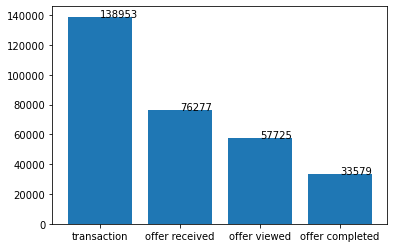

In [200]:
plt.bar(dftran['event'].value_counts().index, dftran['event'].value_counts())

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
addlabels(dftran['event'].value_counts().index, dftran['event'].value_counts())


Cleaning is done

### insights

So far there is no missing data expect for some customers that are missing age, income and gender.
There are 10 offers, with 17K customers, first we need to draw some insights out of the data

## Merging Dataframes

In [275]:
merged_df = pd.merge(dfport,dftran,on='offer_id', how='right')

In [276]:
merged_df.shape,dfport.shape,dftran.shape

((306534, 16), (10, 11), (306534, 6))

In [277]:
merged_df = pd.merge (merged_df,dfprof, on = 'customer_id', how = 'left')

In [279]:
merged_df.shape

(306534, 24)

In [280]:
merged_df.head()

reward_x  difficulty  duration                          offer_id  email  \
0       5.0         5.0       7.0  9b98b8c7a33c4b65b9aebfe6a799e6d9    1.0   
1       5.0        20.0      10.0  0b1e1539f2cc45b7b9fa7c272da2e1d7    1.0   
2       2.0        10.0       7.0  2906b810c7d4411798c6938adc9daaa5    1.0   
3       2.0        10.0      10.0  fafdcd668e3743c1bb461111dcafc2a4    1.0   
4      10.0        10.0       5.0  4d5c57ea9a6940dd891ad53e9dbe8da0    1.0   

   mobile  social  web  offer_bogo  offer_discount  ...  amount reward_y age  \
0     1.0     0.0  1.0         1.0             0.0  ...     NaN      NaN  75   
1     0.0     0.0  1.0         0.0             1.0  ...     NaN      NaN   0   
2     1.0     0.0  1.0         0.0             1.0  ...     NaN      NaN  68   
3     1.0     1.0  1.0         0.0             1.0  ...     NaN      NaN   0   
4     1.0     1.0  1.0         1.0             0.0  ...     NaN      NaN   0   

   became_member_on  income  gender_F  gender_M gender_O  gender_Unknown  \
0        2017-05-09  100000         1         0        0               0   
1        2017-08-04       0         0         0        0               1   
2        2018-04-26   70000         0         1        0               0   
3        2017-09-25       0         0         0        0               1   
4        2017-10-02       0         0         0        0               1   

   Age_group  
0        >61  
1    Unknown  
2        >61  
3    Unknown  
4    Unknown  

[5 rows x 24 columns]

D:\Data_Science\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(20000.0, 133494.70856156596)

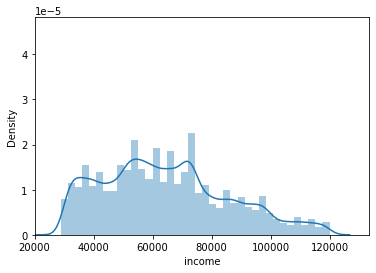

In [282]:
sns.distplot(merged_df['income'], bins=50, hist_kws={'alpha': 0.4});
plt.xlim(xmin=20000)

In [286]:
new_port = portfolio[['offer_type','id']]


In [288]:
new_port =new_port.rename(columns={'id':'offer_id'})

In [289]:
merged_df = pd.merge(merged_df, new_port, on = 'offer_id', how = 'left')

In [290]:
merged_d

(306534, 25)

<AxesSubplot:>

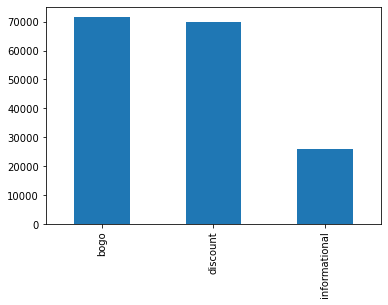

In [292]:
merged_df['offer_type'].value_counts().plot.bar()


<AxesSubplot:>

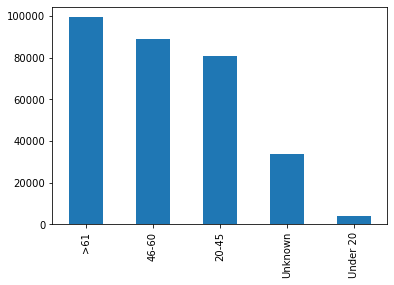

In [293]:
merged_df['Age_group'].value_counts().plot.bar()


<AxesSubplot:>

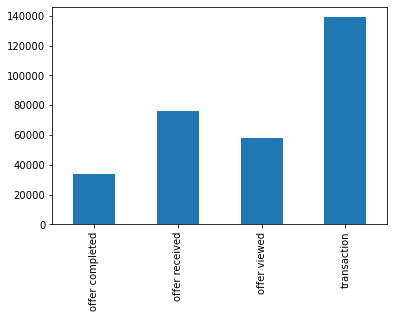

In [306]:
merged_df['event'].value_counts(sort= False).sort_index().plot(kind = 'bar')


In [309]:
event_dict = dict(merged_df['event'].value_counts())

In [310]:
event_dict['offer completed']/event_dict['offer received']

0.4402244451145168

around only 44% from the offers received are completed, which indicates that offers are not well targeted 

before we proceed with the machine learning model, we need to make sure that targeted data is clear, removed the extra column from any hot encoded filed, and any unknown data, as that will confuse the machine learning model

# Machine Learning Model

In [312]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306534 entries, 0 to 306533
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   reward_x             167581 non-null  float64       
 1   difficulty           167581 non-null  float64       
 2   duration             167581 non-null  float64       
 3   offer_id             167581 non-null  object        
 4   email                167581 non-null  float64       
 5   mobile               167581 non-null  float64       
 6   social               167581 non-null  float64       
 7   web                  167581 non-null  float64       
 8   offer_bogo           167581 non-null  float64       
 9   offer_discount       167581 non-null  float64       
 10  offer_informational  167581 non-null  float64       
 11  customer_id          306534 non-null  object        
 12  event                306534 non-null  object        
 13  time          

In [323]:
merged_df['gender_Unknown'].sum()

33772

Copy the df so i won't need to recreate it in case anything wrong happened

In [313]:
new_df = merged_df.copy()

Drop data unknown data

In [314]:
new_df = new_df[new_df.gender_Unknown != 1]

In [317]:
new_df = new_df.drop(columns='gender_Unknown')

In [321]:
new_df.describe(include = 'all')

C:\Users\minas\AppData\Local\Temp\ipykernel_18860\1382714005.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  new_df.describe(include = 'all')


reward_x     difficulty       duration  \
count   148805.000000  148805.000000  148805.000000   
unique            NaN            NaN            NaN   
top               NaN            NaN            NaN   
freq              NaN            NaN            NaN   
first             NaN            NaN            NaN   
last              NaN            NaN            NaN   
mean         4.442445       7.890561       6.625207   
std          3.372362       5.041335       2.133035   
min          0.000000       0.000000       3.000000   
25%          2.000000       5.000000       5.000000   
50%          5.000000      10.000000       7.000000   
75%          5.000000      10.000000       7.000000   
max         10.000000      20.000000      10.000000   

                                offer_id     email         mobile  \
count                             148805  148805.0  148805.000000   
unique                                10       NaN            NaN   
top     fafdcd668e3743c1bb461111dcafc2a4       NaN            NaN   
freq                               18062       NaN            NaN   
first                                NaN       NaN            NaN   
last                                 NaN       NaN            NaN   
mean                                 NaN       1.0       0.917160   
std                                  NaN       0.0       0.275641   
min                                  NaN       1.0       0.000000   
25%                                  NaN       1.0       1.000000   
50%                                  NaN       1.0       1.000000   
75%                                  NaN       1.0       1.000000   
max                                  NaN       1.0       1.000000   

               social            web     offer_bogo  offer_discount  ...  \
count   148805.000000  148805.000000  148805.000000   148805.000000  ...   
unique            NaN            NaN            NaN             NaN  ...   
top               NaN            NaN            NaN             NaN  ...   
freq              NaN            NaN            NaN             NaN  ...   
first             NaN            NaN            NaN             NaN  ...   
last              NaN            NaN            NaN             NaN  ...   
mean         0.658311       0.806747       0.428978        0.418743  ...   
std          0.474277       0.394851       0.494932        0.493355  ...   
min          0.000000       0.000000       0.000000        0.000000  ...   
25%          0.000000       1.000000       0.000000        0.000000  ...   
50%          1.000000       1.000000       0.000000        0.000000  ...   
75%          1.000000       1.000000       1.000000        1.000000  ...   
max          1.000000       1.000000       1.000000        1.000000  ...   

               amount      reward_y            age     became_member_on  \
count   123957.000000  32444.000000  272762.000000               272762   
unique            NaN           NaN            NaN                 1707   
top               NaN           NaN            NaN  2017-12-07 00:00:00   
freq              NaN           NaN            NaN                  635   
first             NaN           NaN            NaN  2013-07-29 00:00:00   
last              NaN           NaN            NaN  2018-07-26 00:00:00   
mean        13.996325      4.948249      53.840696                  NaN   
std         31.749420      2.905376      17.551337                  NaN   
min          0.050000      2.000000      18.000000                  NaN   
25%          3.660000      2.000000      41.000000                  NaN   
50%         10.800000      5.000000      55.000000                  NaN   
75%         19.130000      5.000000      66.000000                  NaN   
max       1062.280000     10.000000     101.000000                  NaN   

               income       gender_F       gender_M       gender_O  Age_group  \
count   272762.000000  272762.000000  272762.000000  272762.000000     272762 

Drop 1 column from all hot encoded to avoid redundant information


In [329]:
new_df.columns

Index(['reward_x', 'difficulty', 'duration', 'offer_id', 'email', 'mobile',
       'social', 'web', 'offer_bogo', 'offer_discount', 'offer_informational',
       'customer_id', 'event', 'time', 'amount', 'reward_y', 'age',
       'became_member_on', 'income', 'gender_F', 'gender_M', 'gender_O',
       'Age_group', 'offer_type', 'member_year'],
      dtype='object')

In [332]:
pd.set_option('display.max_columns', None)
new_df.head(10)

reward_x  difficulty  duration                          offer_id  email  \
0        5.0         5.0       7.0  9b98b8c7a33c4b65b9aebfe6a799e6d9    1.0   
2        2.0        10.0       7.0  2906b810c7d4411798c6938adc9daaa5    1.0   
5        5.0         5.0       5.0  f19421c1d4aa40978ebb69ca19b0e20d    1.0   
7        0.0         0.0       4.0  3f207df678b143eea3cee63160fa8bed    1.0   
8        5.0        20.0      10.0  0b1e1539f2cc45b7b9fa7c272da2e1d7    1.0   
9        5.0        20.0      10.0  0b1e1539f2cc45b7b9fa7c272da2e1d7    1.0   
12      10.0        10.0       7.0  ae264e3637204a6fb9bb56bc8210ddfd    1.0   
13       0.0         0.0       4.0  3f207df678b143eea3cee63160fa8bed    1.0   
14       5.0        20.0      10.0  0b1e1539f2cc45b7b9fa7c272da2e1d7    1.0   
15       2.0        10.0      10.0  fafdcd668e3743c1bb461111dcafc2a4    1.0   

    mobile  social  web  offer_bogo  offer_discount  offer_informational  \
0      1.0     0.0  1.0         1.0             0.0                  0.0   
2      1.0     0.0  1.0         0.0             1.0                  0.0   
5      1.0     1.0  1.0         1.0             0.0                  0.0   
7      1.0     0.0  1.0         0.0             0.0                  1.0   
8      0.0     0.0  1.0         0.0             1.0                  0.0   
9      0.0     0.0  1.0         0.0             1.0                  0.0   
12     1.0     1.0  0.0         1.0             0.0                  0.0   
13     1.0     0.0  1.0         0.0             0.0                  1.0   
14     0.0     0.0  1.0         0.0             1.0                  0.0   
15     1.0     1.0  1.0         0.0             1.0                  0.0   

                         customer_id           event  time  amount  reward_y  \
0   78afa995795e4d85b5d9ceeca43f5fef  offer received     0     NaN       NaN   
2   e2127556f4f64592b11af22de27a7932  offer received     0     NaN       NaN   
5   389bc3fa690240e798340f5a15918d5c  offer received     0     NaN       NaN   
7   2eeac8d8feae4a8cad5a6af0499a211d  offer received     0     NaN       NaN   
8   aa4862eba776480b8bb9c68455b8c2e1  offer received     0     NaN       NaN   
9   31dda685af34476cad5bc968bdb01c53  offer received     0     NaN       NaN   
12  4b0da7e80e5945209a1fdddfe813dbe0  offer received     0     NaN       NaN   
13  c27e0d6ab72c455a8bb66d980963de60  offer received     0     NaN       NaN   
14  d53717f5400c4e84affdaeda9dd926b3  offer received     0     NaN       NaN   
15  f806632c011441378d4646567f357a21  offer received     0     NaN       NaN   

    age became_member_on  income  gender_F  gender_M  gender_O Age_group  \
0    75       2017-05-09  100000         1         0         0       >61   
2    68       2018-04-26   70000         0         1         0       >61   
5    65       2018-02-09   53000         0         1         0       >61   
7    58       2017-11-11   51000         0         1         0     46-60   
8    61       2017-09-11   57000         1         0         0       >61   
9    62       2016-02-11   71000         1         0         0       >61   
12   64       2017-09-09  100000         0         1         0       >61   
13   78       2017-06-16   71000         1         0         0       >61   
14   88       2017-05-18   53000         1         0         0       >61   
15   42       2013-08-11   69000         0         1         0     20-45   

       offer_type  member_year  
0            bogo         2017  
2        discount         2018  
5            bogo         2018  
7   informational         2017  
8        discount         2017  
9        discount         2016  
12           bogo         2017  
13  informational         2017  
14       discount         2017  
15       discount         2013

In [327]:
new_df['member_year'] = new_df.became_member_on.dt.year

In [333]:
new_df.drop (columns = ['offer_type','Age_group','became_member_on'], inplace = True)

In [335]:
new_df.rename(columns={'reward_x':'offer_reward','difficulty':'offer_difficulty','amount':'amount_spent','reward_y':'amount_gained'}, inplace =True)

In [338]:
new_df.columns

Index(['offer_reward', 'offer_difficulty', 'duration', 'offer_id', 'email',
       'mobile', 'social', 'web', 'offer_bogo', 'offer_discount',
       'offer_informational', 'customer_id', 'event', 'time', 'amount_spent',
       'amount_gained', 'age', 'income', 'gender_F', 'gender_M', 'gender_O',
       'member_year'],
      dtype='object')

In [341]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA


In [361]:
new_df[new_df['offer_informational']==1]['amount_gained'].notnull().sum()

0

In [353]:
new_df.groupby('customer_id').value_counts();

Perform scalling and PCA 

In [ ]:
scatter age and spend to know if it's linear or poly

